In [5]:
%load_ext yamlmagic

In [17]:
%%yaml TR
ls: a00
tb: a01
ss: a02
mb: a03
hv: a04
nh: a05
xm: a06
dp: a07
ql: a08
tr: a09
hl: a10
vj: a11
pq: XA
qh: NXA
fv: b00
cd: b01
tc: b02
vp: b03
jb: b04
hc: b05
kh: b06
ck: b07
vg: b08
mm: b09
jr: b10
rb: b11
rr: XB
lt: NXB
ts: c00
lp: c01
xx: c02
zd: c03
kg: c04
gd: c05
bs: c06
gk: c07
pc: c08
hr: c09
vf: c10
nc: c11
sl: XC
bq: NXC
bn: d00
xz: d01
dm: d02
ct: d03
rj: d04
qk: d05
xg: d06
pb: d07
rz: d08
cr: d09
rf: d10
xk: d11
jz: XD
vz: NXD
ft: PREV
rx: END

In [32]:
from aocd.models import Puzzle

puzzle = Puzzle(year=2023, day=20)

def parses(input):
    def parse_line(line):
        mod, dsts = line.split(' -> ')
        dsts = dsts.split(', ')
        if mod[0] in '%&':
            kind = {'%': 'flip', '&': 'conj'}[mod[0]]
            mod = mod[1:]
        elif mod == 'broadcaster':
            kind = 'cast'
        return mod, (kind, dsts)
    return [parse_line(line) for line in input.strip().split('\n')]


# data = parses(puzzle.input_data)
data = puzzle.input_data
for src, label in TR.items():
    data = data.replace(src, label)
print(data)
data = parses(data)

%d02 -> XD, d03
&PREV -> END
%b05 -> b06
%c04 -> c05, XC
&XC -> c06, NXC, c00, c03, c07, c02, c01
%d10 -> d11, XD
%c03 -> c04
%a07 -> a08, XA
%a02 -> XA, a03
&XB -> b05, NXB, b06, b00, b02, b08
%a04 -> a05
%a05 -> XA, a06
&XD -> d00, NXD, d01
%c10 -> c11, XC
%c07 -> c08
%c06 -> c07
&XA -> a01, NXA, a00, a04, a08
%b04 -> XB, b05
%b00 -> b01, XB
&NXD -> PREV
%b09 -> b10, XB
%b08 -> b09
%b01 -> b02, XB
&NXC -> PREV
%d06 -> d07, XD
%c02 -> c03
%a00 -> a01, XA
%d07 -> XD, d08
%b02 -> b03
%b06 -> b07
%c01 -> c02
%a01 -> a02
%d05 -> XD, d06
%d01 -> d02
%b10 -> b11, XB
%a03 -> a04, XA
&NXA -> PREV
&NXB -> PREV
%b11 -> XB
%c08 -> c09, XC
%c09 -> c10, XC
%c05 -> c06, XC
%a06 -> a07, XA
%d03 -> XD, d04
%b07 -> b08, XB
%d09 -> XD, d10
%d00 -> d01, XD
%b03 -> XB, b04
%a10 -> XA, a11
%c00 -> c01, XC
%d08 -> XD, d09
%a08 -> a09
%d11 -> XD
%a11 -> XA
%a09 -> XA, a10
broadcaster -> a00, b00, c00, d00
%c11 -> XC
%d04 -> XD, d05


In [19]:
sample = parses("""broadcaster -> a, b, c
%a -> b
%b -> c
%c -> inv
&inv -> a
""")

In [20]:
sample2 = parses("""broadcaster -> a
%a -> inv, con
&inv -> b
%b -> con
&con -> output""")

In [21]:
def viz(src, dst, pulse):
    p = {0: 'low', 1: 'high'}[pulse]
    print(f"{src} -{p}-> {dst}")

In [58]:
mods = dict(data)
flip_states = {mod: 0 for mod, (kind, _) in data if kind == 'flip'}
conj_memory = {mod: {inp: 0 for inp in inps} for mod, (kind, inps) in data if kind == 'conj'}

flip_states = {mod: 0 for mod, (kind, _) in data if kind == 'flip'}

conj_memory = {mod: {} for mod, (kind, _) in data if kind == 'conj'}
for mod, (kind, connected) in data:
    for dst in connected:
        if dst in conj_memory:
            conj_memory[dst][mod] = 0

from collections import deque

LOW, HIGH = 0, 1


pulses = [0,0]

vals = []
states = {c: [] for c in 'abcd'}

for i in range(2**13):
    queue = deque(
        [('broadcaster', dst, LOW) for dst in mods['broadcaster'][1]]
    )
    pulses[0] += 1+len(queue) # button + broadcasts

#     print()
    while queue:
#         viz(*queue[0])
    #     print(queue)
        src, mod, pulse = queue.popleft()
        if mod not in mods:
            continue
        
        if mod == 'PREV' and pulse == HIGH:
            print(i, src, pulses)
            
        kind, connected = mods[mod]
        if kind == 'flip':
            if pulse == HIGH: 
                continue
            flip_states[mod] ^= 1
            new_pulse = flip_states[mod]
        elif kind == 'conj':
            mem = conj_memory[mod]
            mem[src] = pulse
    #         print('\t',mem, all(s==HIGH for s in mem.values()))
            new_pulse = 1 ^ all(s==HIGH for s in mem.values())
        else:
            raise ValueError
        for dst in connected:
            if dst == 'rx' and new_pulse == LOW:
                print(pulses)
            
                
            pulses[new_pulse] += 1
            queue.append((mod, dst, new_pulse))
    
    if all(s == 0 for s in flip_states.values()):
        print("DONE")
    
    vals.append(list(flip_states.values()))
    
    
    for grp in 'abcd':
        state = 0
        for j in range(11,-1,-1):
            state <<= 1
            state ^= flip_states[f'{grp}{j:02d}']
        states[grp].append(state)
#     print()

3738 NXB [65737, 157537]
3820 NXA [67196, 161031]
3888 NXC [68429, 163959]
4092 NXD [72027, 172566]
7477 NXB [131600, 315311]
7641 NXA [134492, 322235]
7777 NXC [136918, 328016]
8185 NXD [144101, 345223]


In [57]:
7641 - 3820

3821

(0.0, 10000.0)

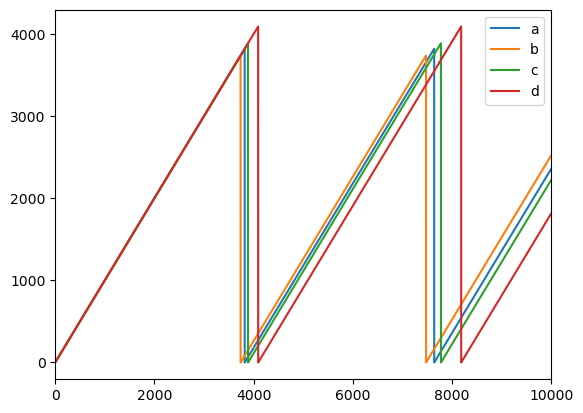

In [40]:
for grp, history in states.items():
    plt.plot(history, label=grp)
plt.legend()
plt.xlim((0,10_000))

In [52]:
for grp in 'abcd':
    z= np.array(states[grp])
    print(np.unique(np.diff(np.argwhere(z == np.max(z)).flatten())))

[3821]
[3739]
[3889]
[4093]


In [61]:
import math
math.prod([3821,3739,3889,4093])

227411378431763

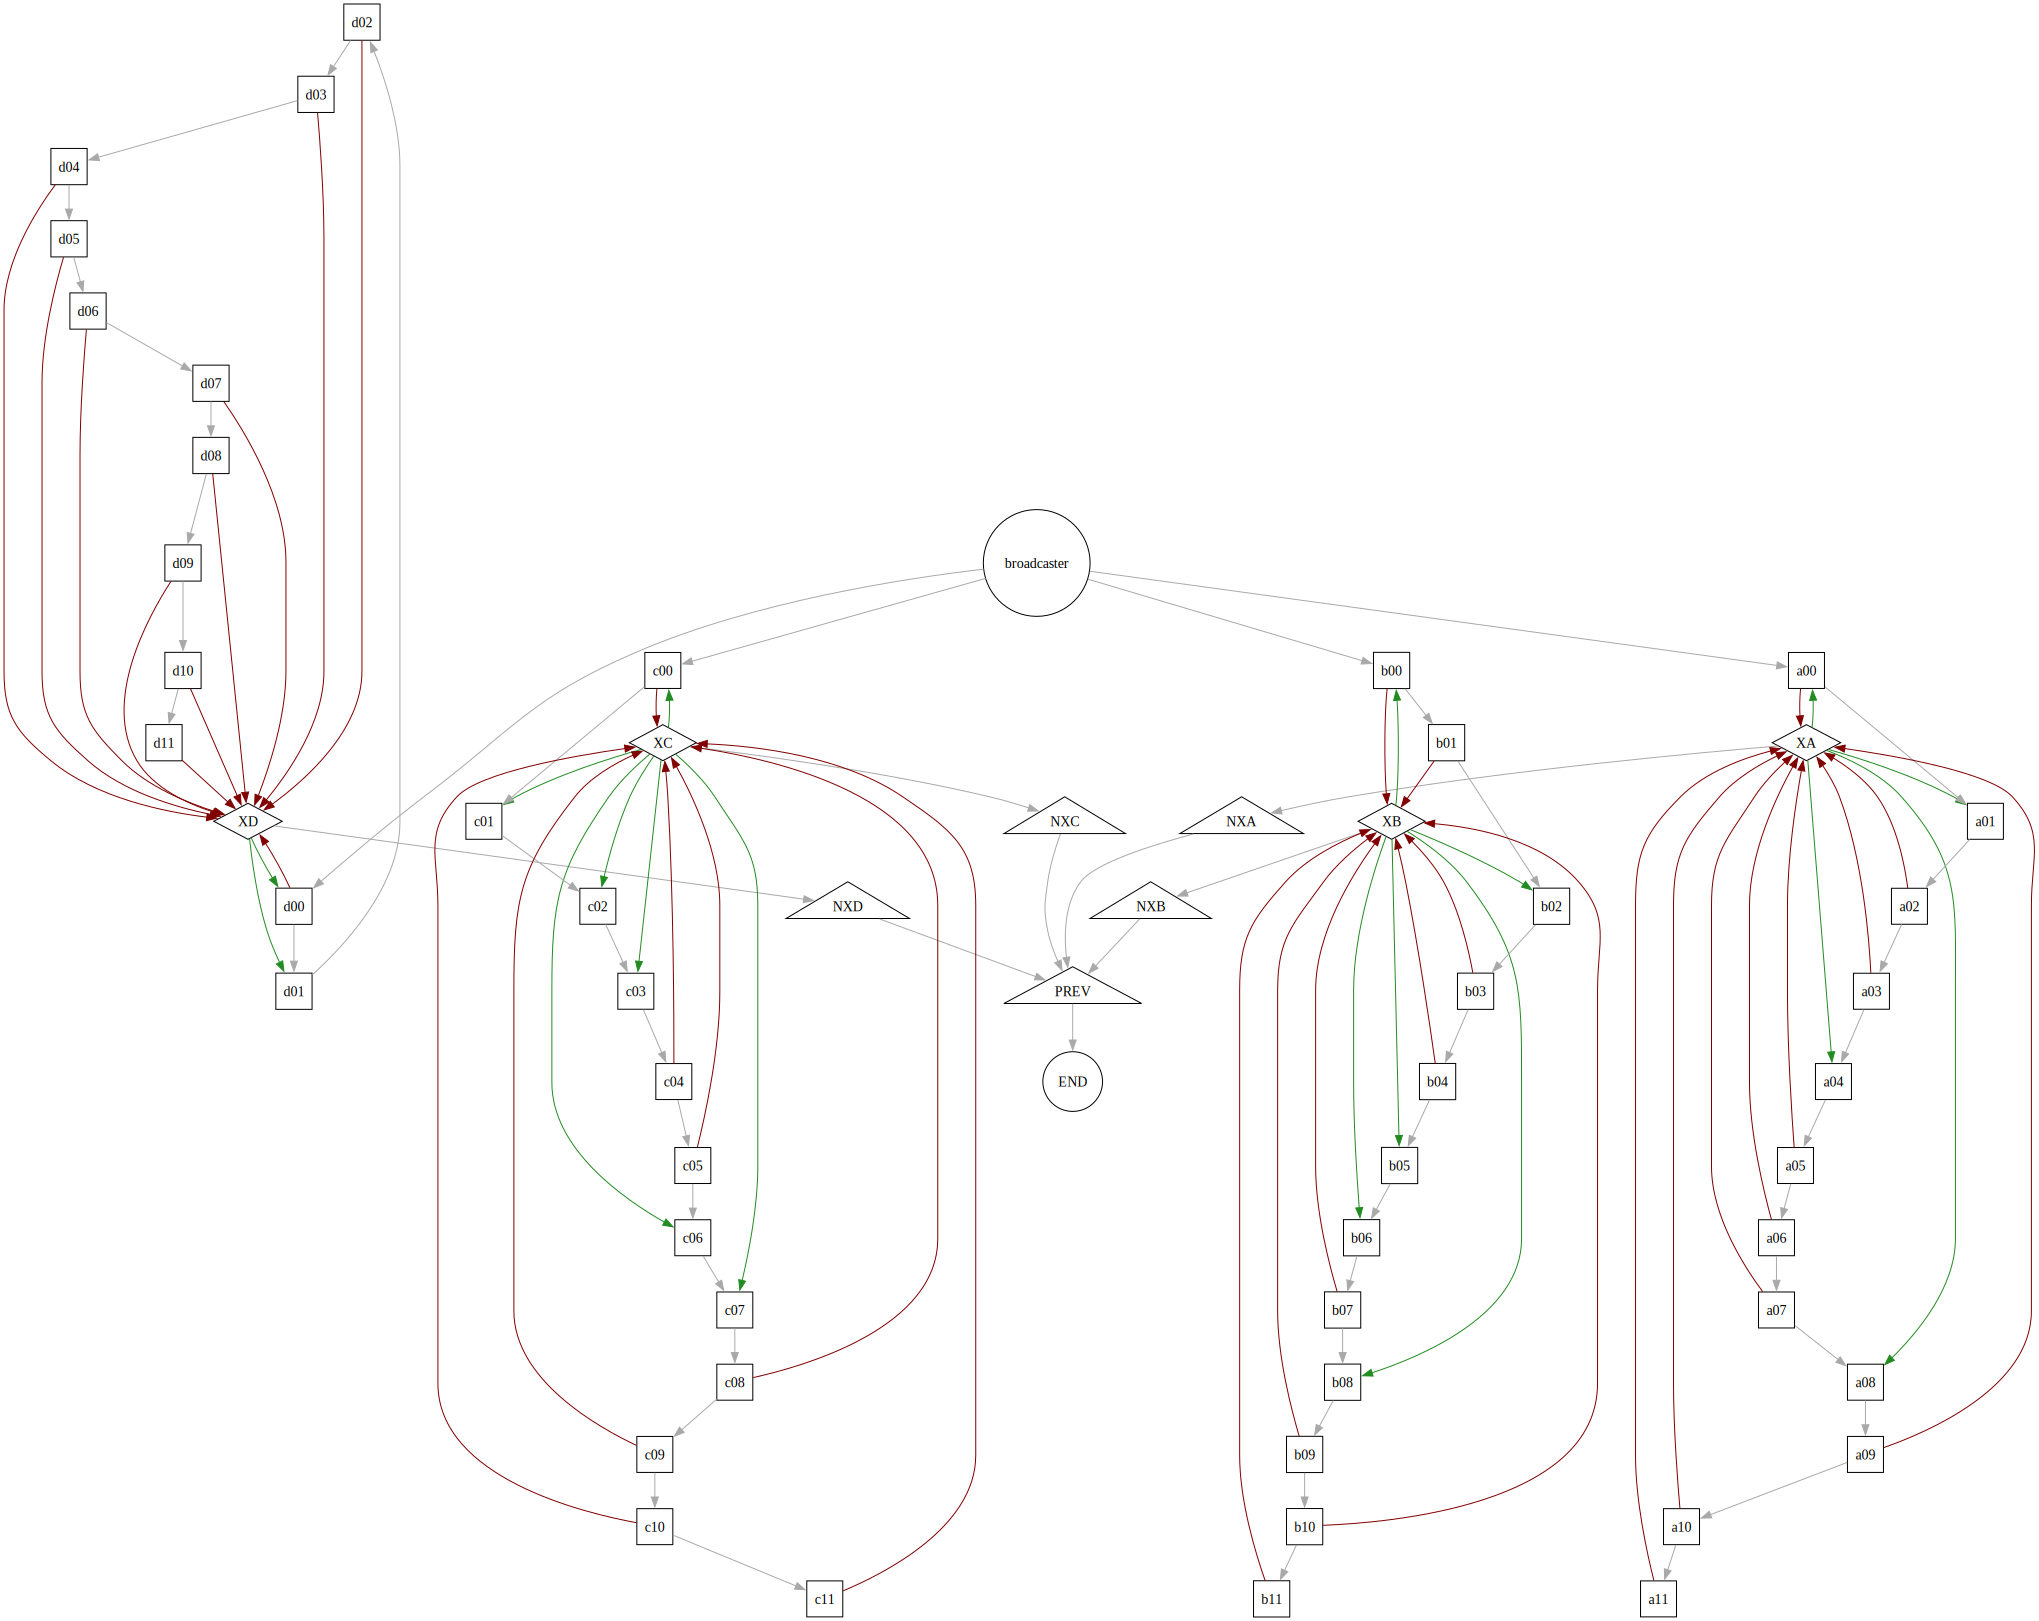

In [75]:
from graphviz import Digraph

def visualize_graph(graph_dict: dict[str, list[str]]) -> None:
    dot = Digraph(comment='The Graph') #, engine='fdp')
    graph_dict = graph_dict.copy()
    graph_dict['END'] = ('cast', [])
    # Add nodes and edges to the graph
    for node, (kind, neighbors) in graph_dict.items():
        shape = {'flip': 'square', 'cast': 'circle', 'conj': 'diamond'}[kind]
        if kind == 'conj' and len(neighbors) == 1:
            shape = 'triangle'
        dot.node(node, shape=shape)
        for neighbor in neighbors:
            color = 'darkgrey'
            if neighbor.startswith('X'):
                color = 'maroon'
            if node.startswith('X') and not neighbor.startswith('N'):
                color = 'forestgreen'
            dot.edge(node, neighbor, color=color)

    # Render the graph to a file (e.g., 'graphviz_output') and view it
    dot.render('graphviz_output', view=True, format='pdf') #, engine='fdp')
    return dot
    

# Example graph
# graph_dict = {'A': ['B', 'C'], 'B': ['C', 'D'], 'C': ['D'], 'D': ['C'], 'E': ['F'], 'F': ['C']}

visualize_graph(mods)


In [269]:
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 4.7 MB/s eta 0:00:00


In [253]:
# plt.subplots(1,1, figsize=(30,3))
# plt.imshow(np.array(vals).T)

In [254]:
from collections import Counter
def compute_periods(vals):
    periods = []
    period = 0
    prev = None
    for n in vals:
        if prev == n:
            period += 1
        elif prev is not None:
            periods.append(period)
            period = 1
        prev = n
    if C := Counter(periods).most_common():
        return C[0][0]
    return float('inf')

In [255]:
x = np.array(vals).T

In [256]:
np.array([compute_periods(row) for row in x])

array([   4,   32,   16, 1024,    8,  128,    4,   16,   32, 1024,  128,
         64,   16,    1,  512,  256,    2,   64,    4,    1,  128,    4,
         64,    2,    2,   32,    2, 1024,    8, 1691,  256,  512,   32,
         64,    8,  128,  512,    1,    8, 1024,    1,  256,  256, 2045,
       1773,  512, 1841,   16])

In [257]:
order = np.argsort(np.array([compute_periods(row) for row in x]))

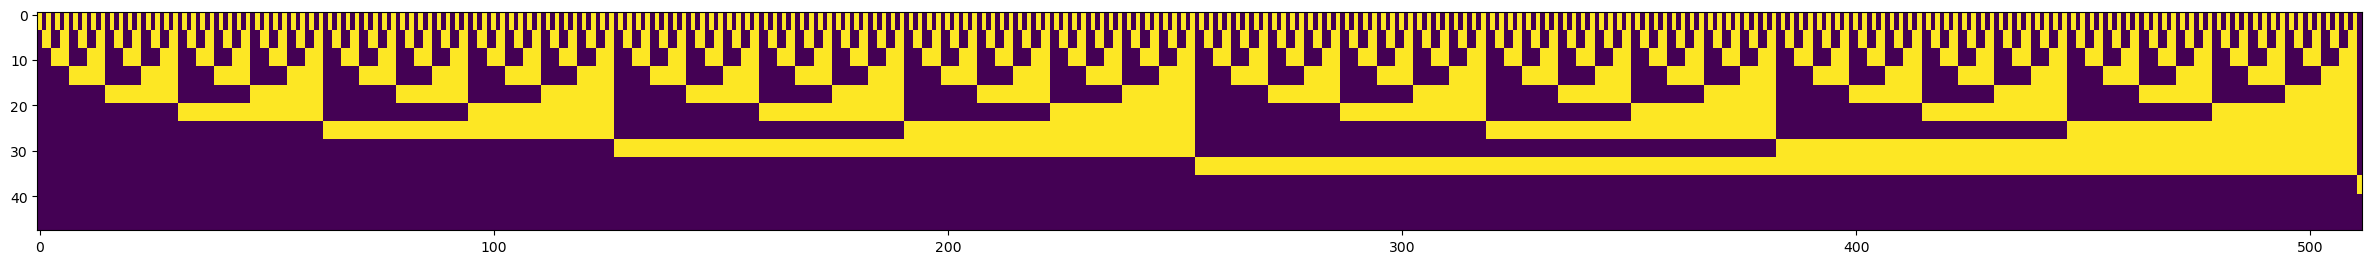

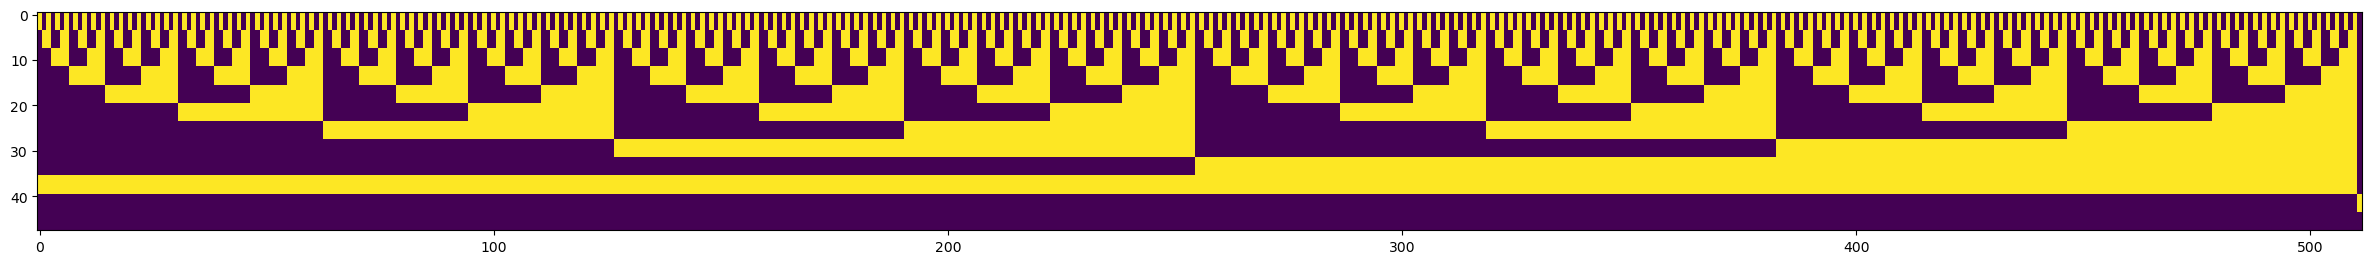

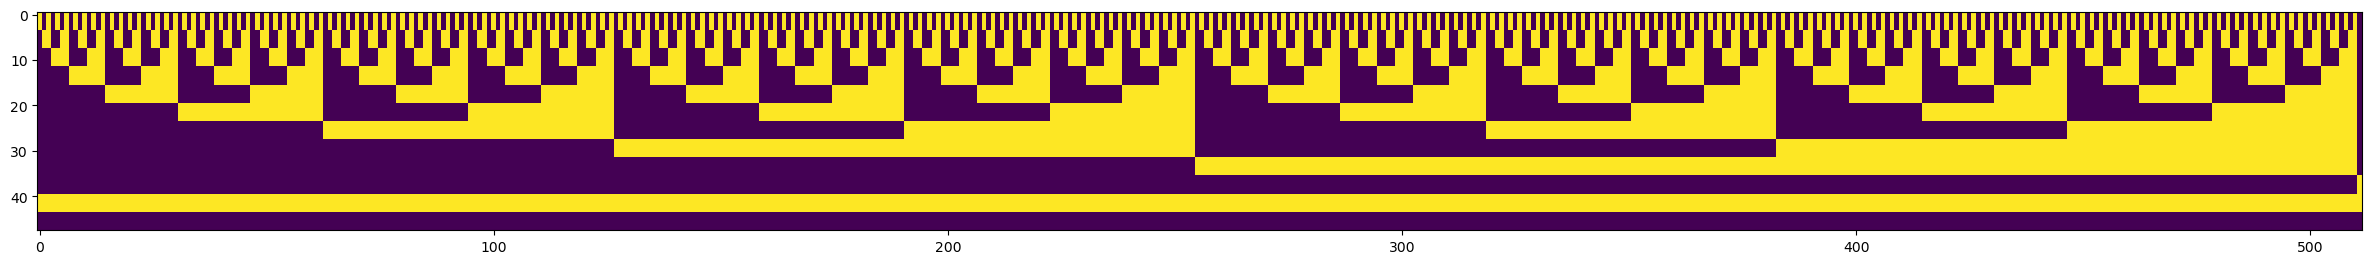

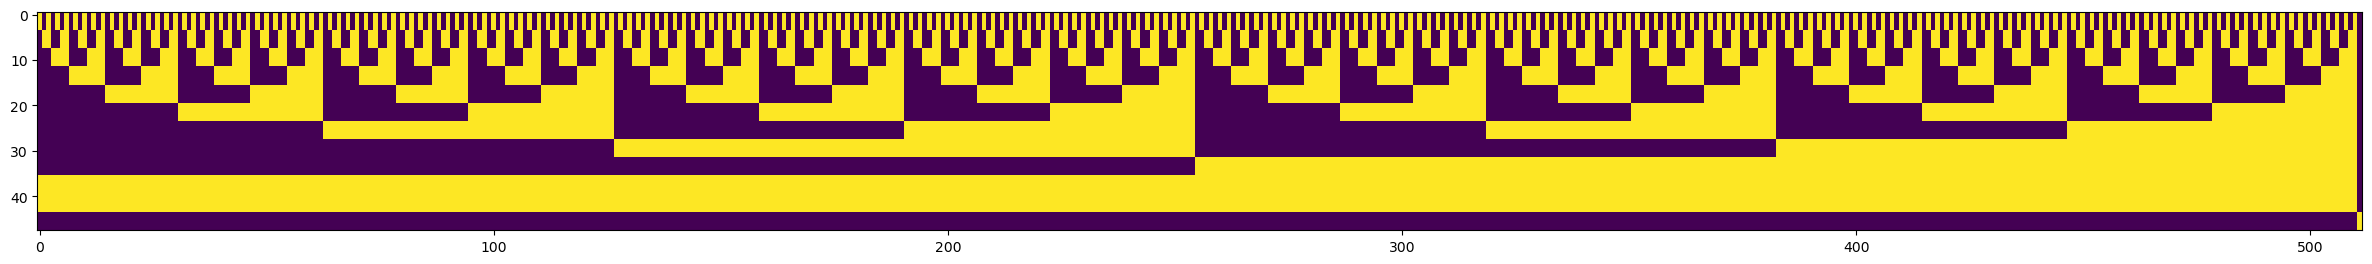

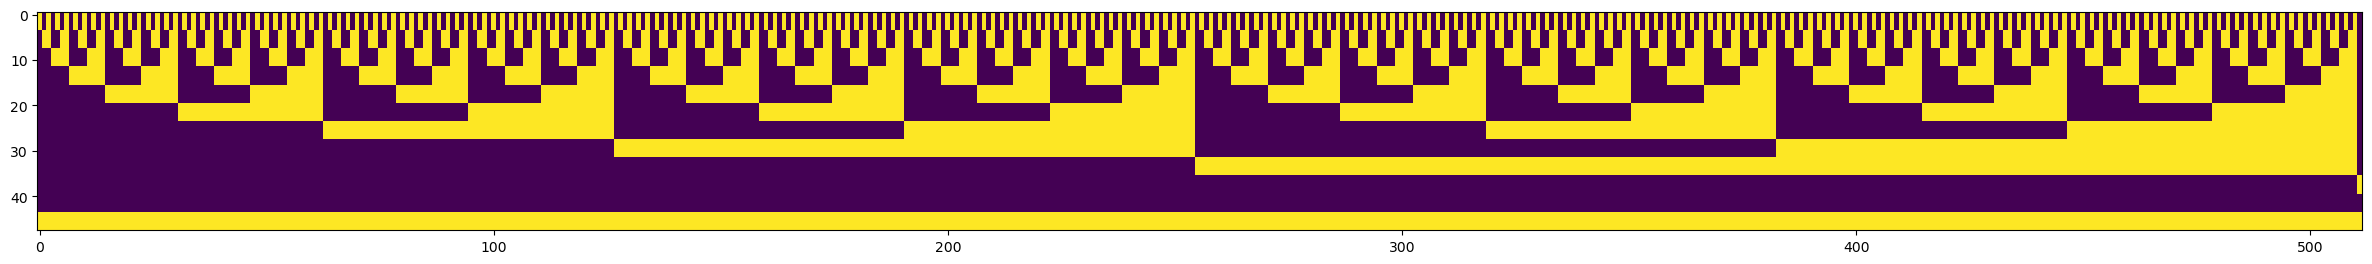

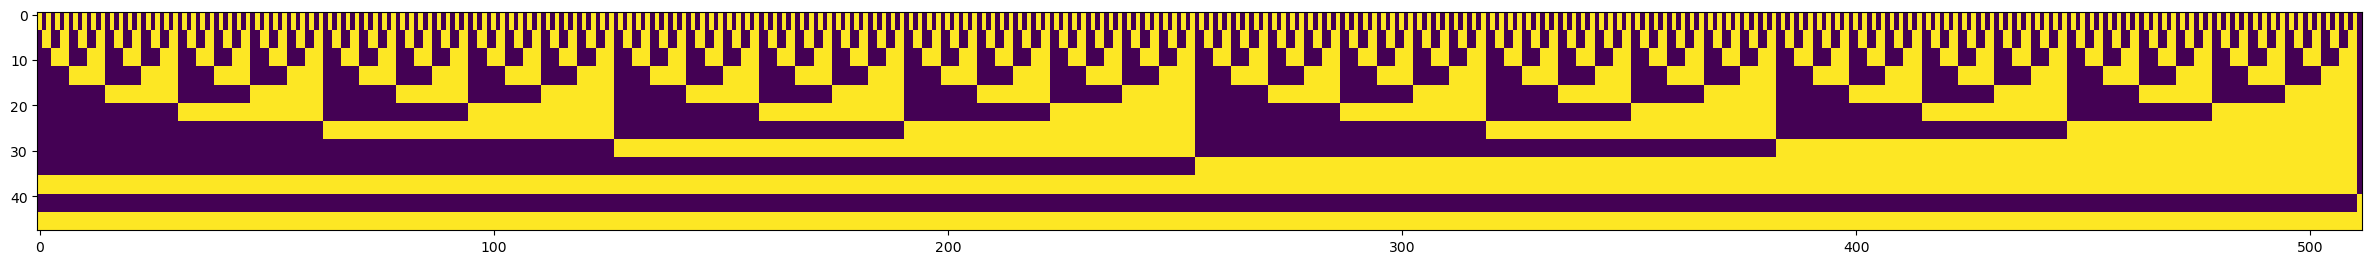

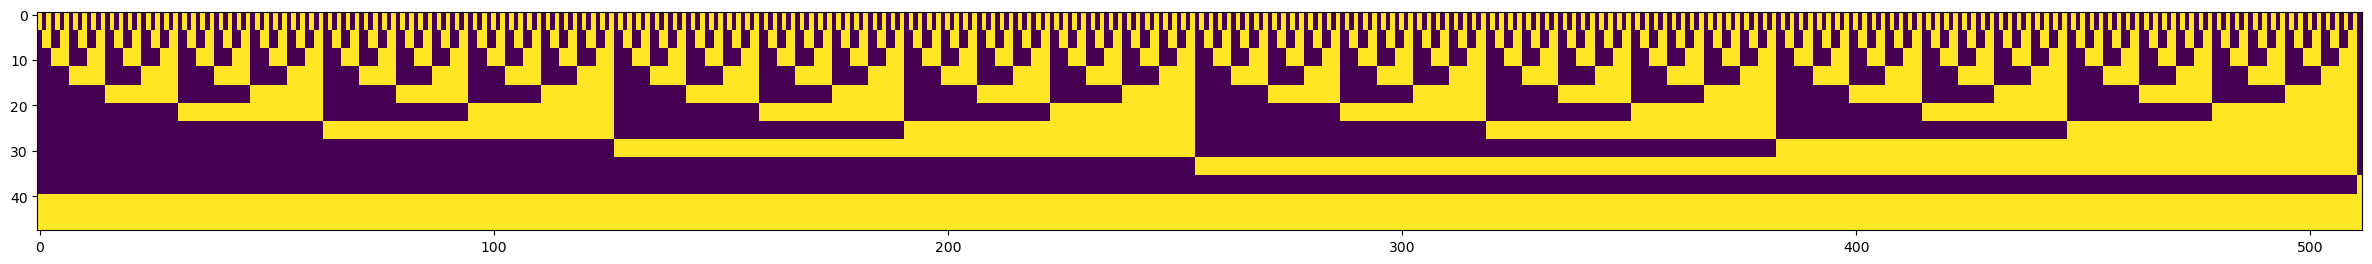

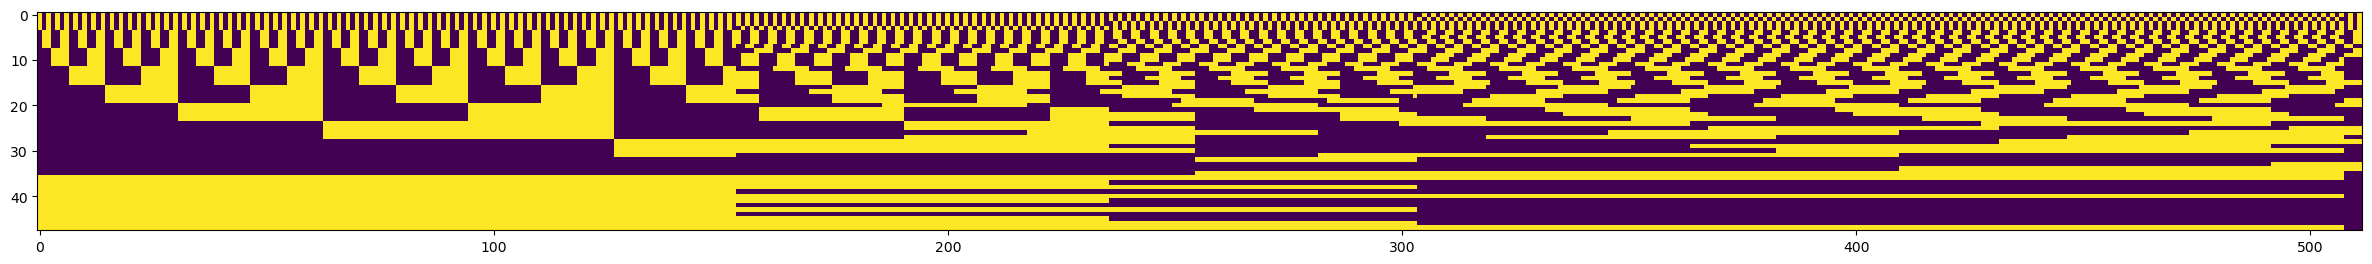

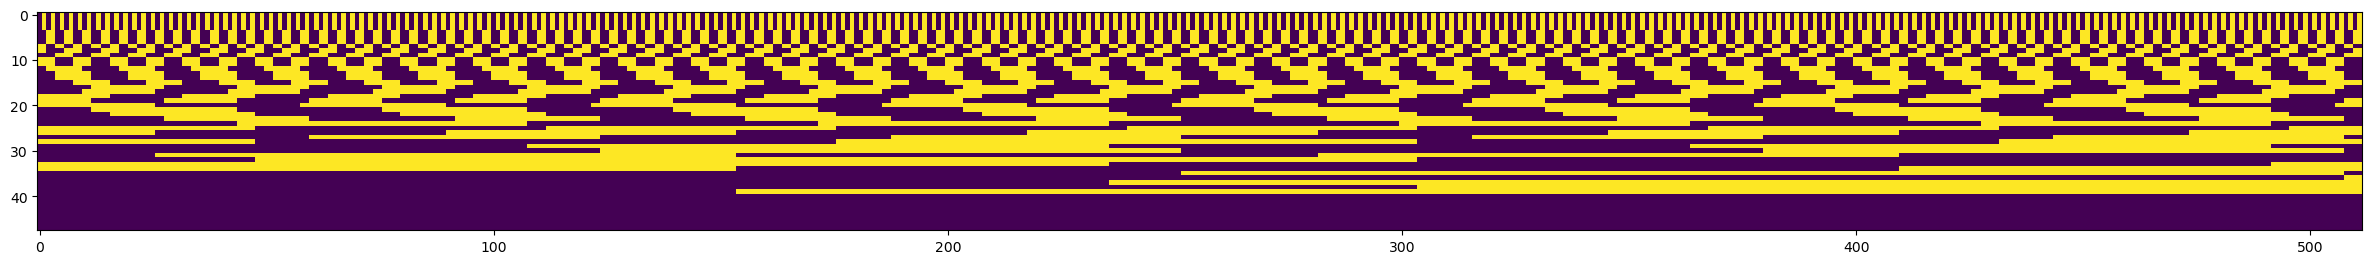

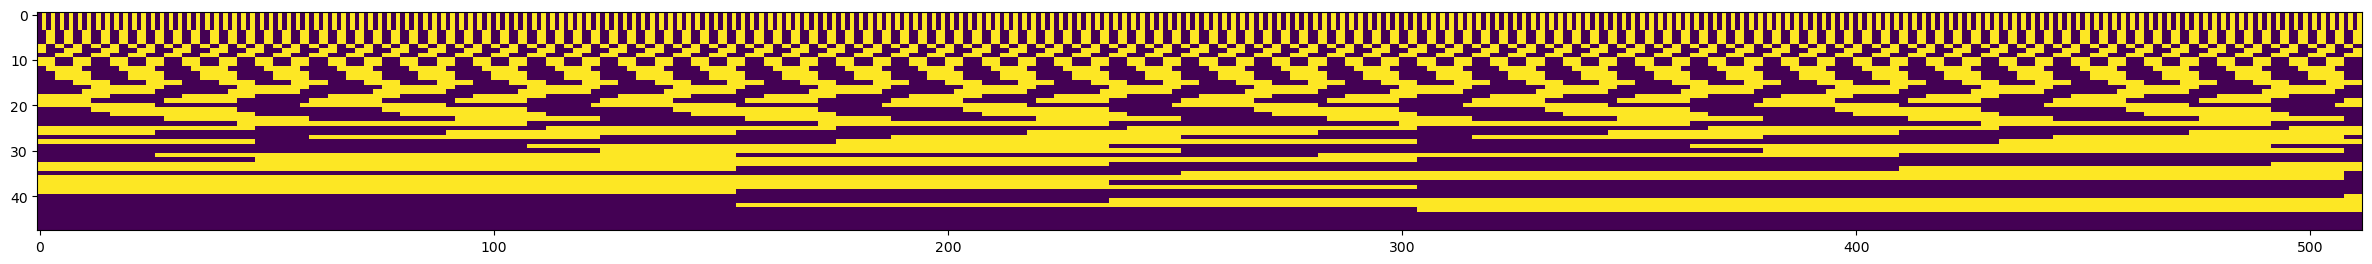

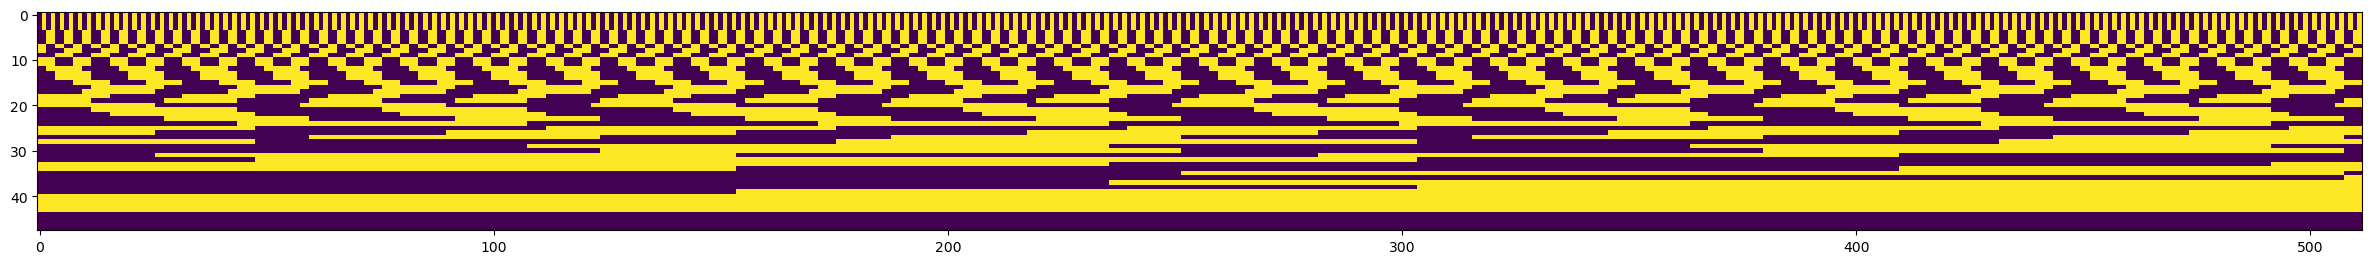

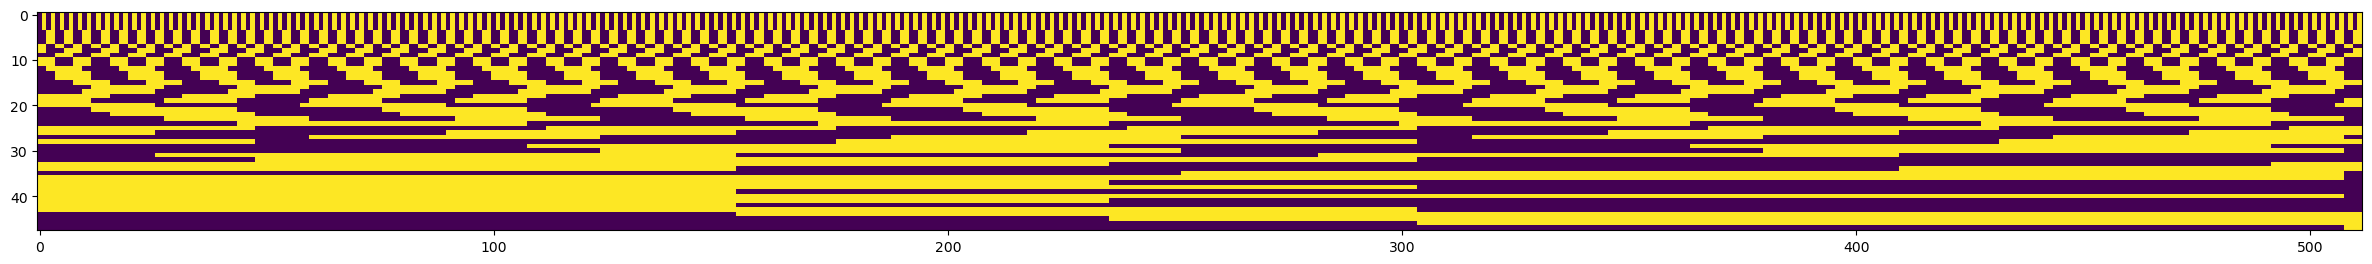

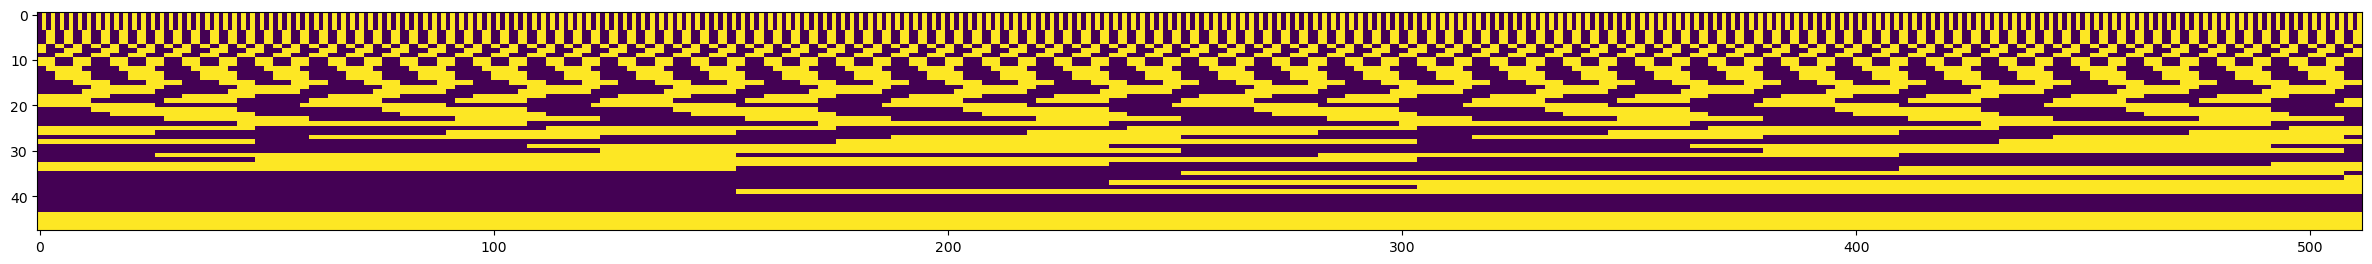

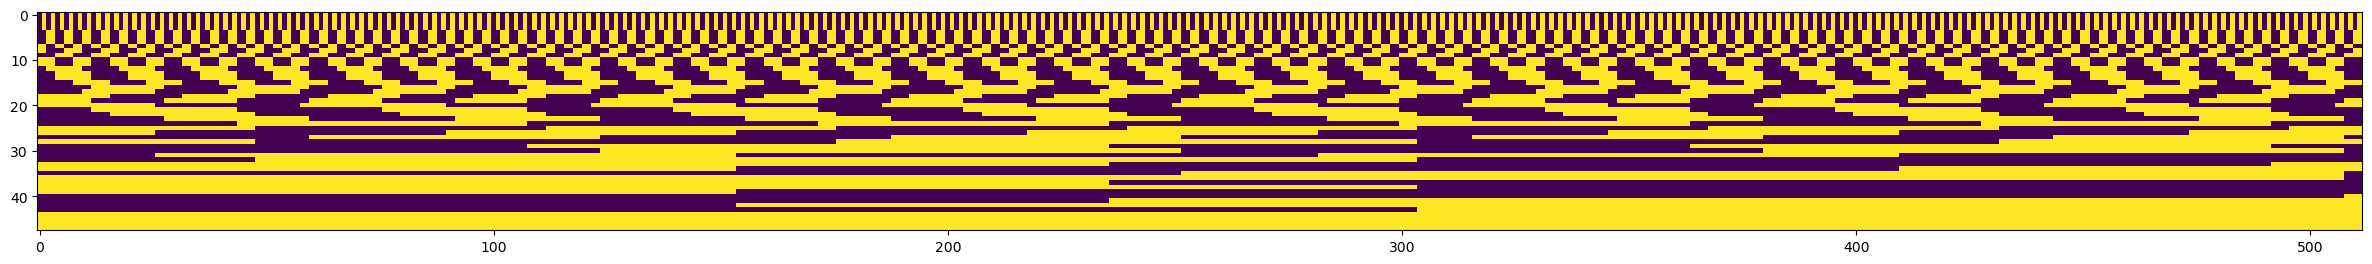

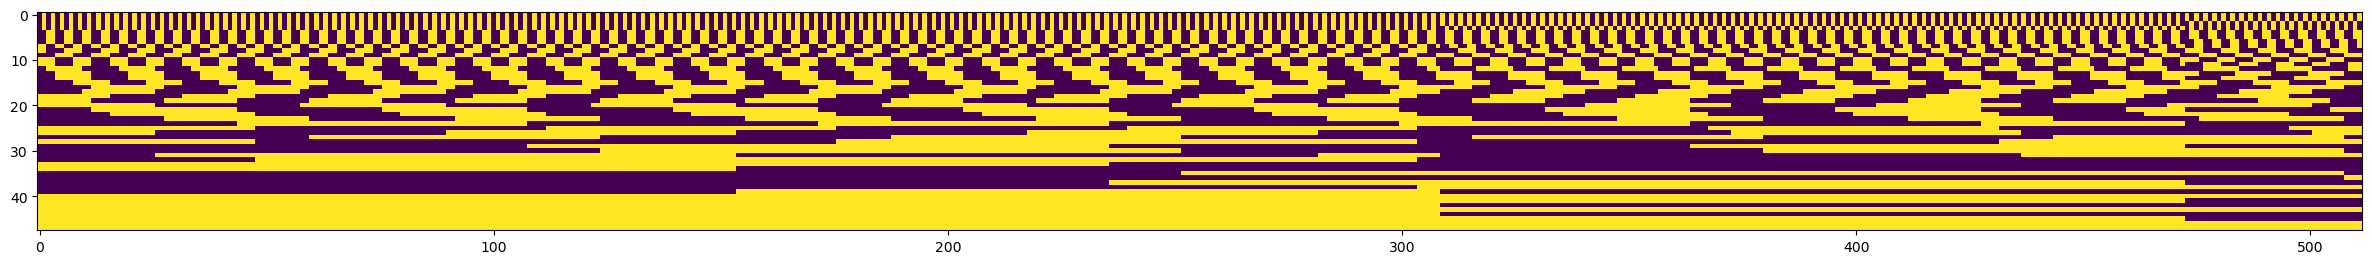

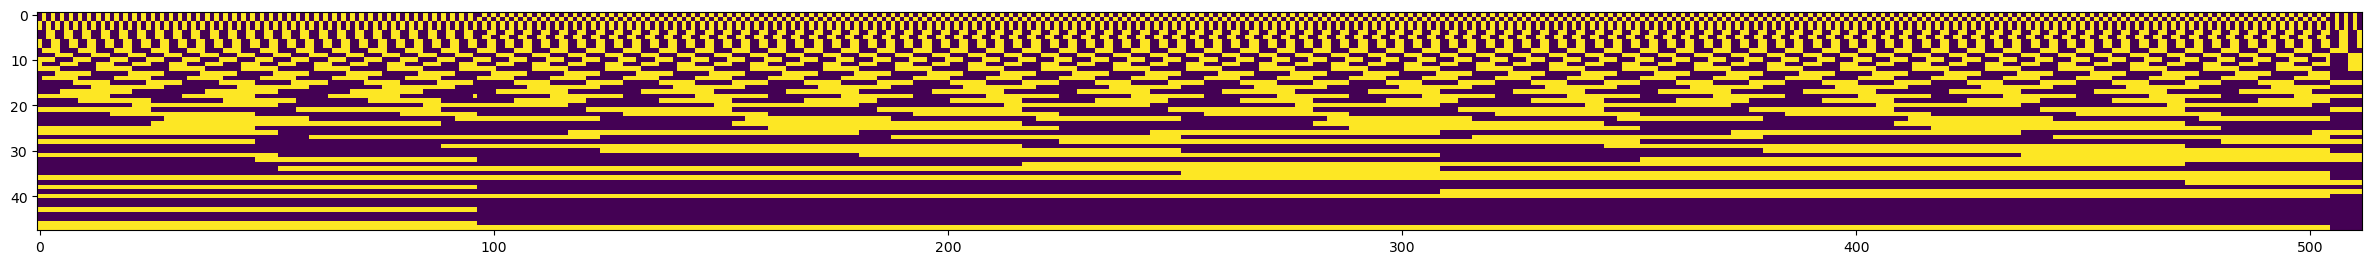

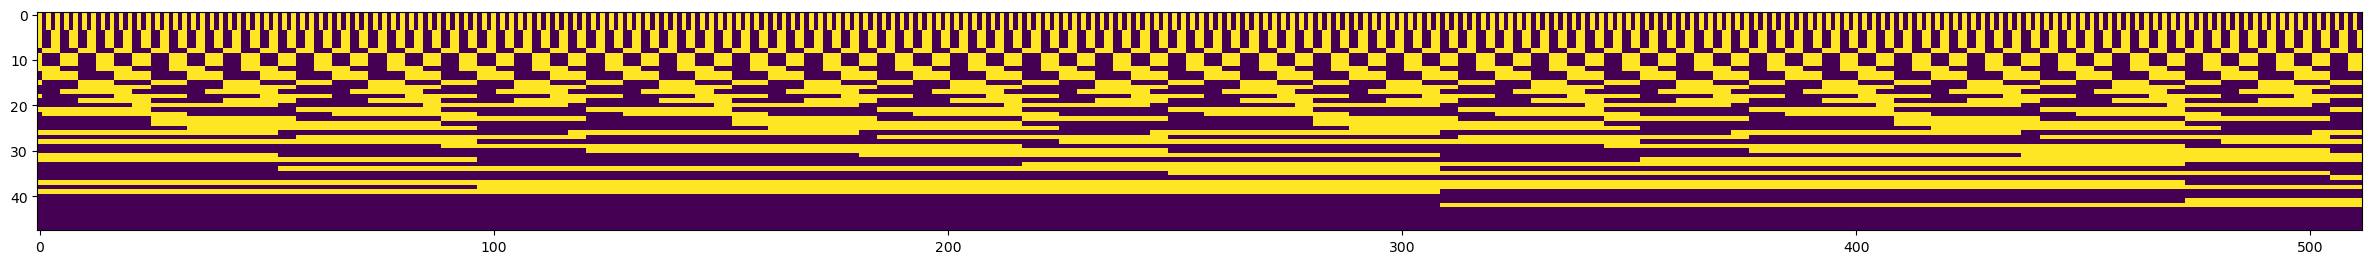

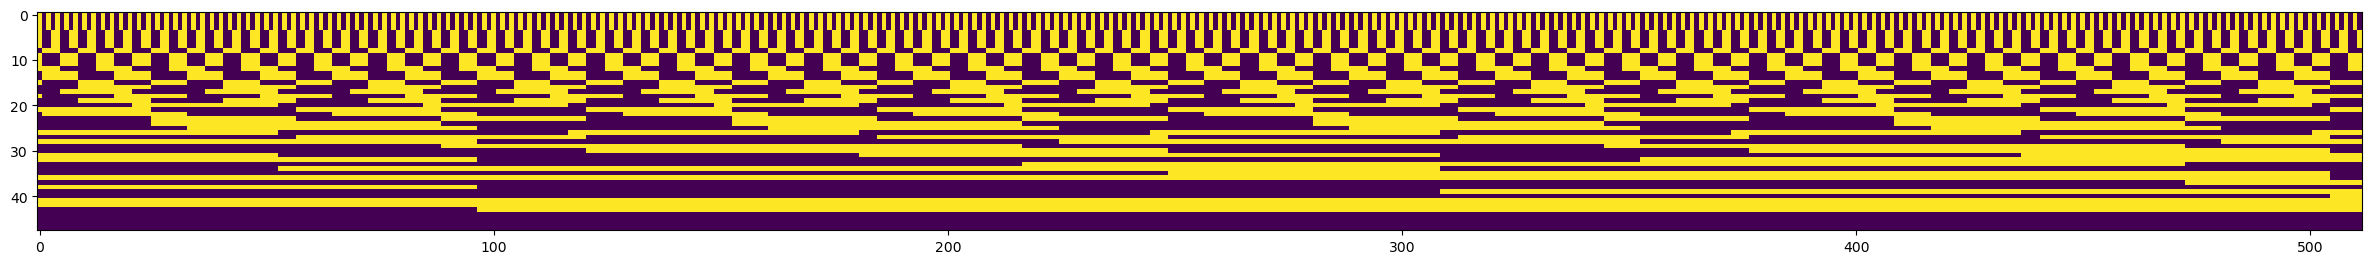

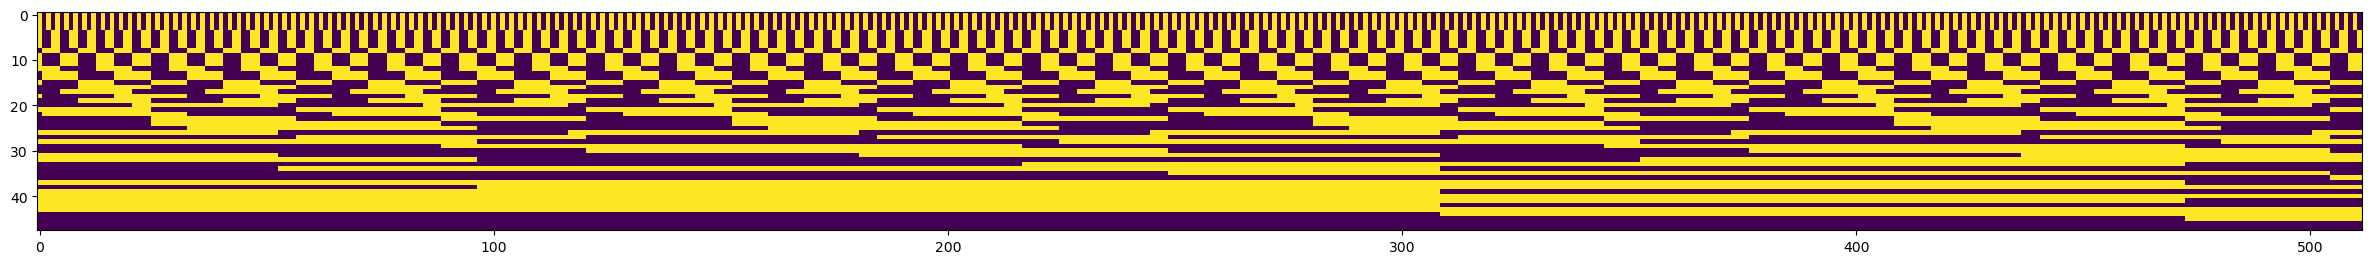

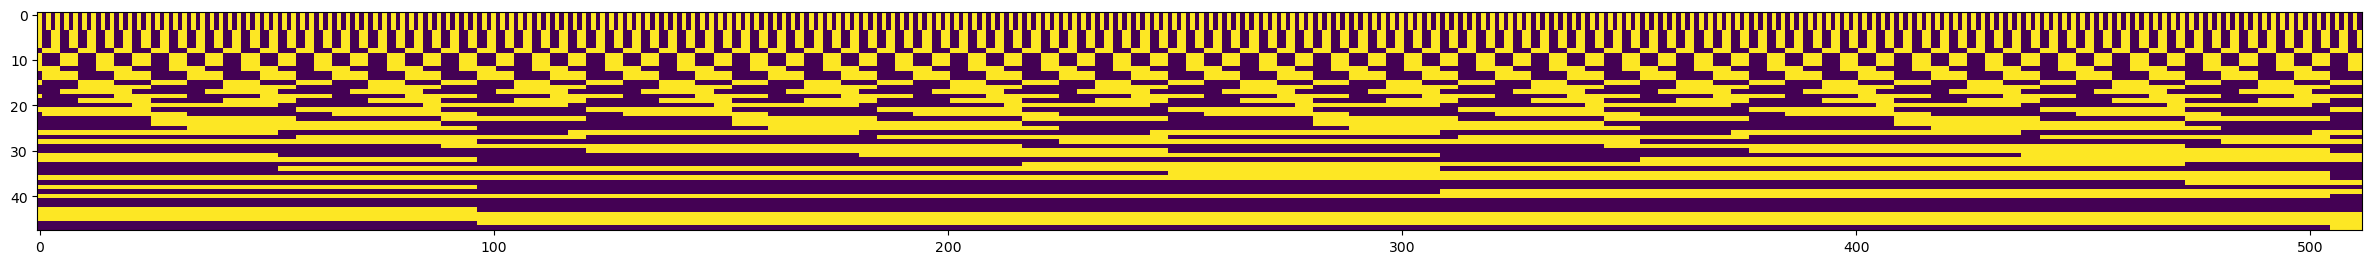

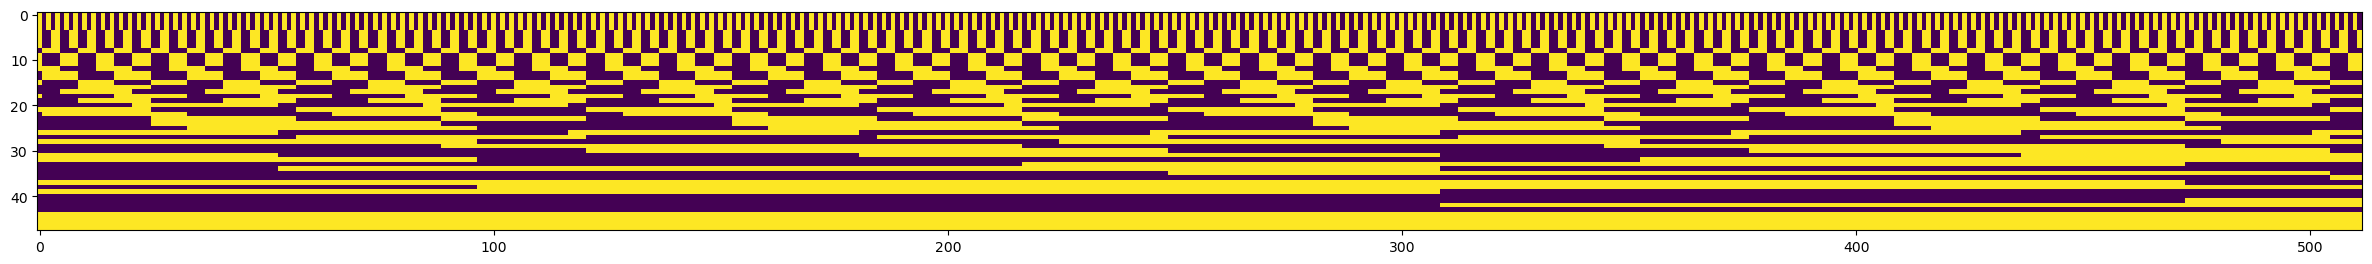

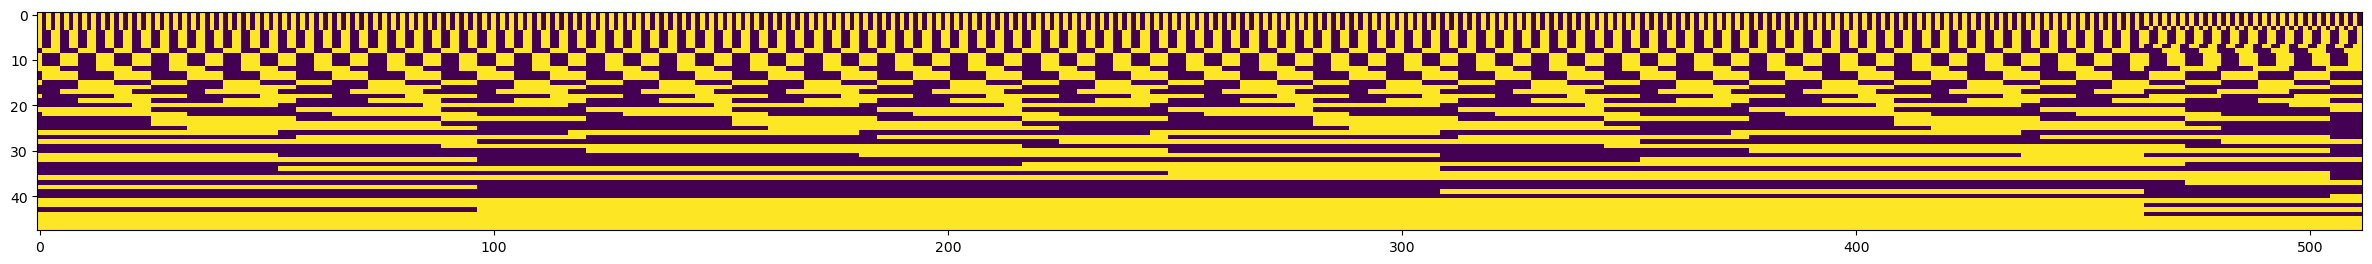

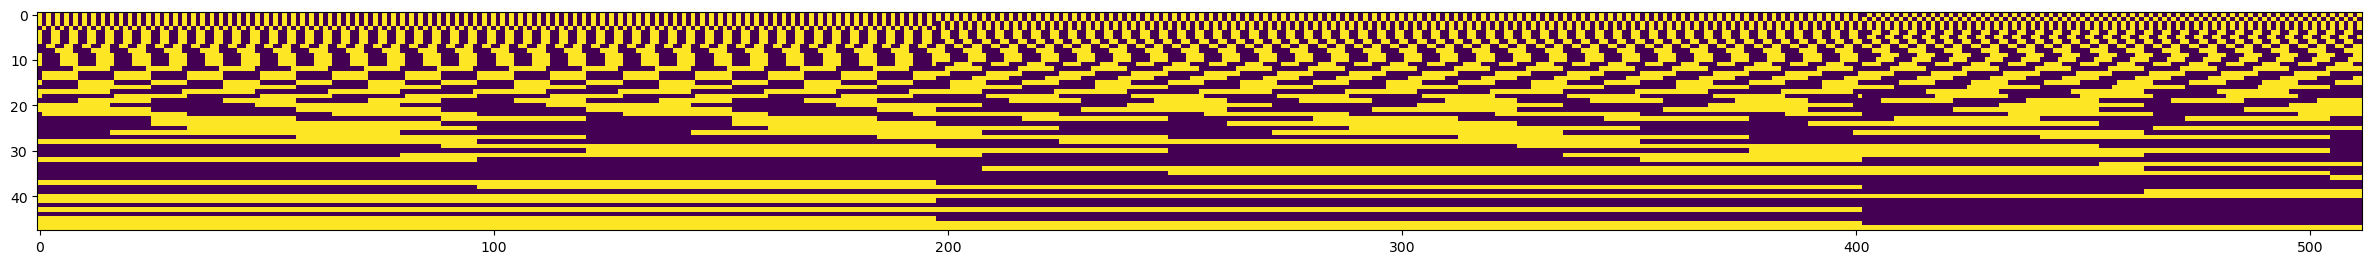

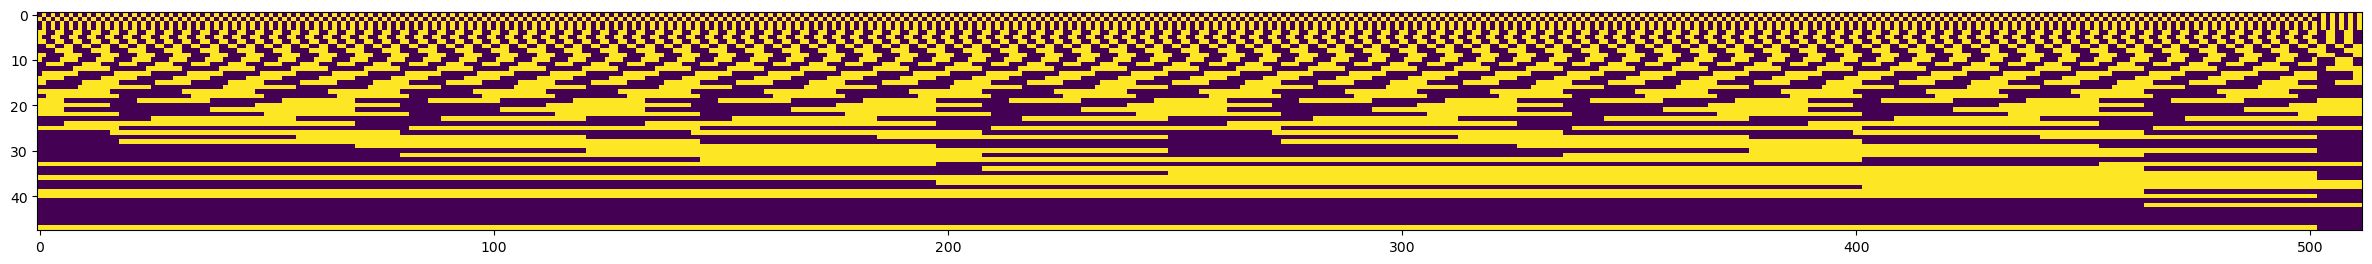

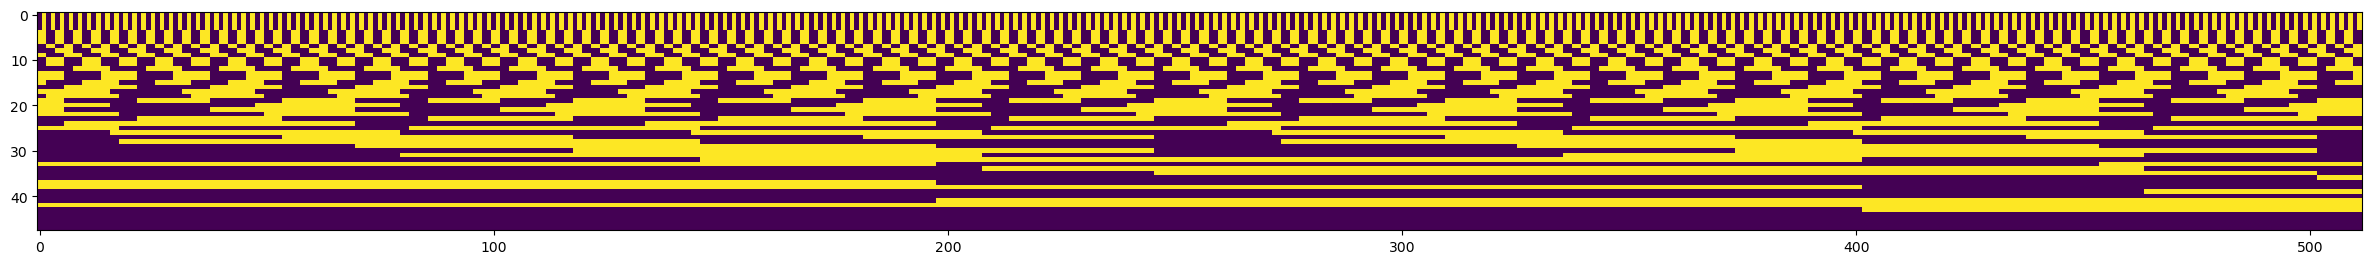

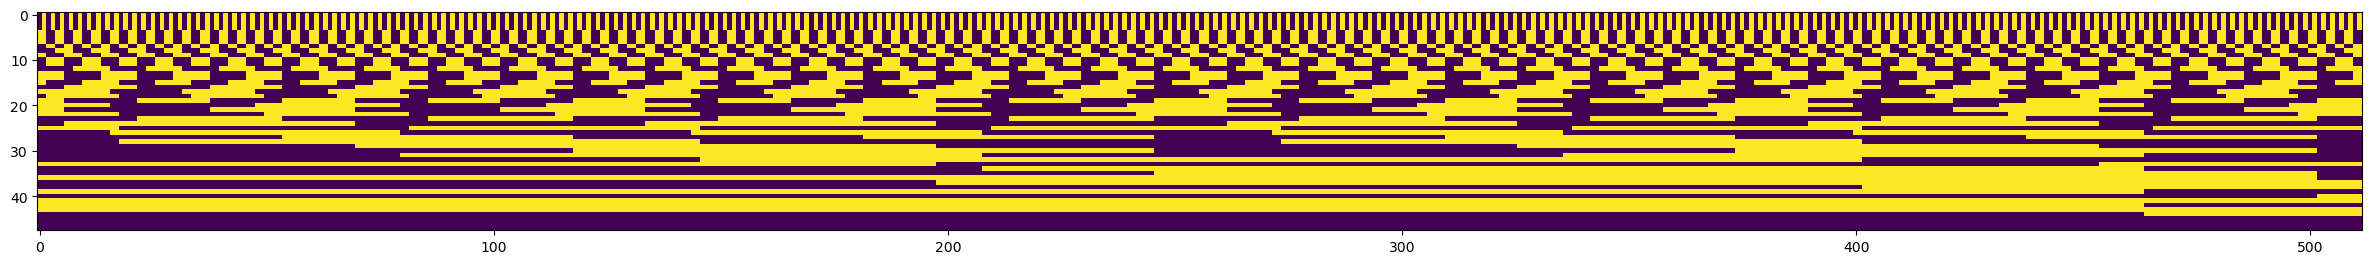

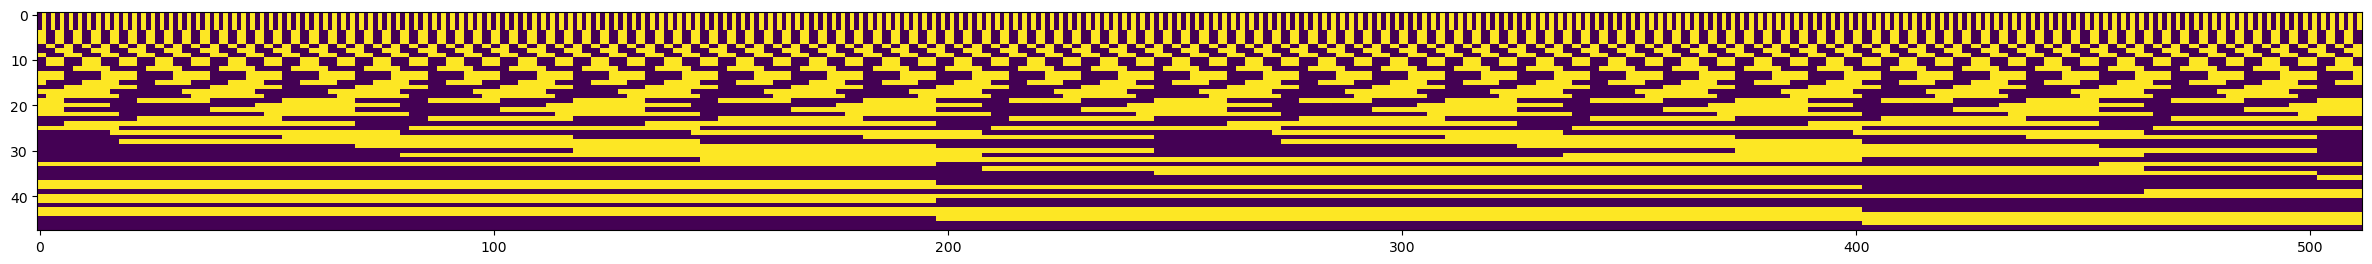

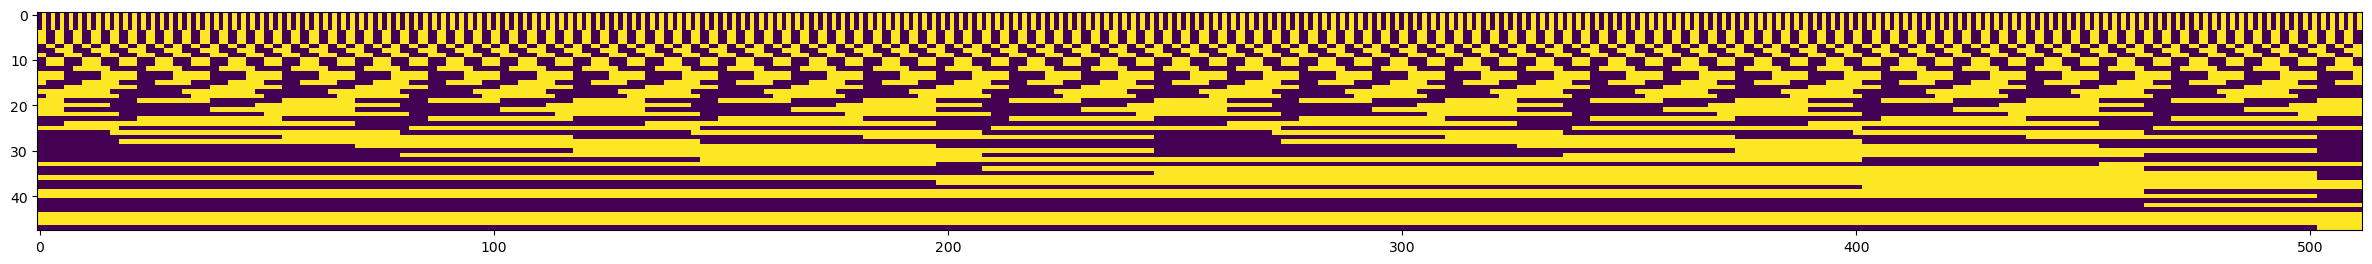

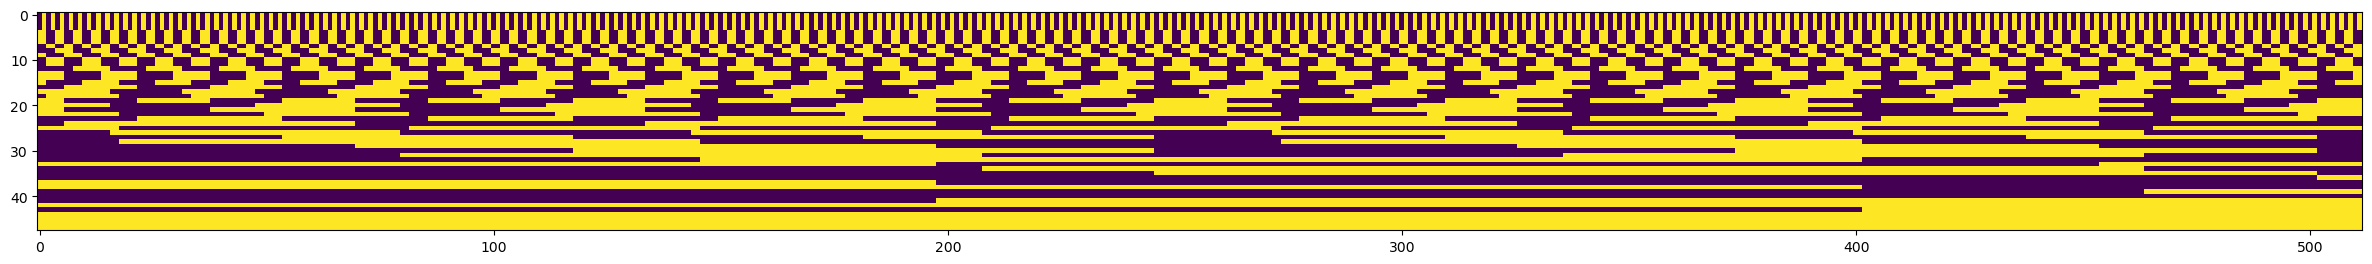

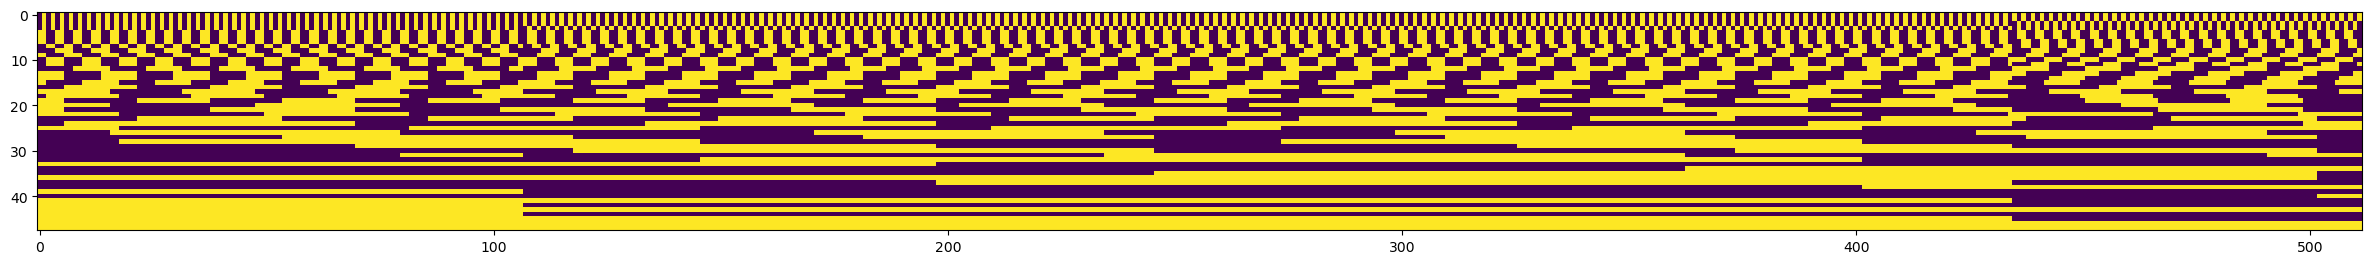

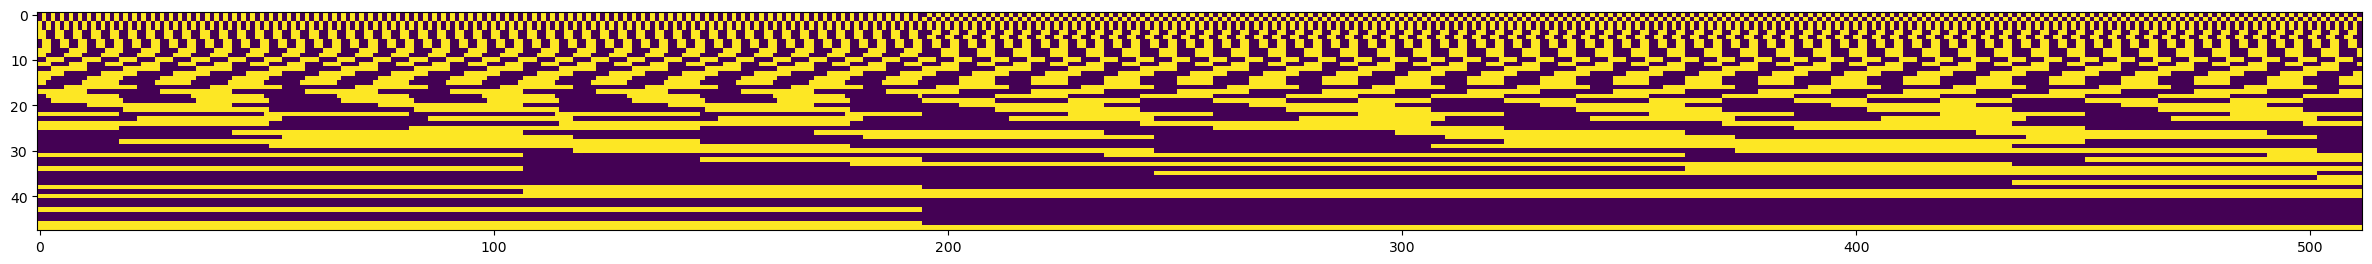

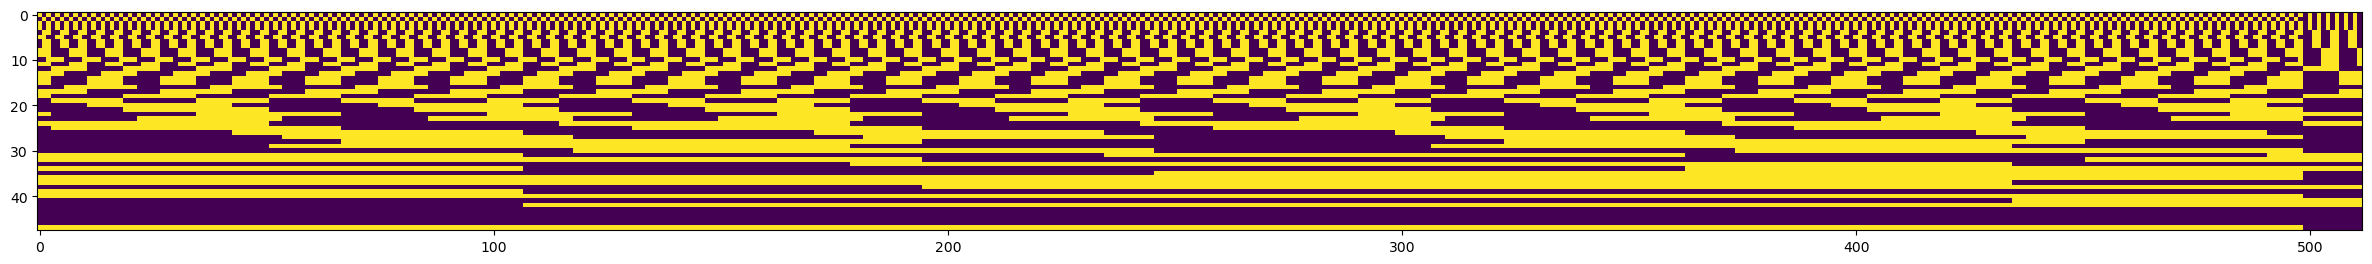

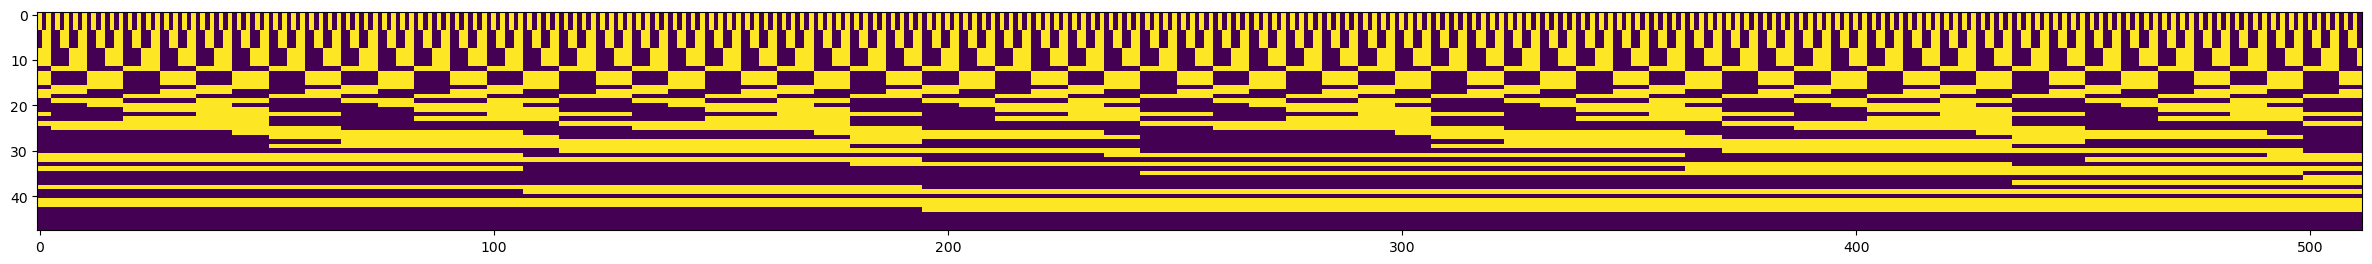

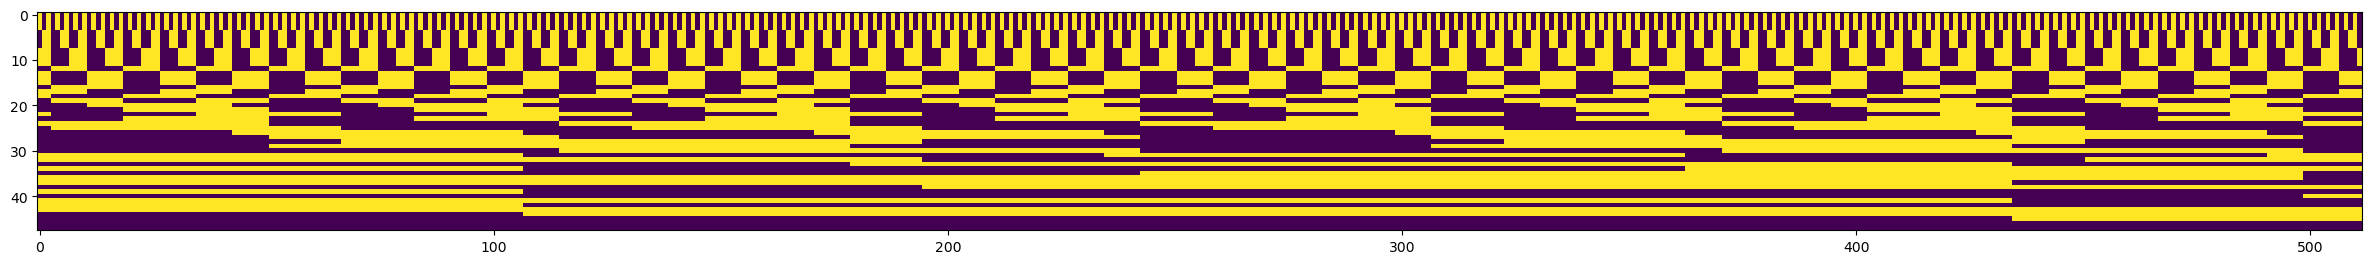

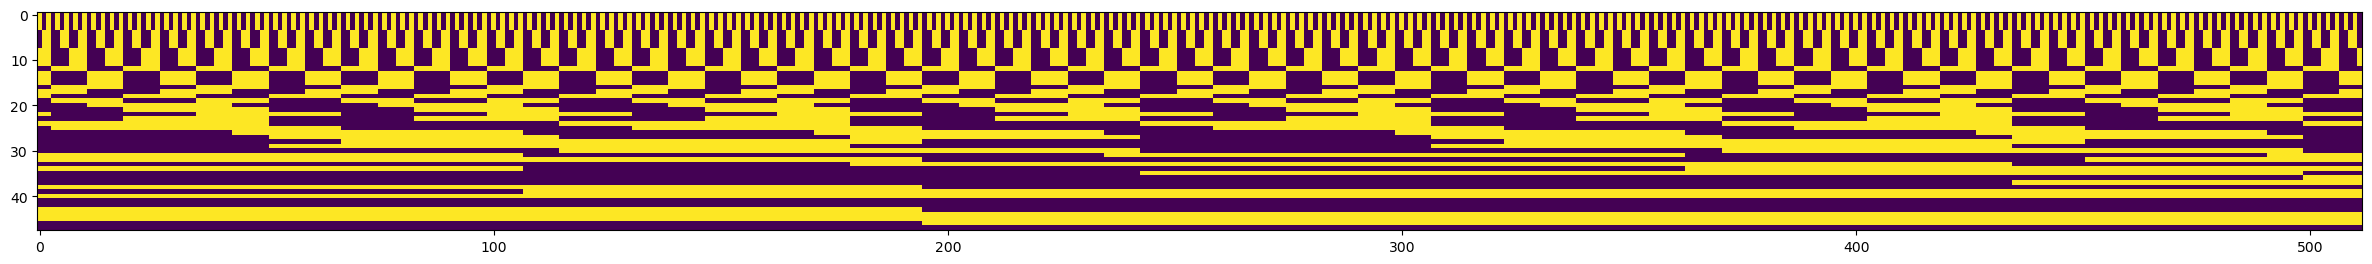

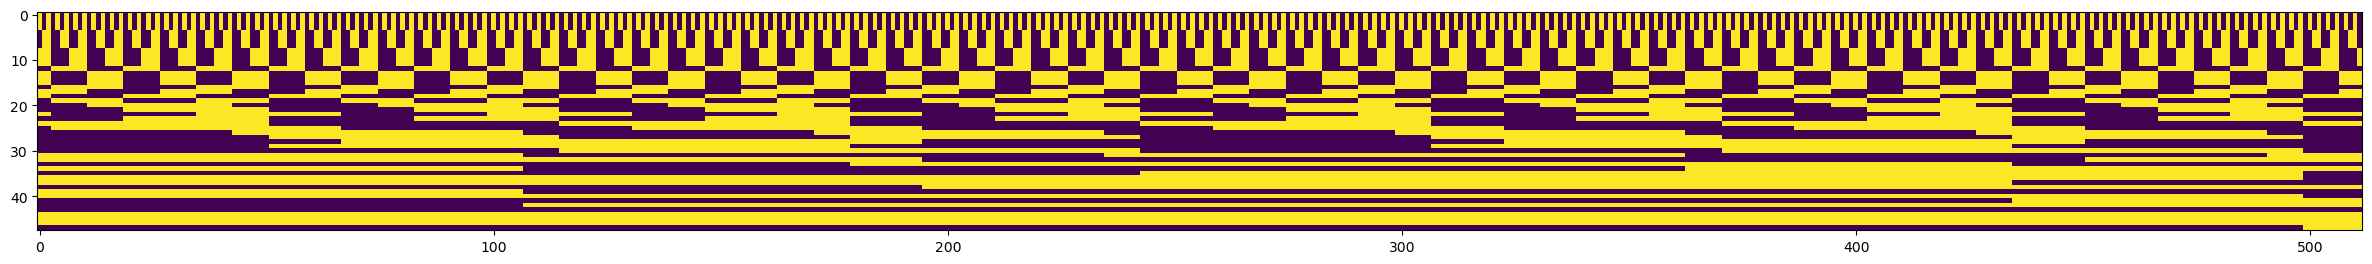

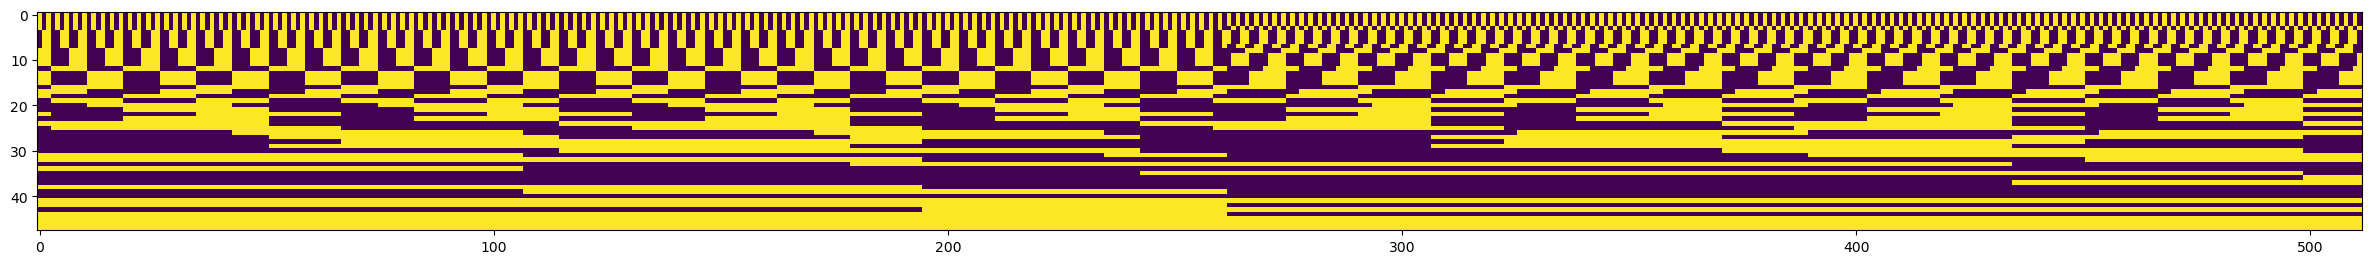

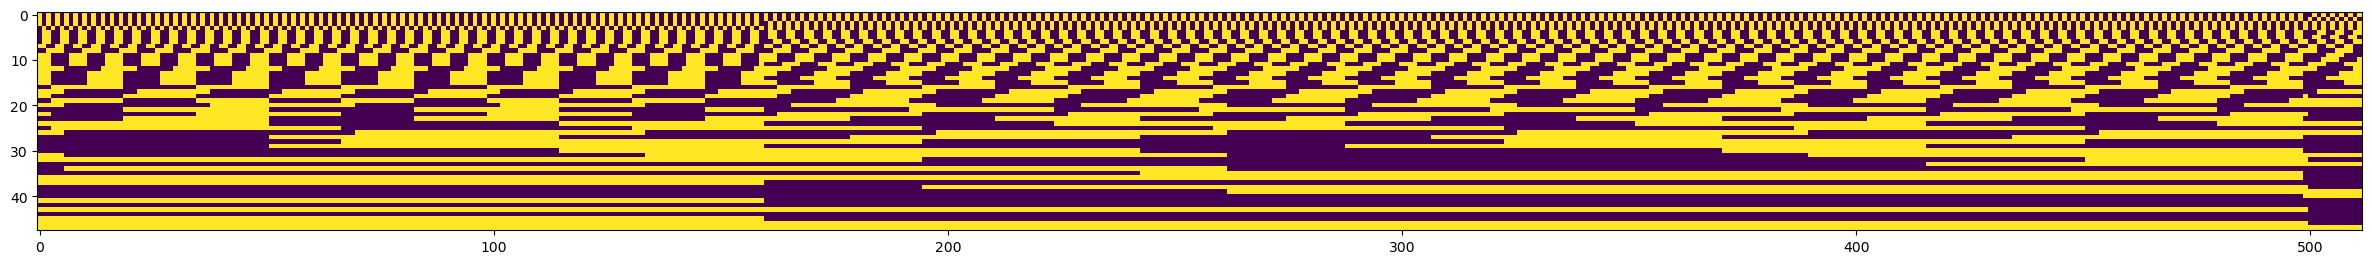

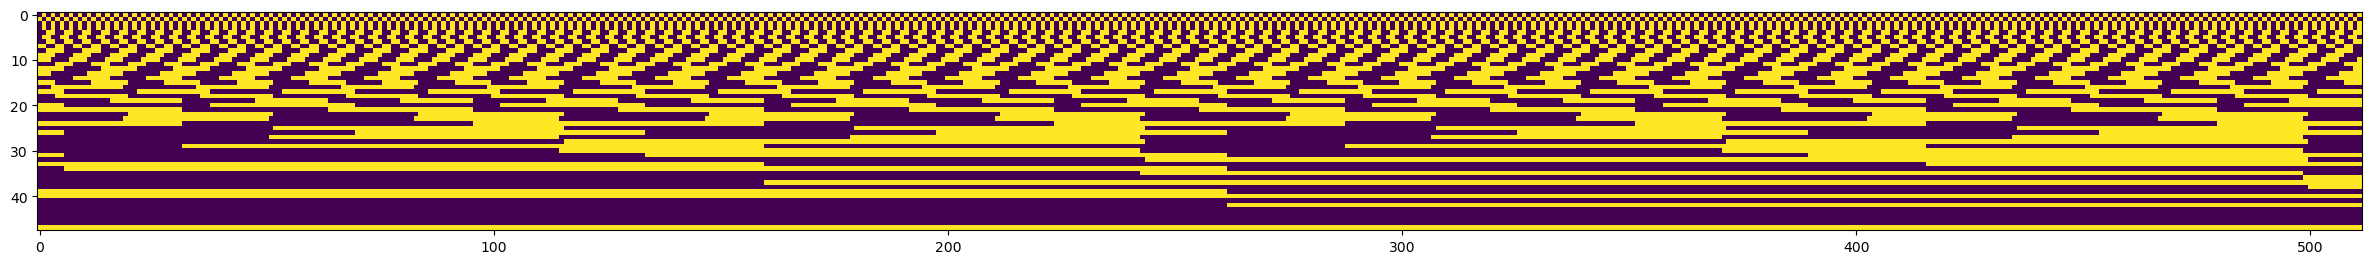

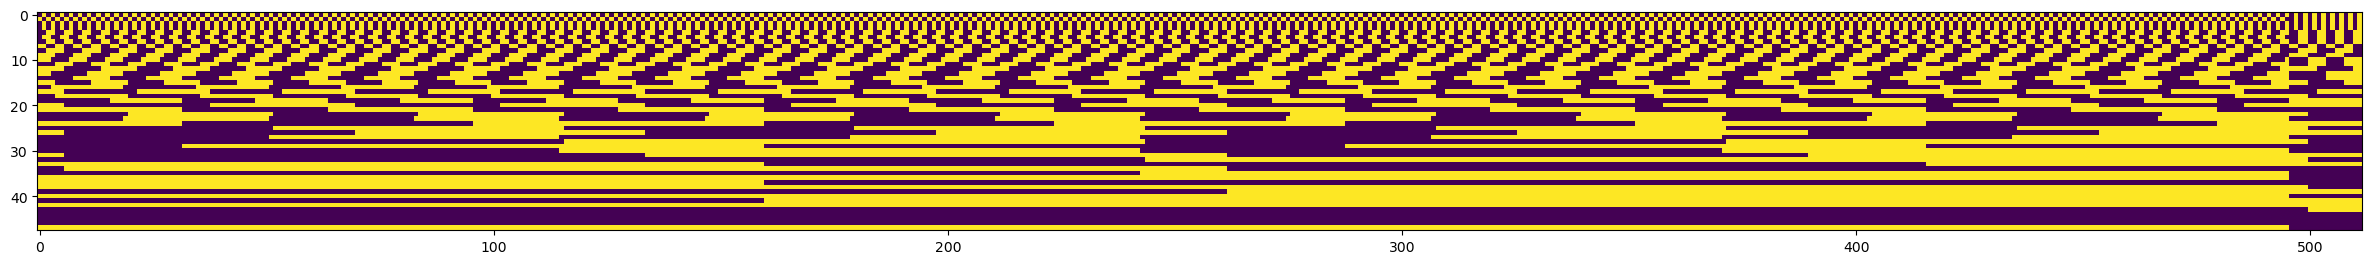

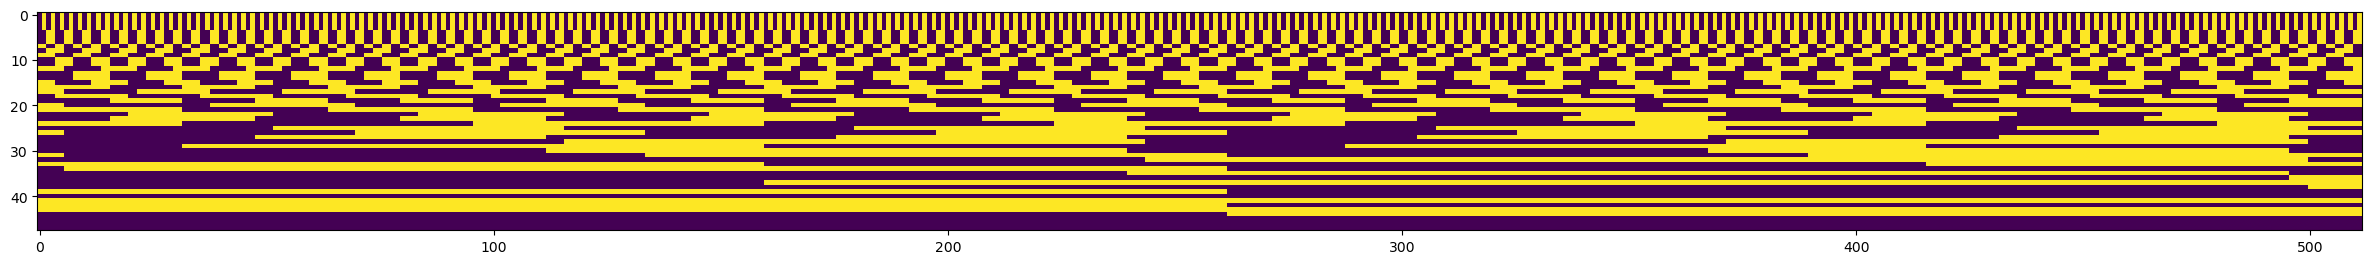

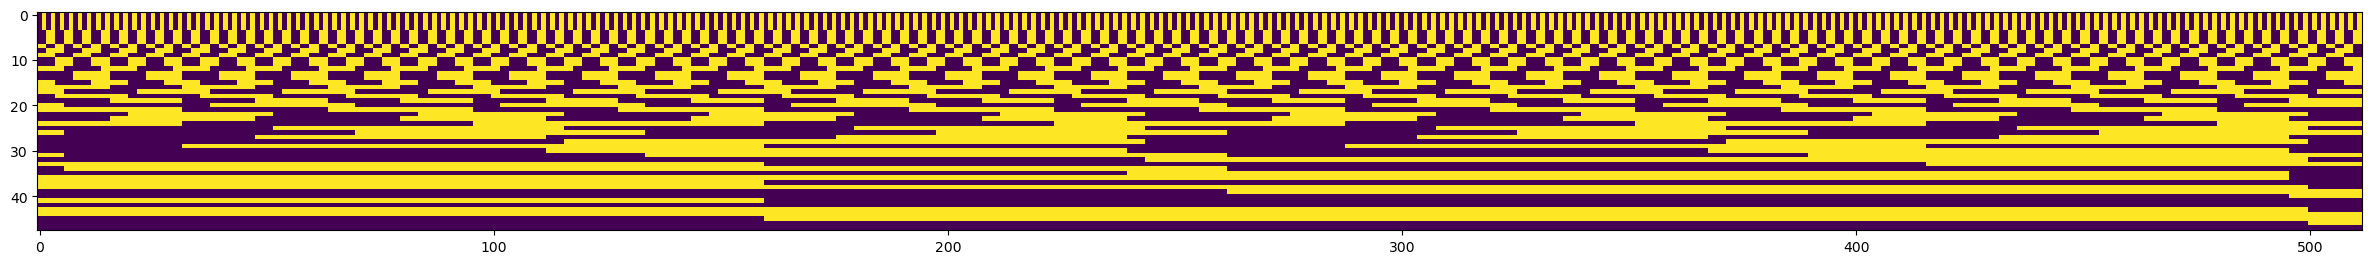

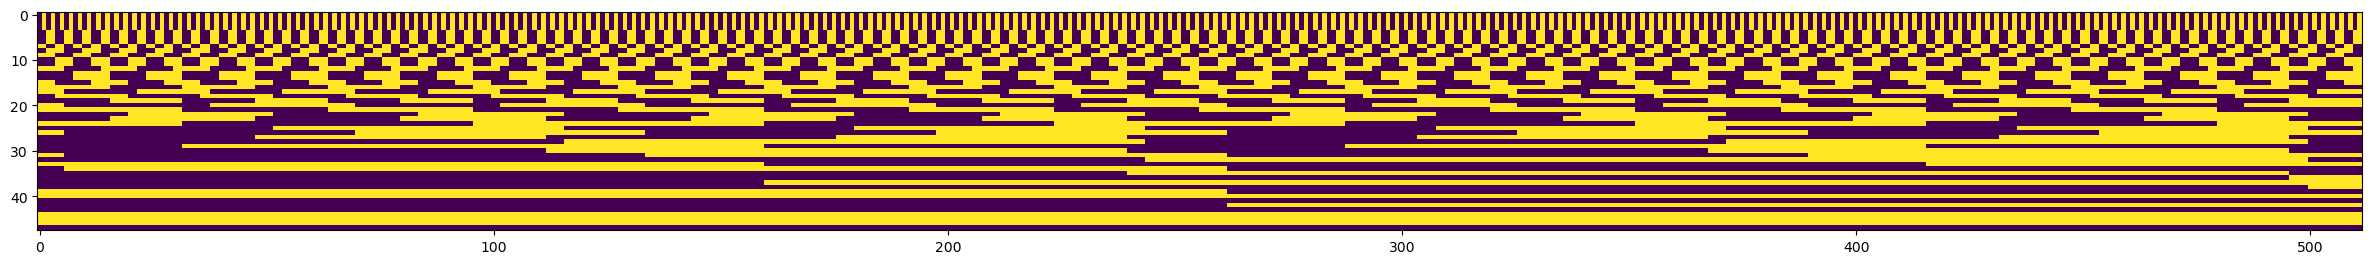

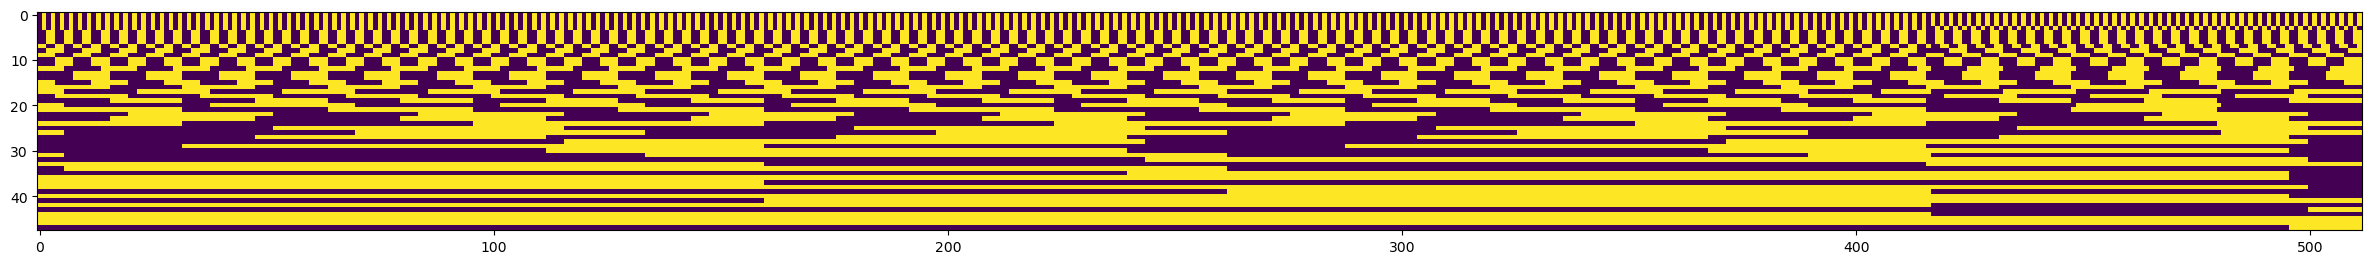

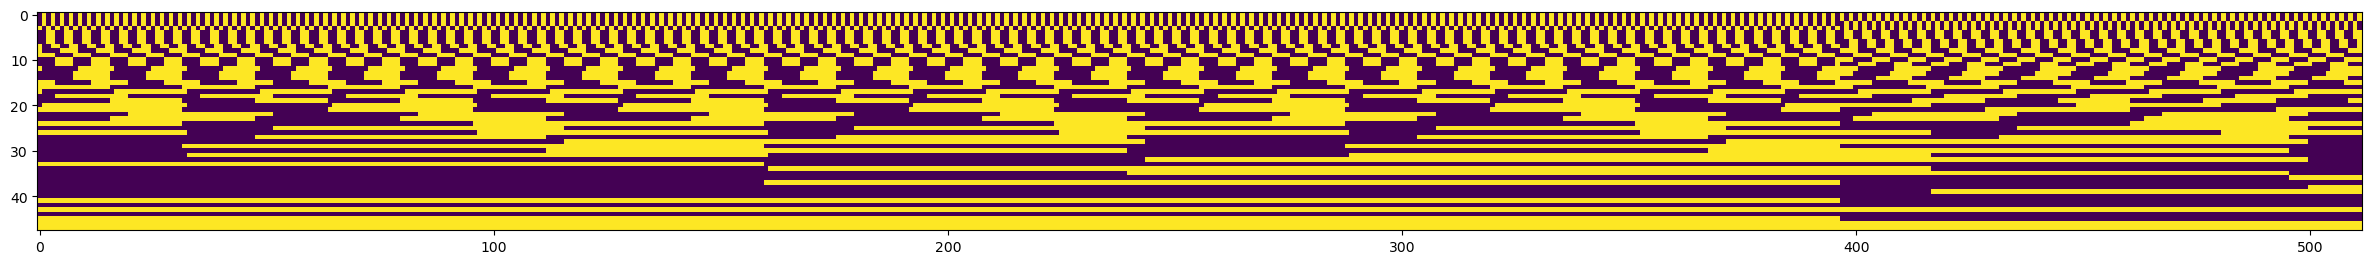

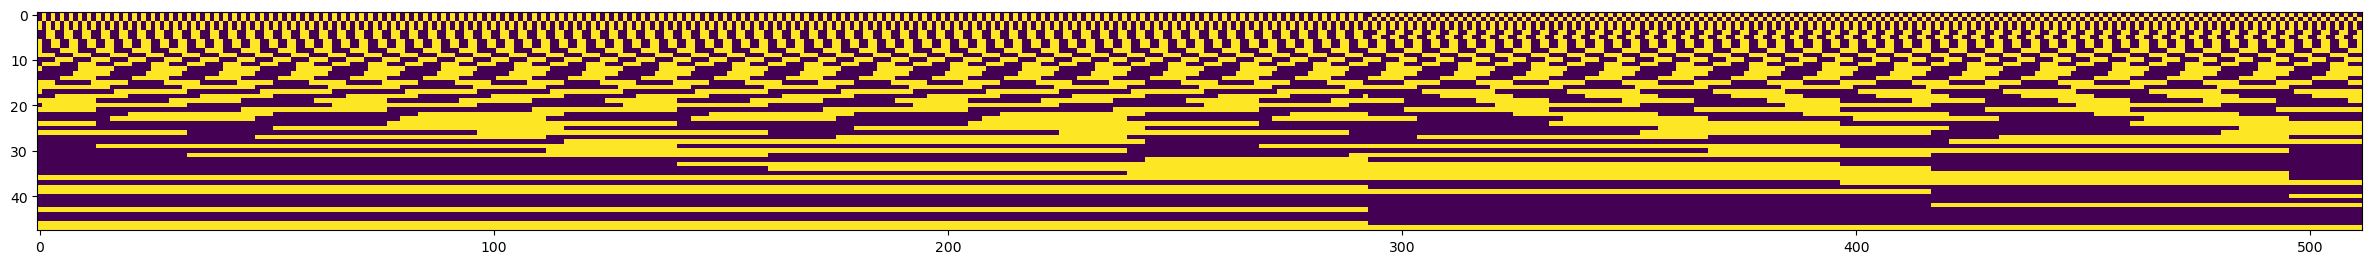

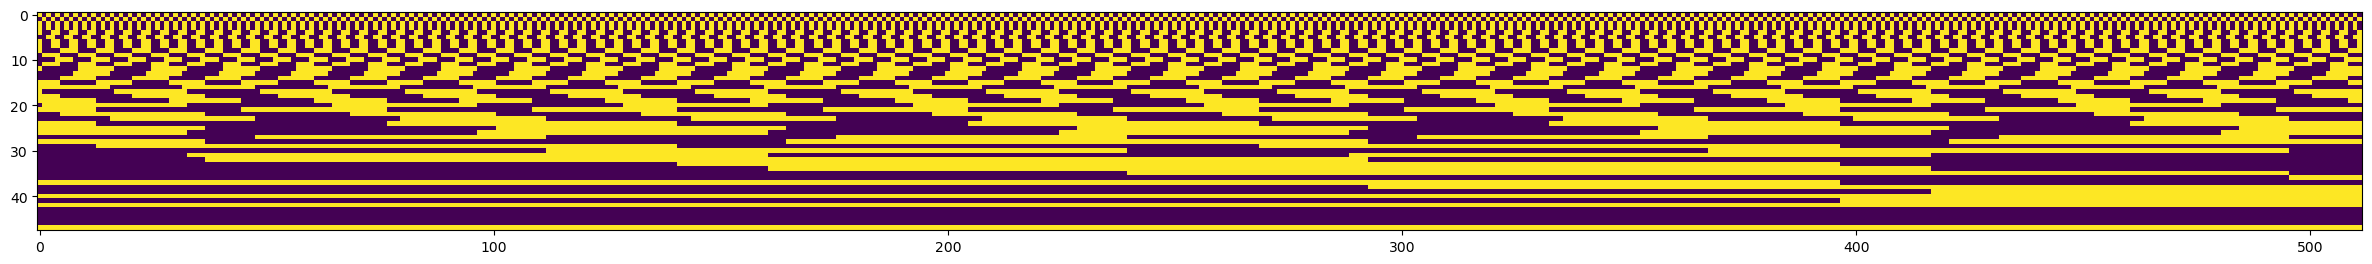

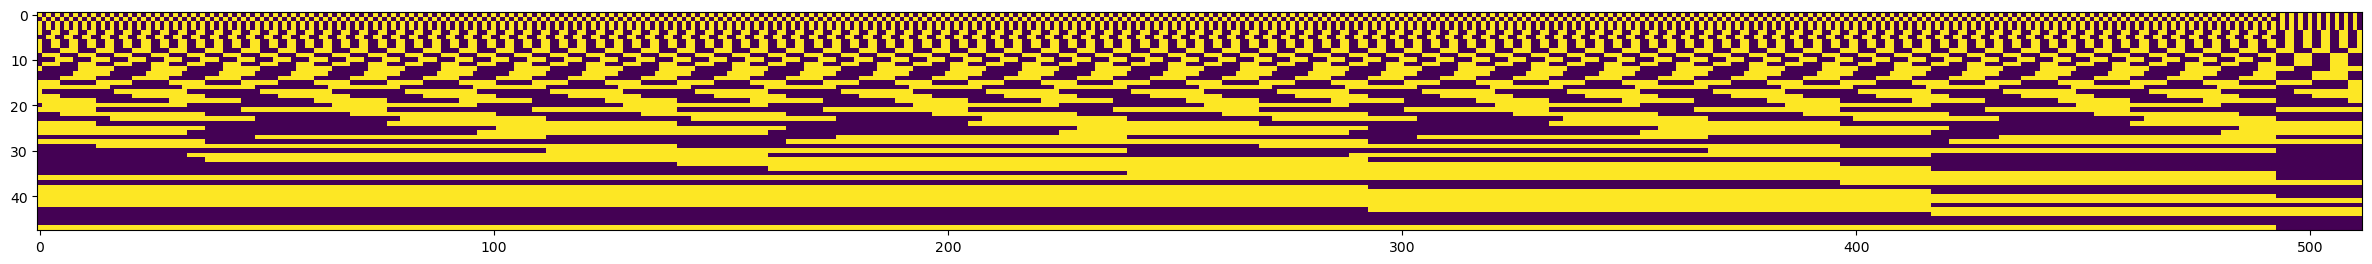

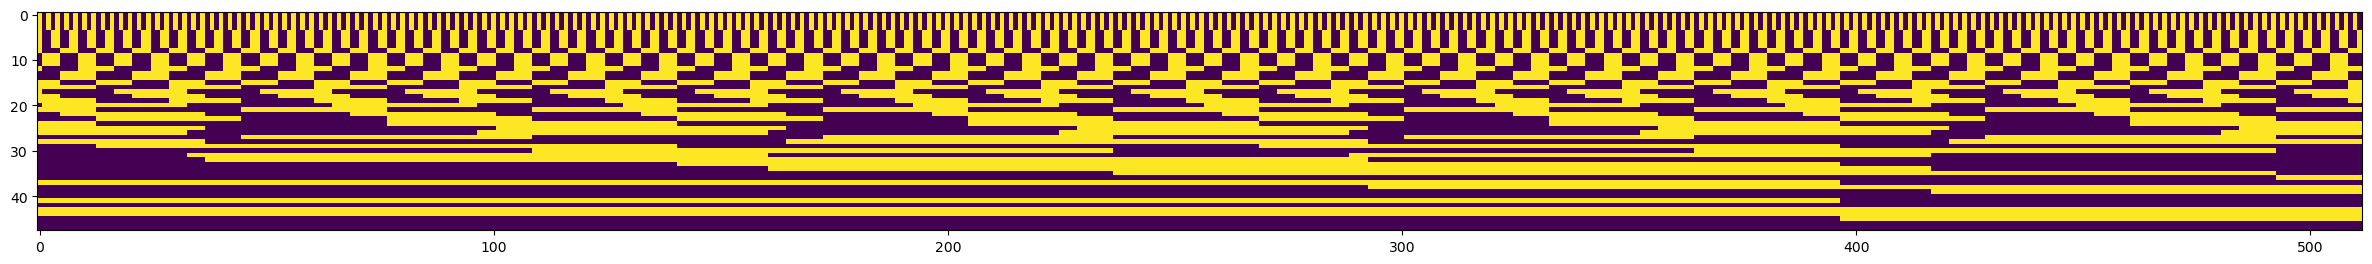

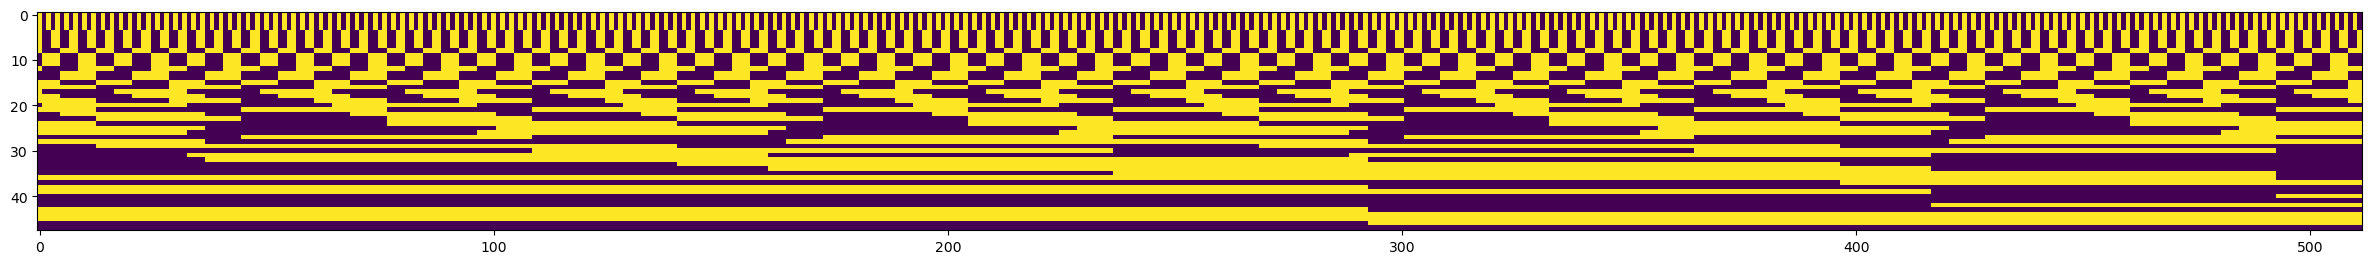

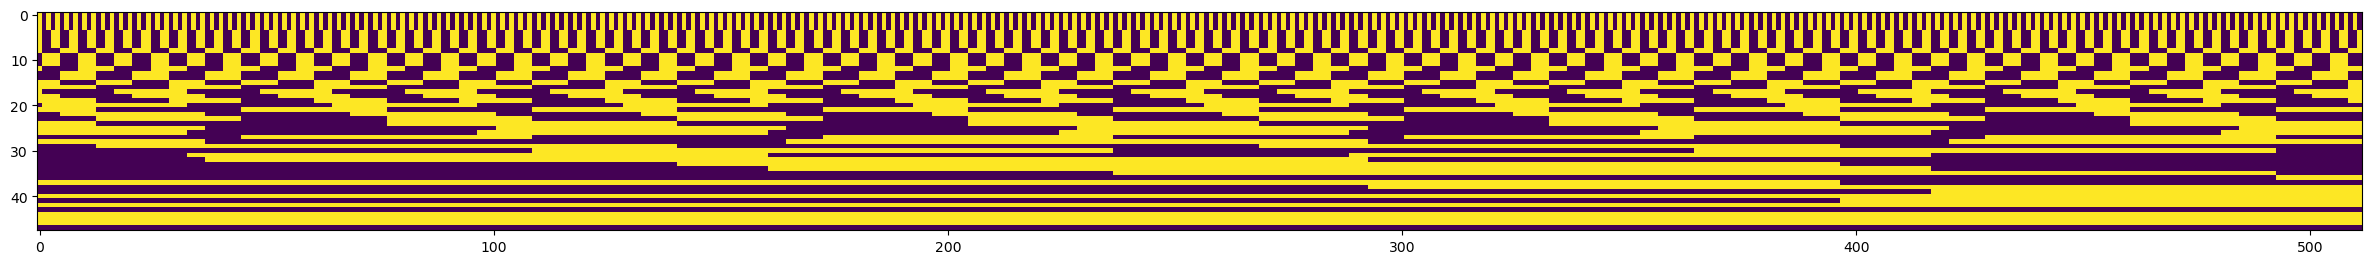

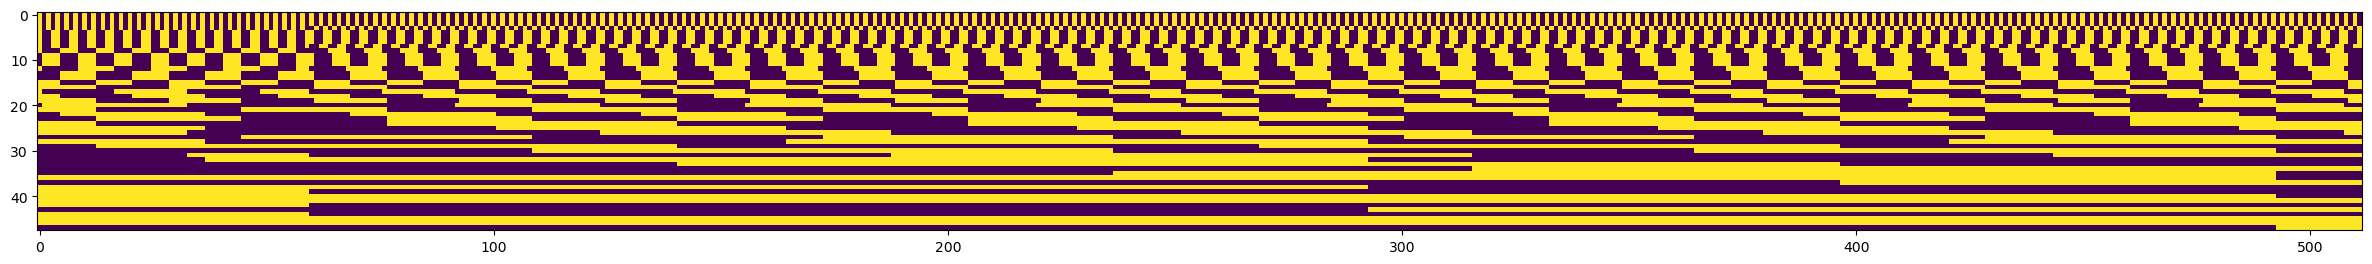

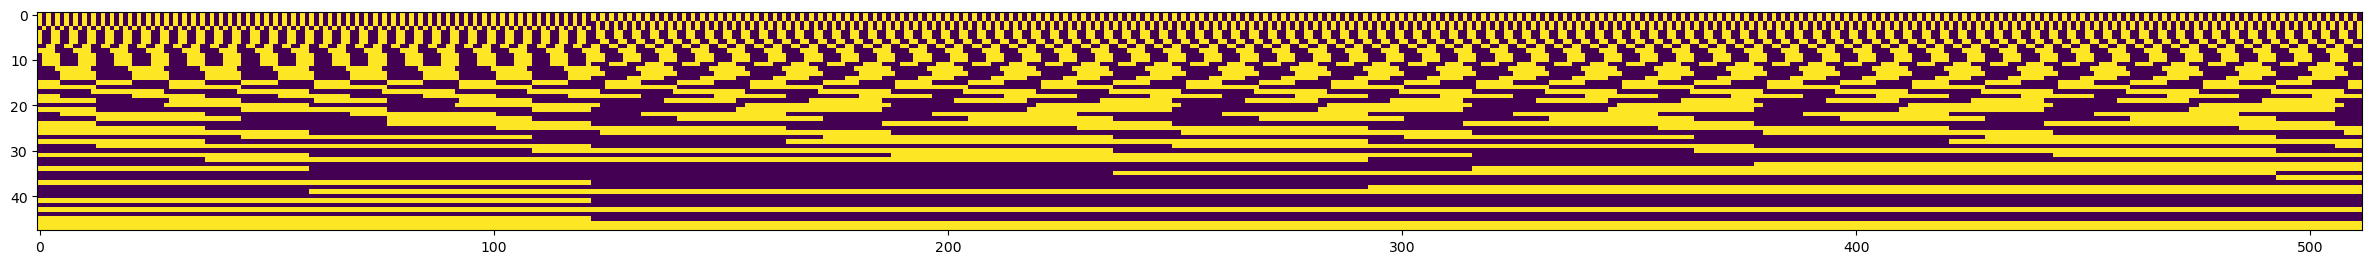

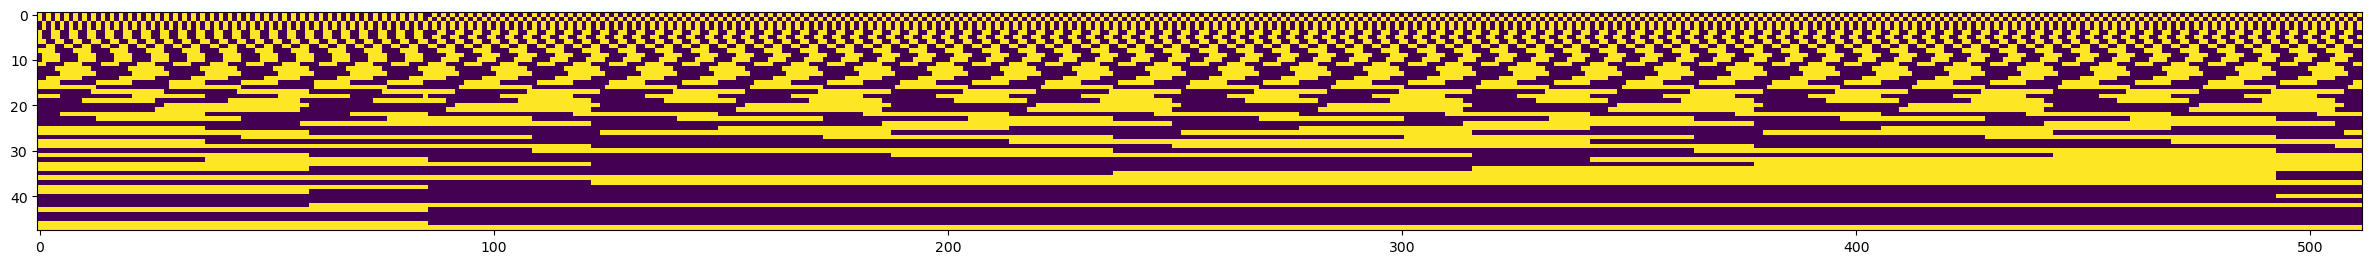

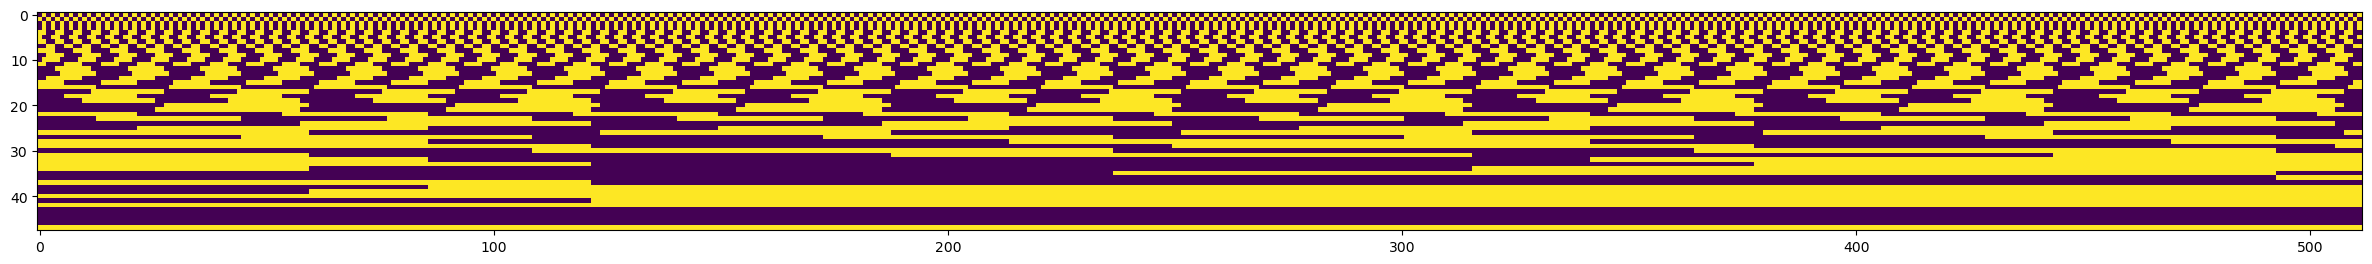

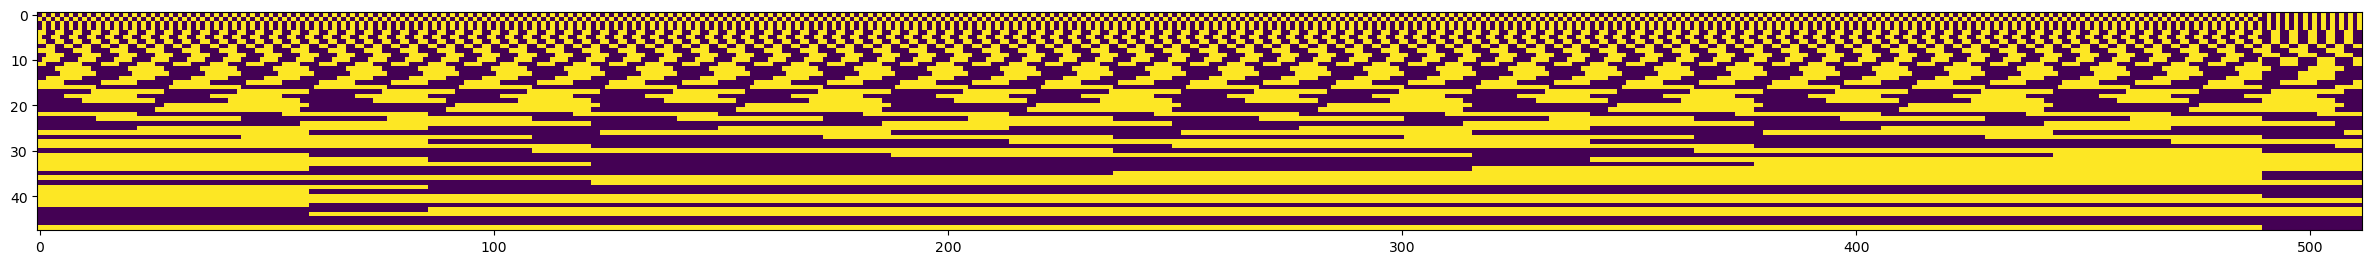

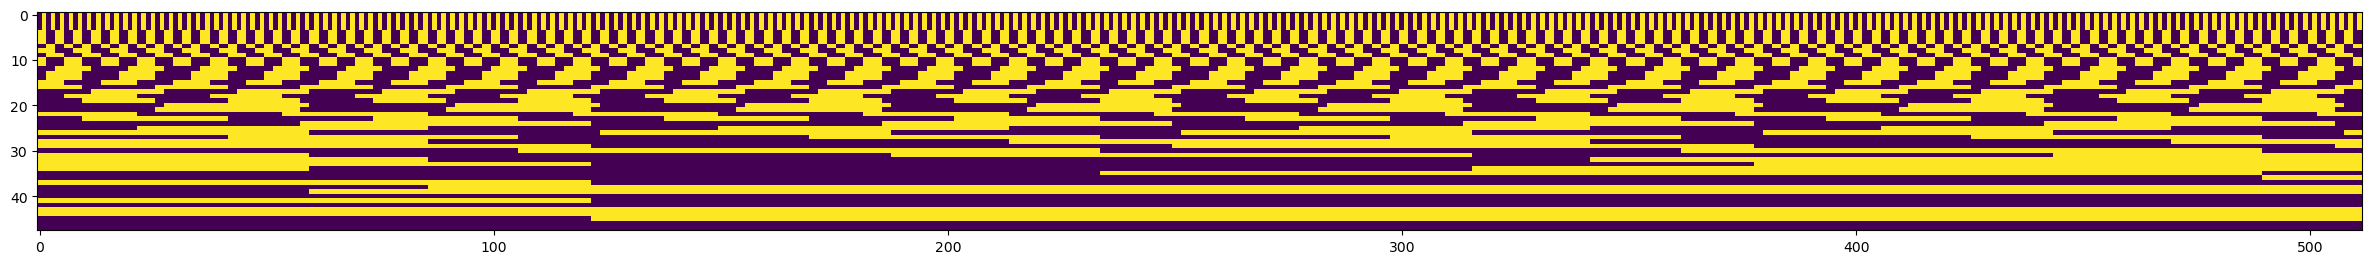

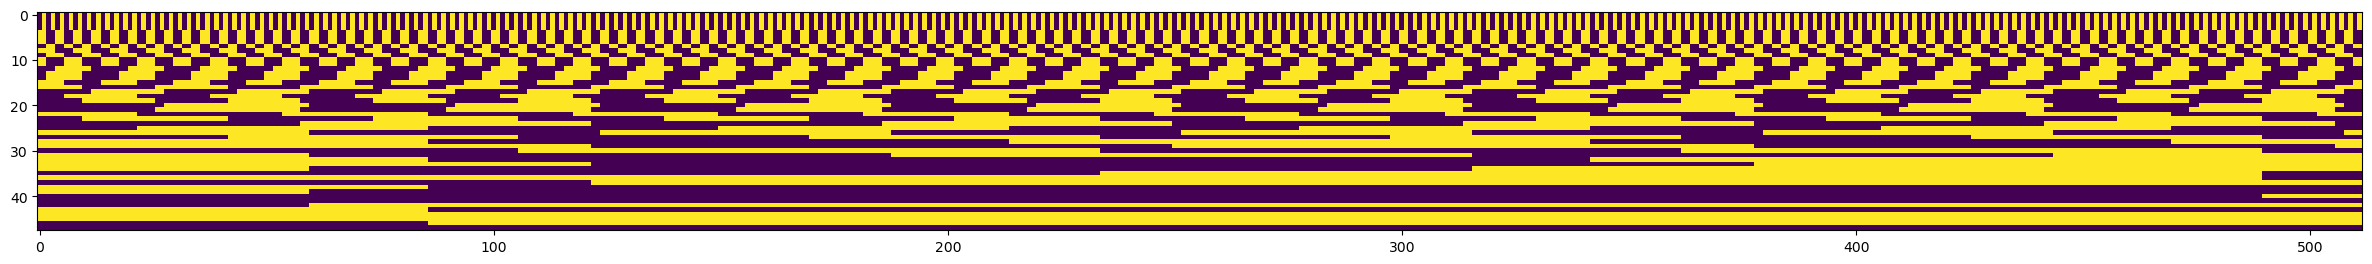

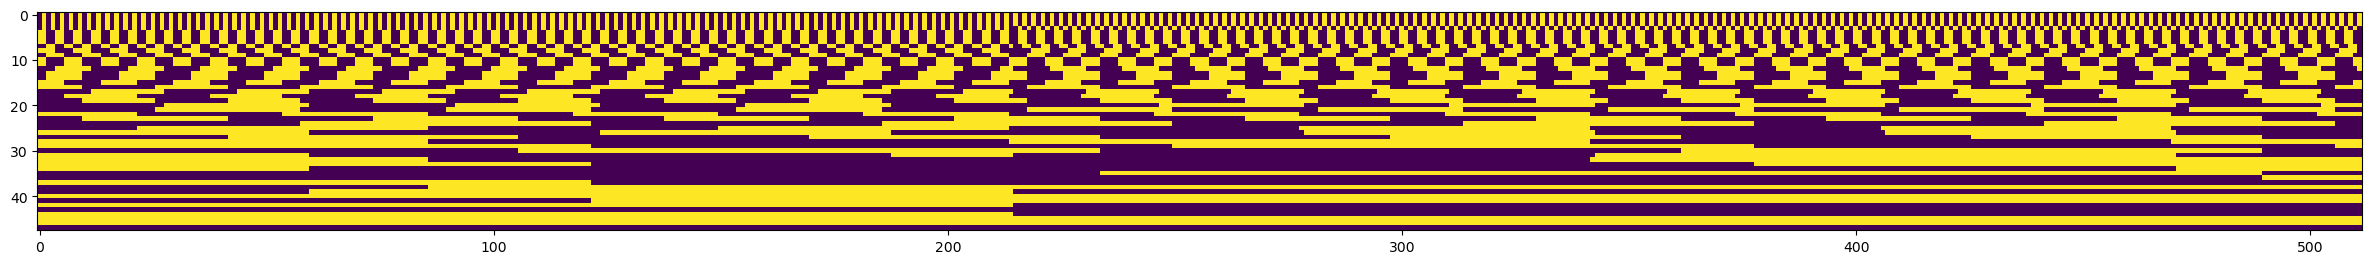

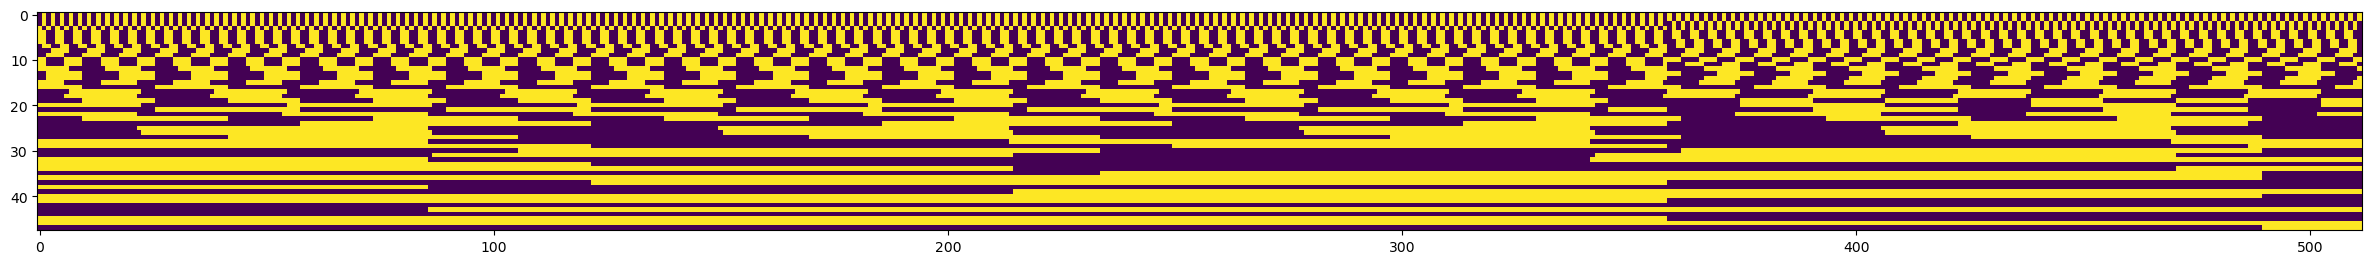

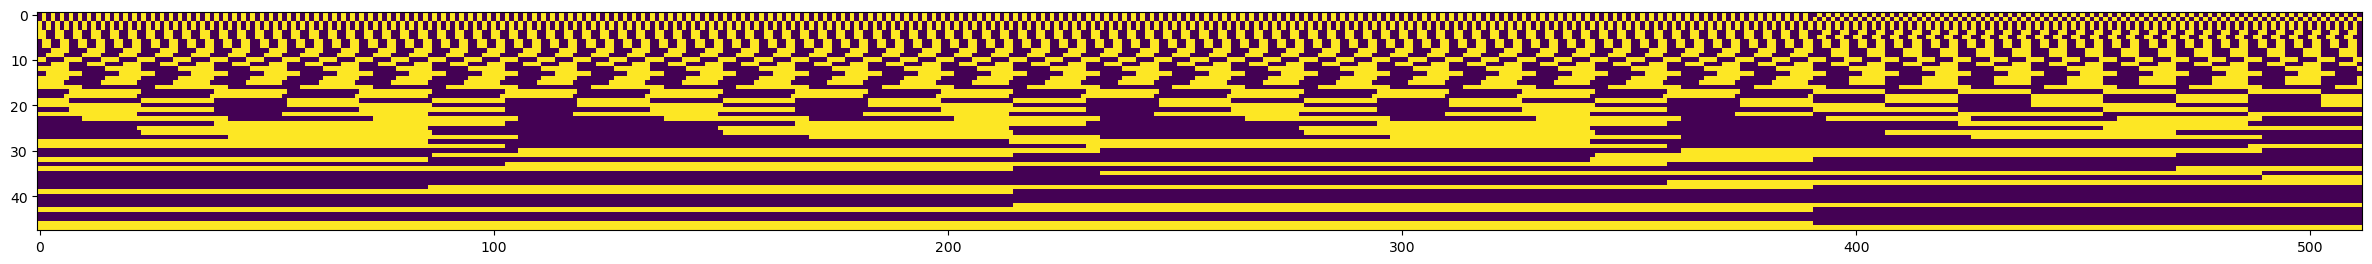

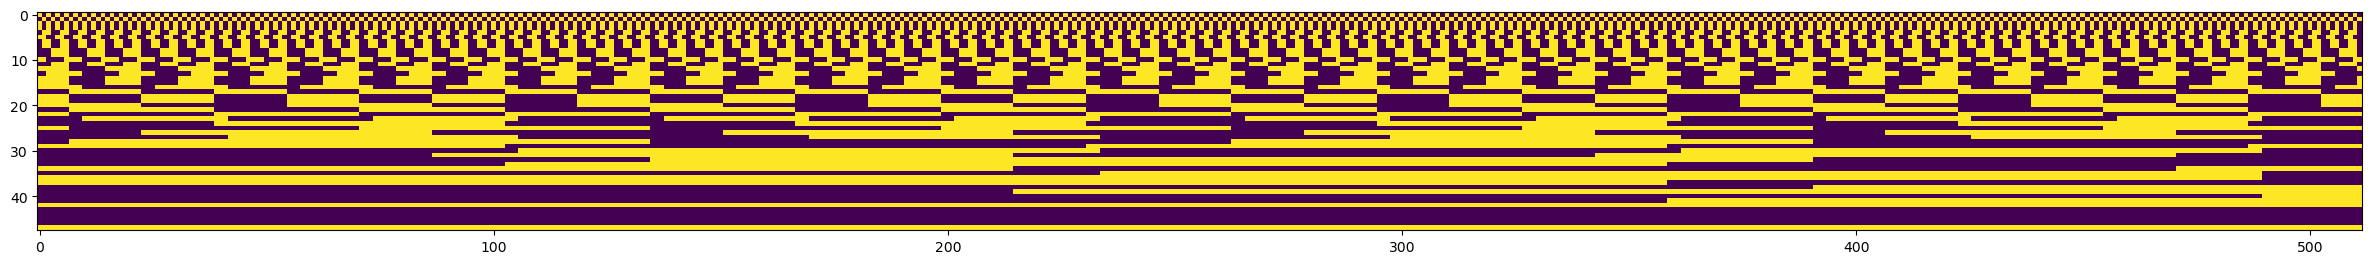

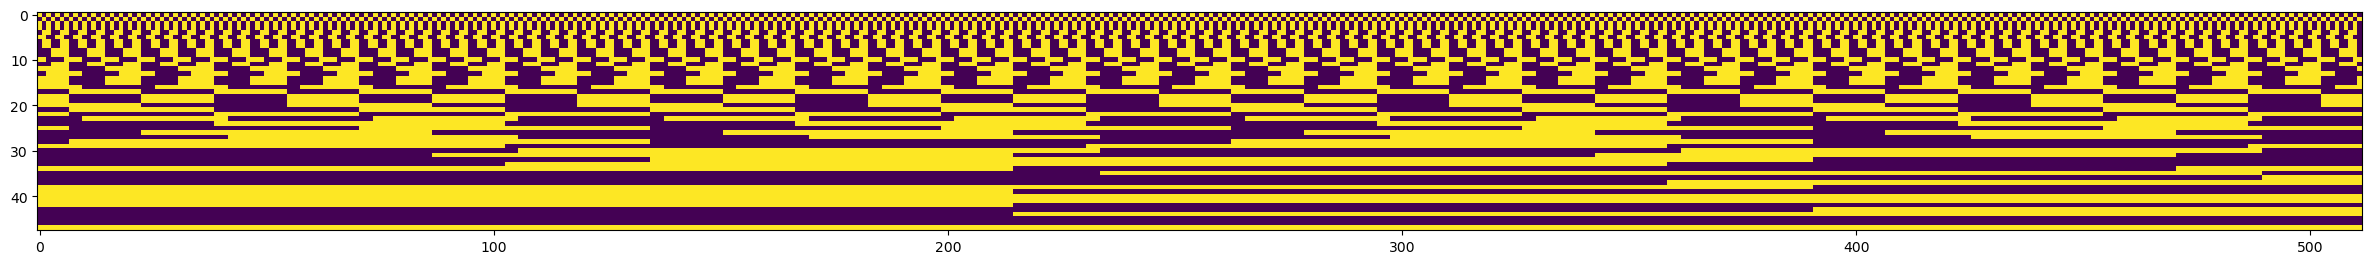

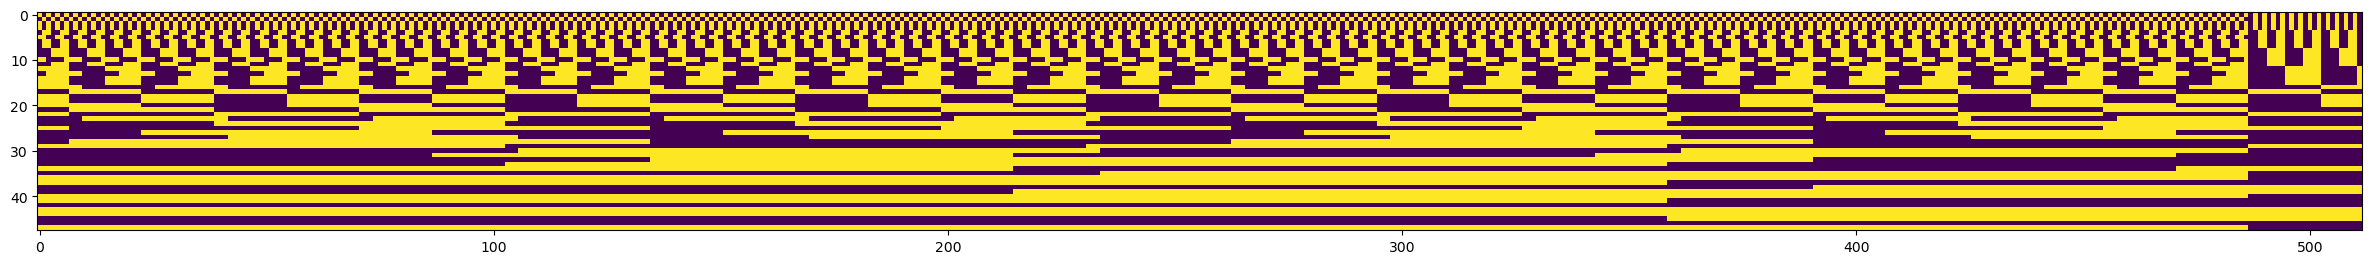

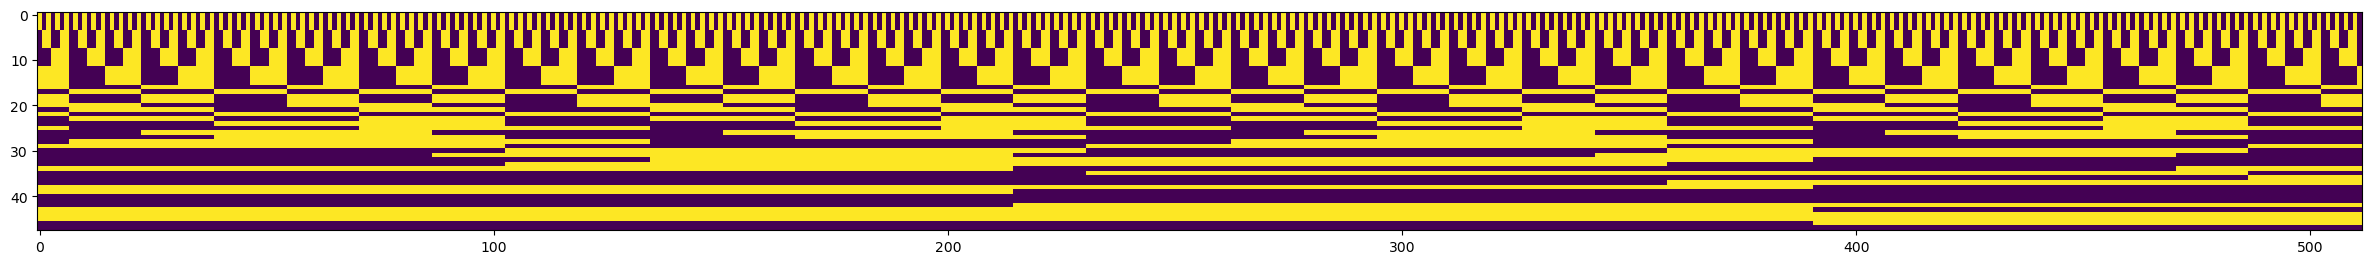

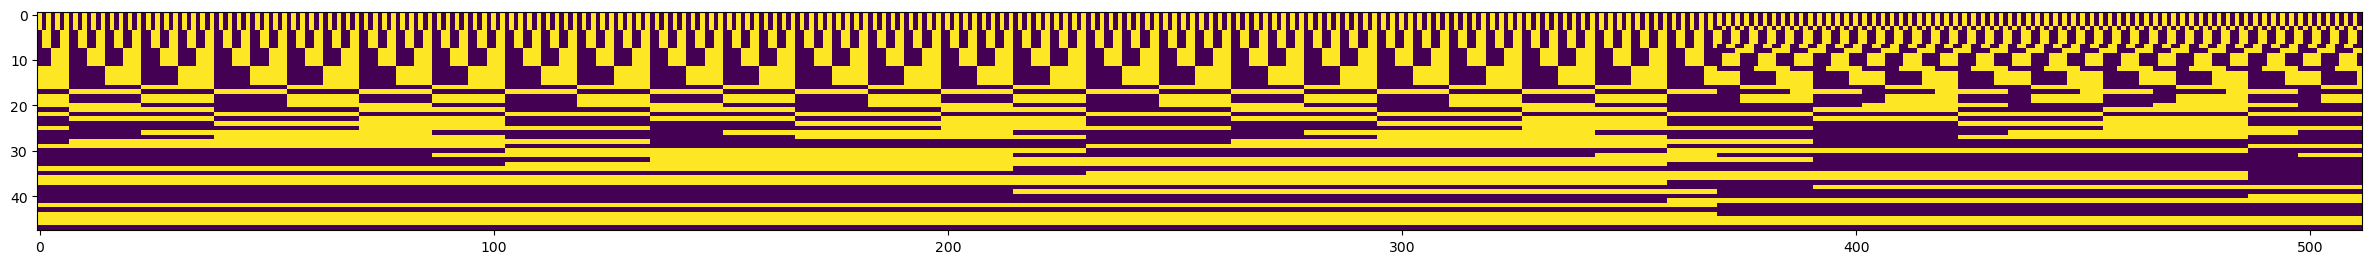

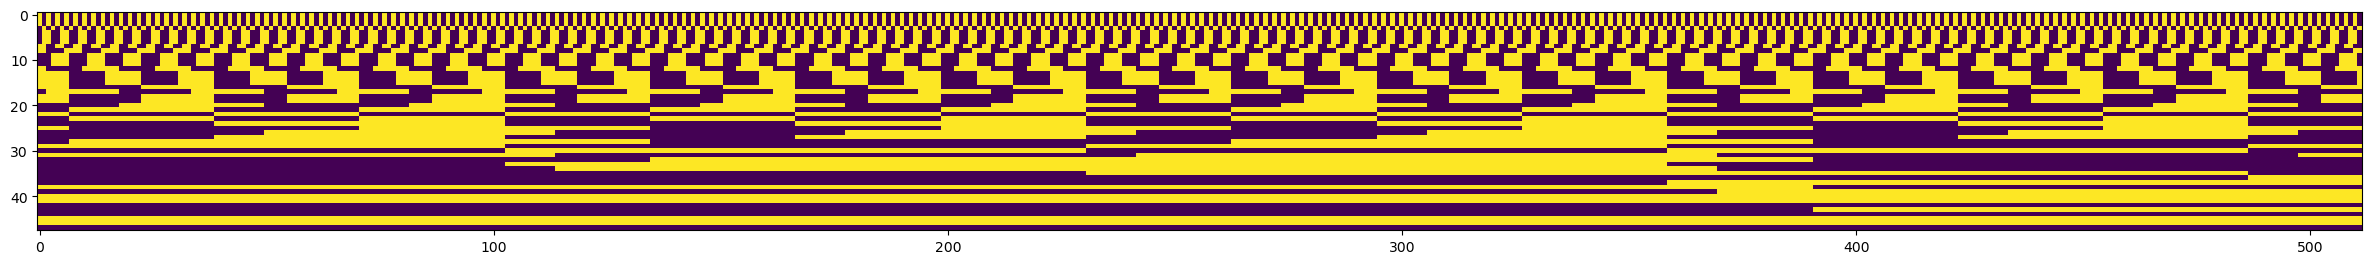

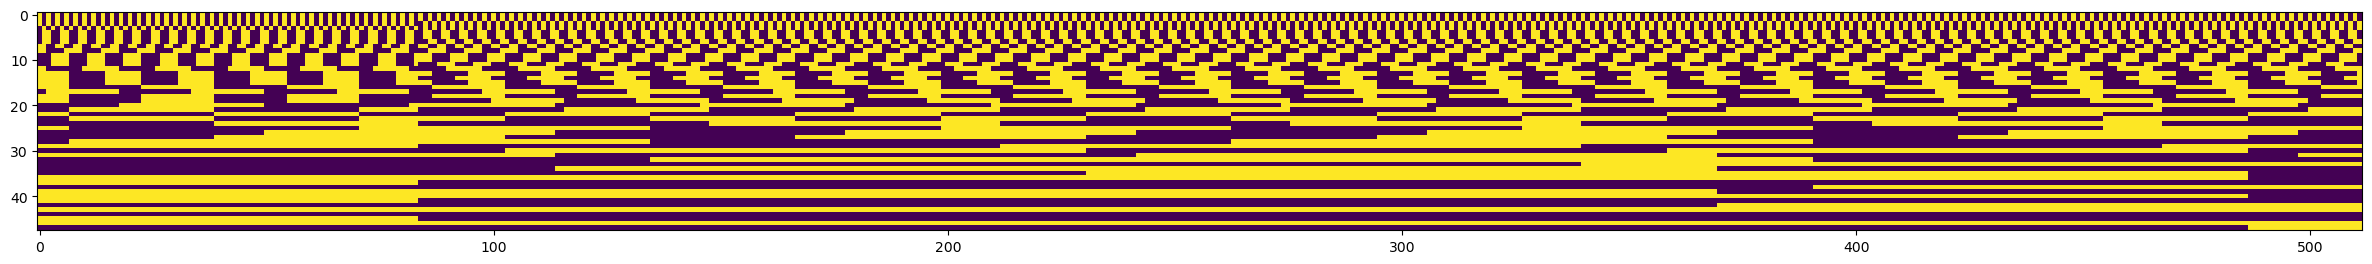

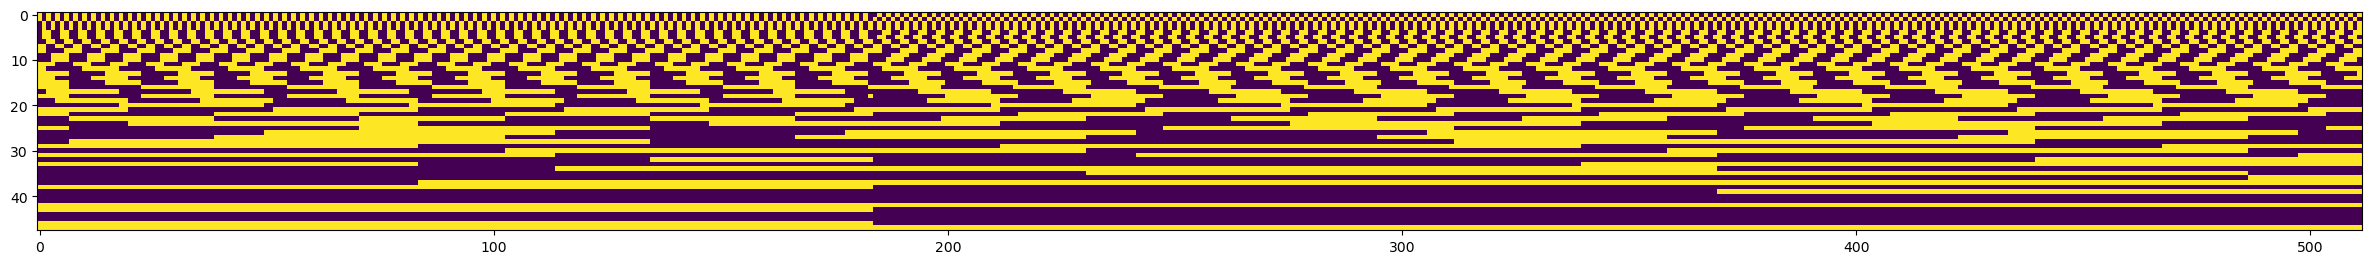

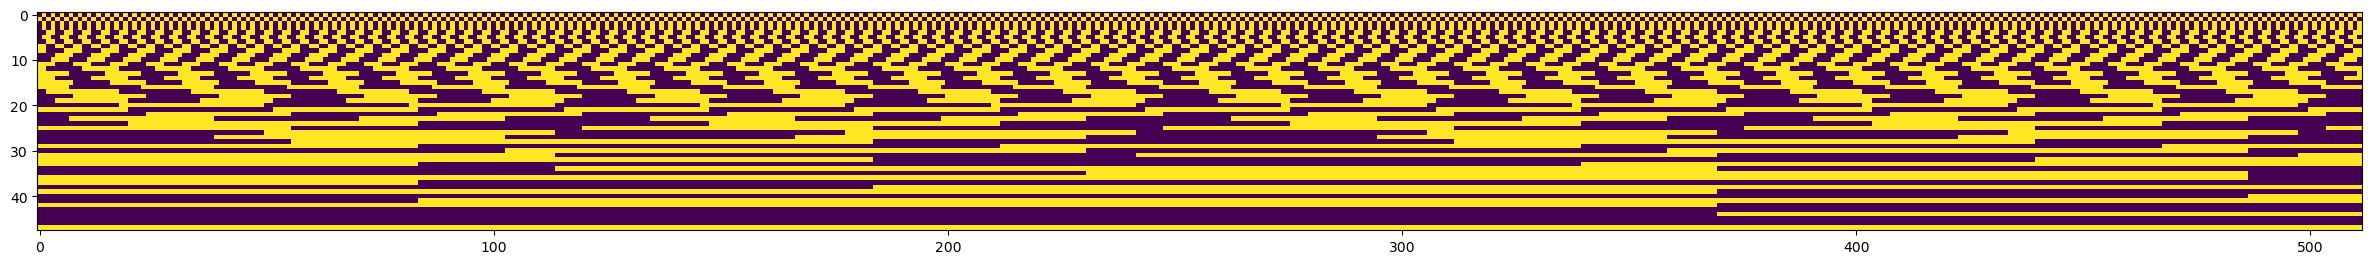

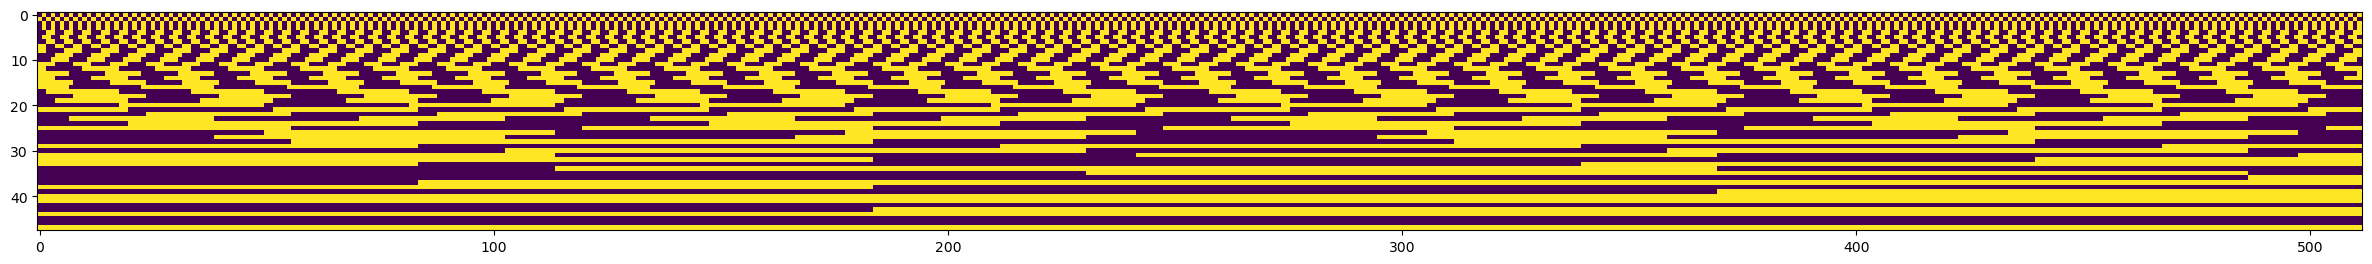

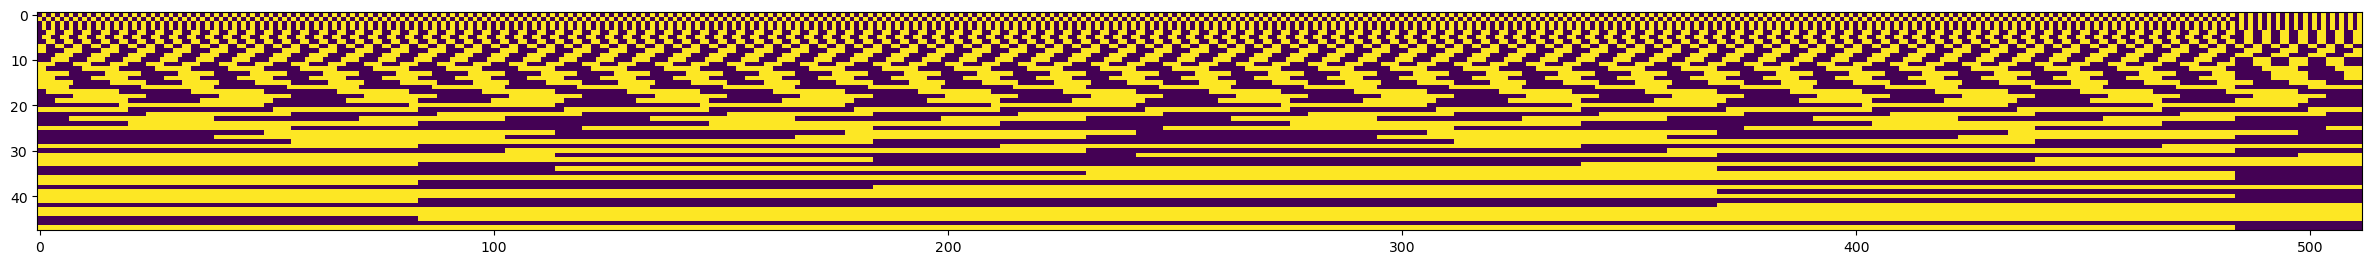

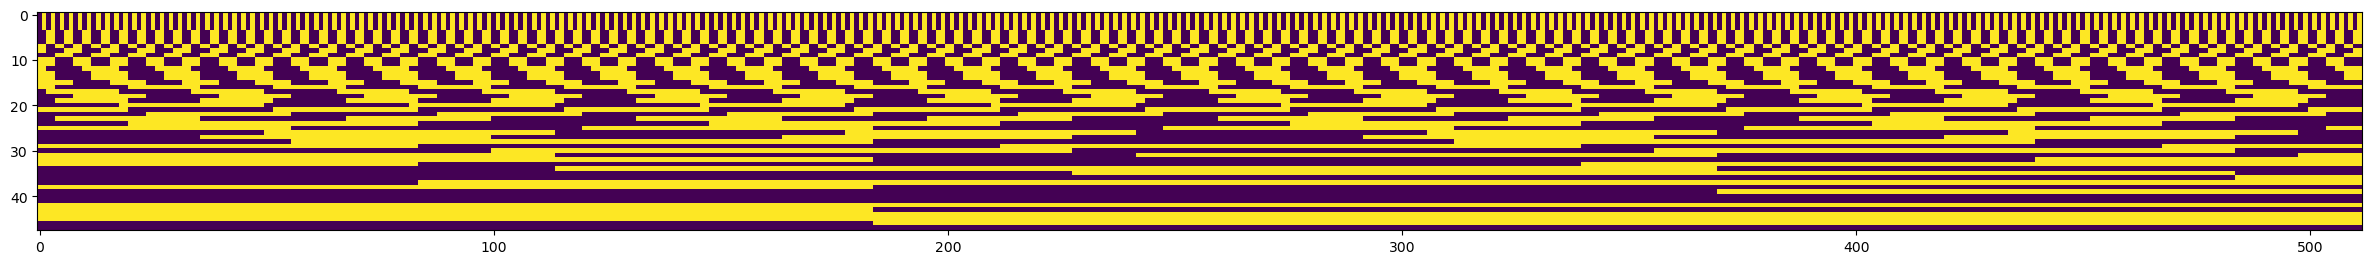

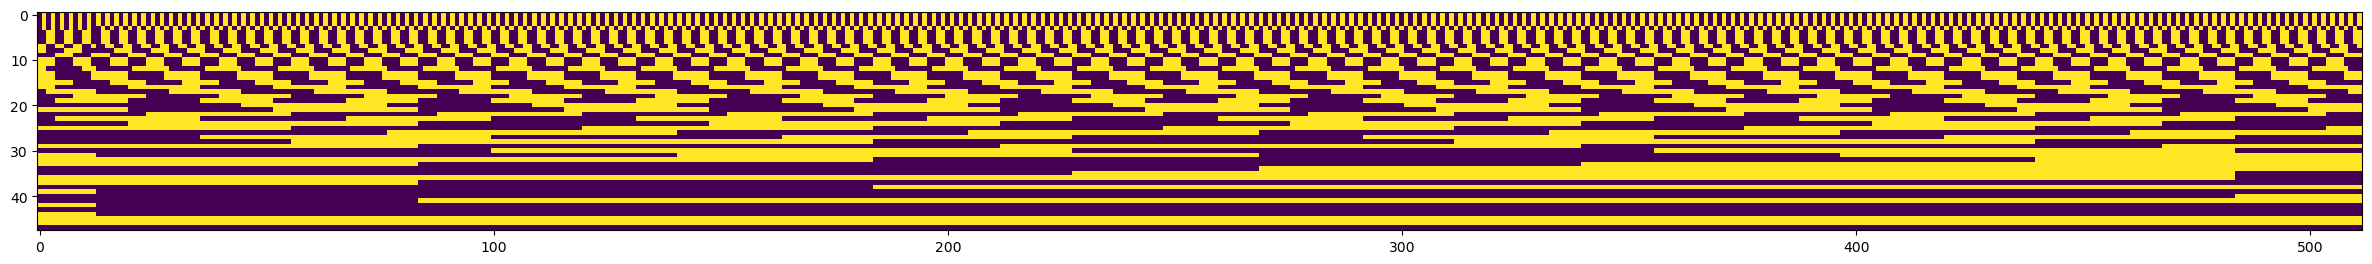

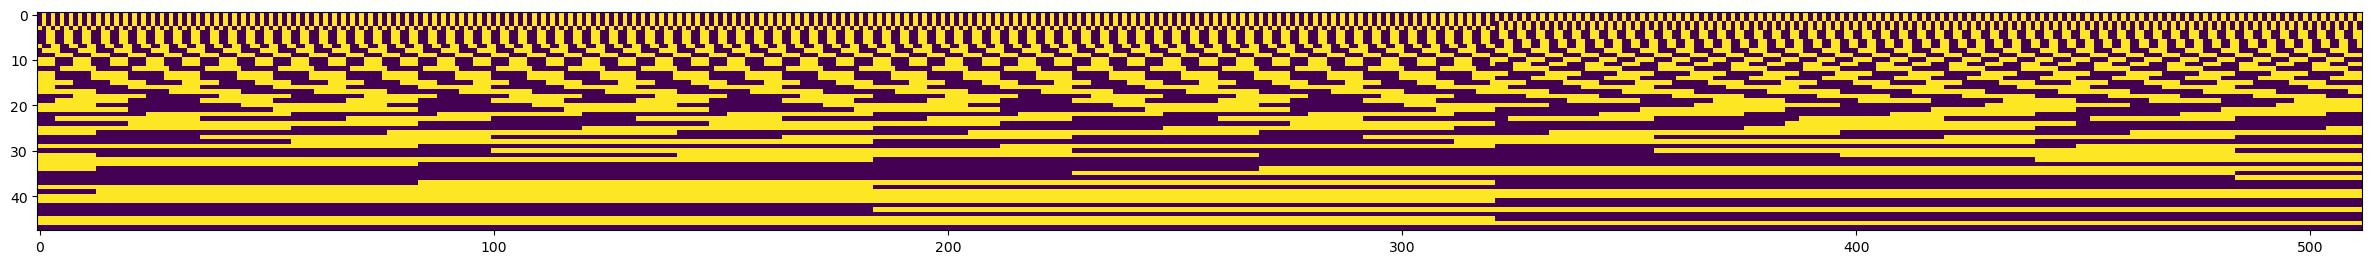

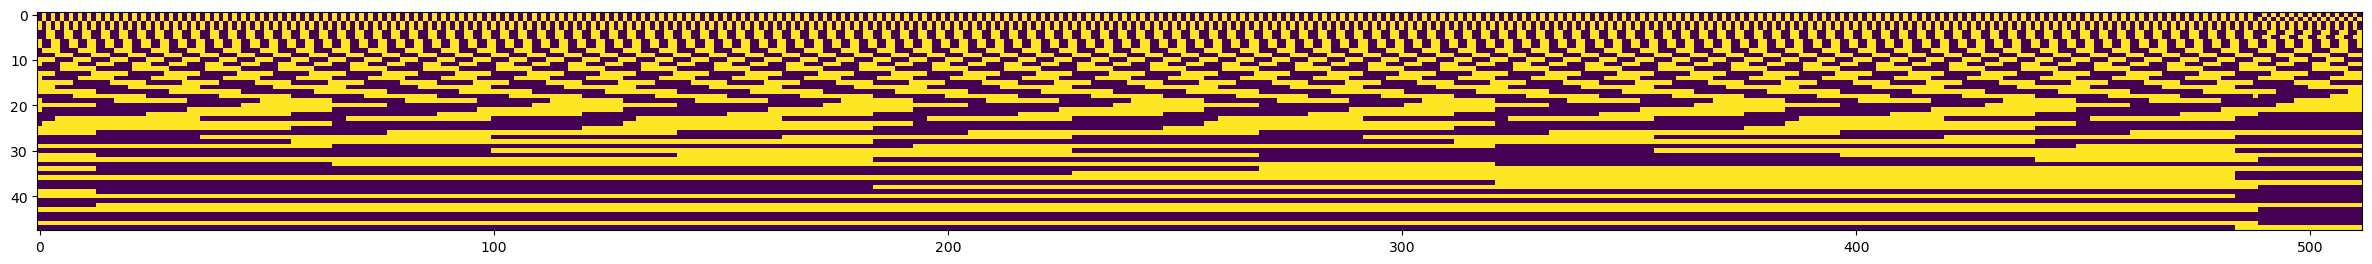

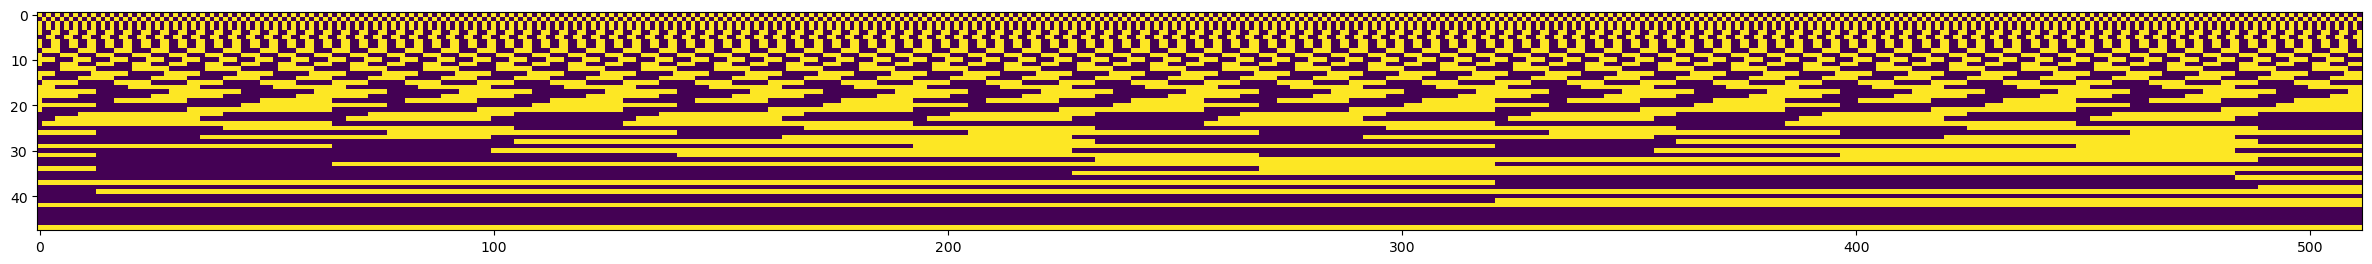

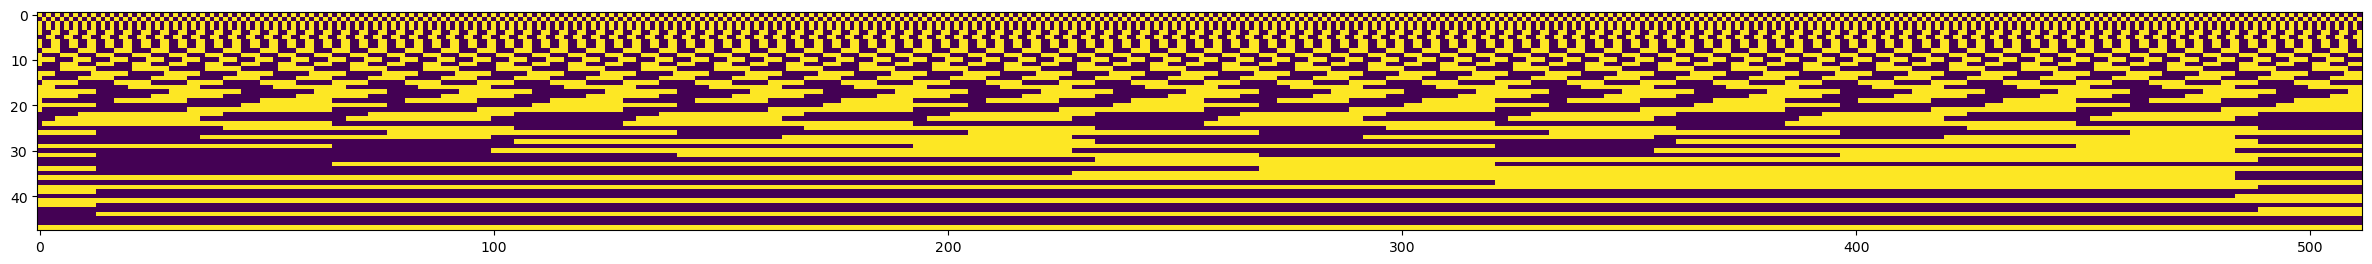

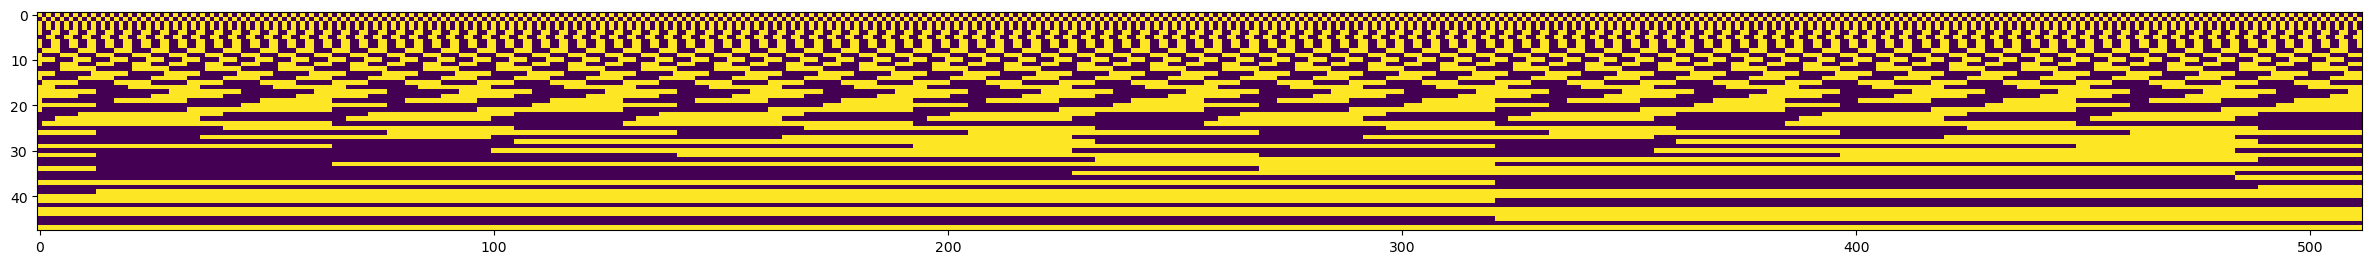

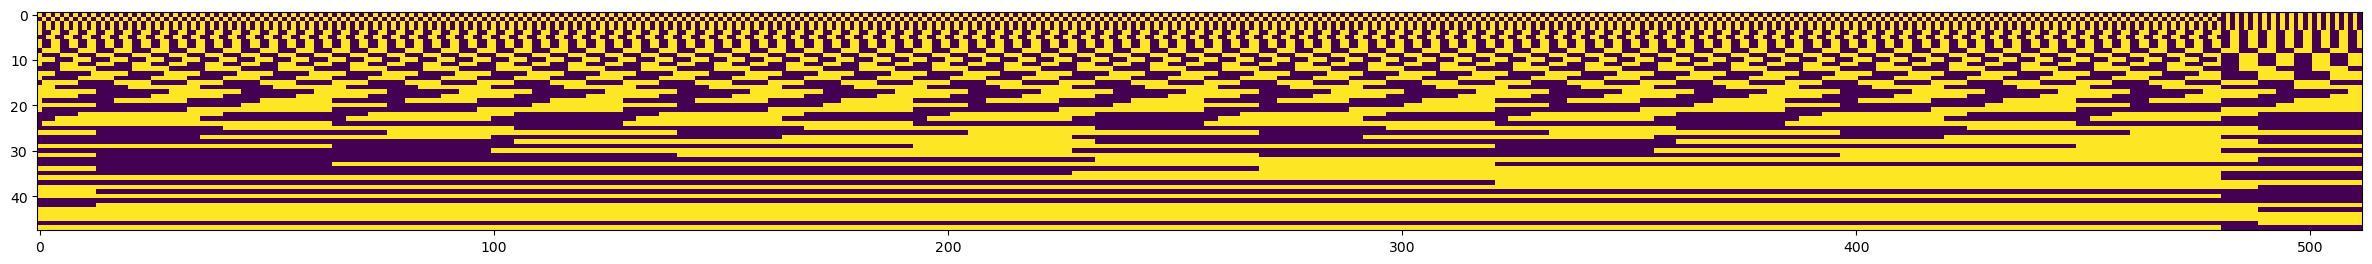

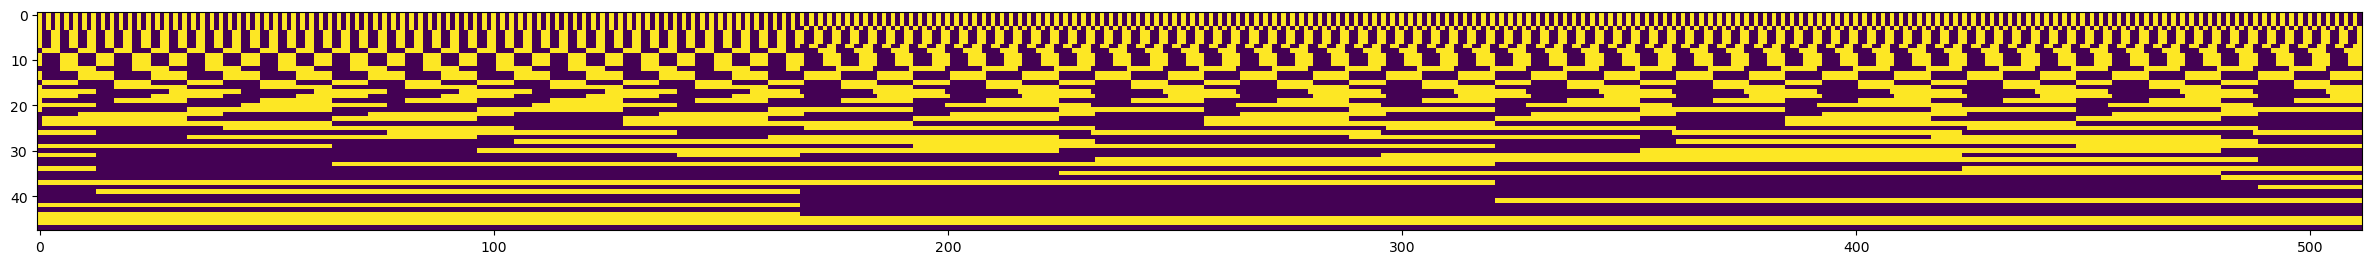

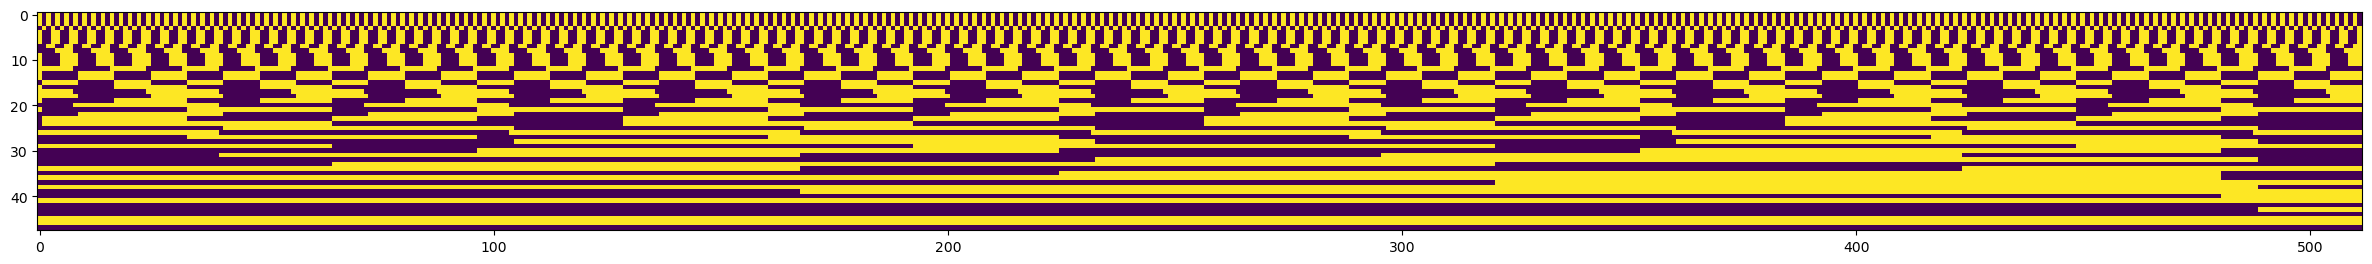

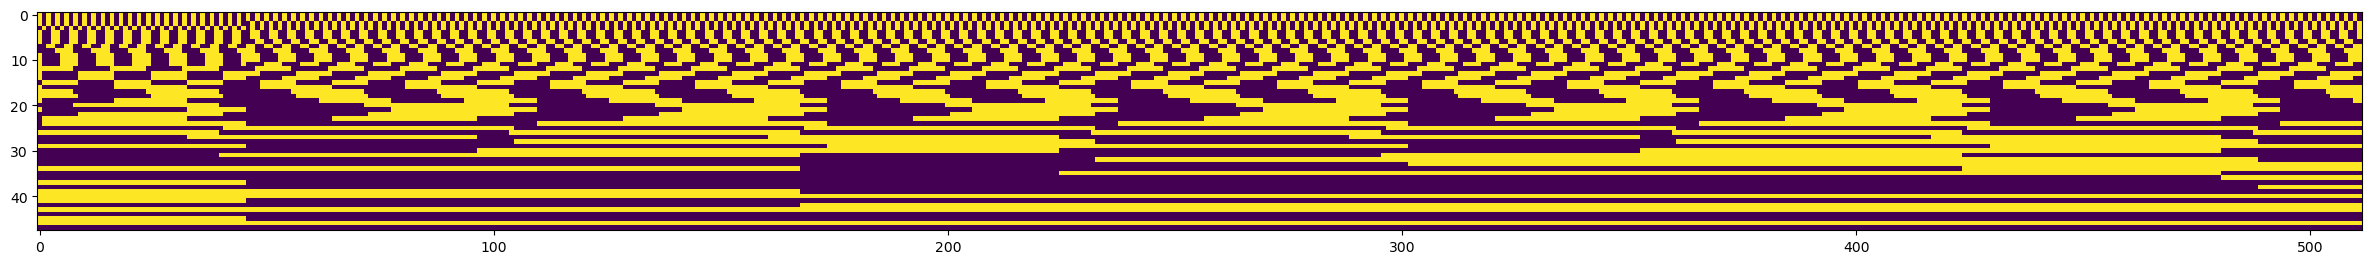

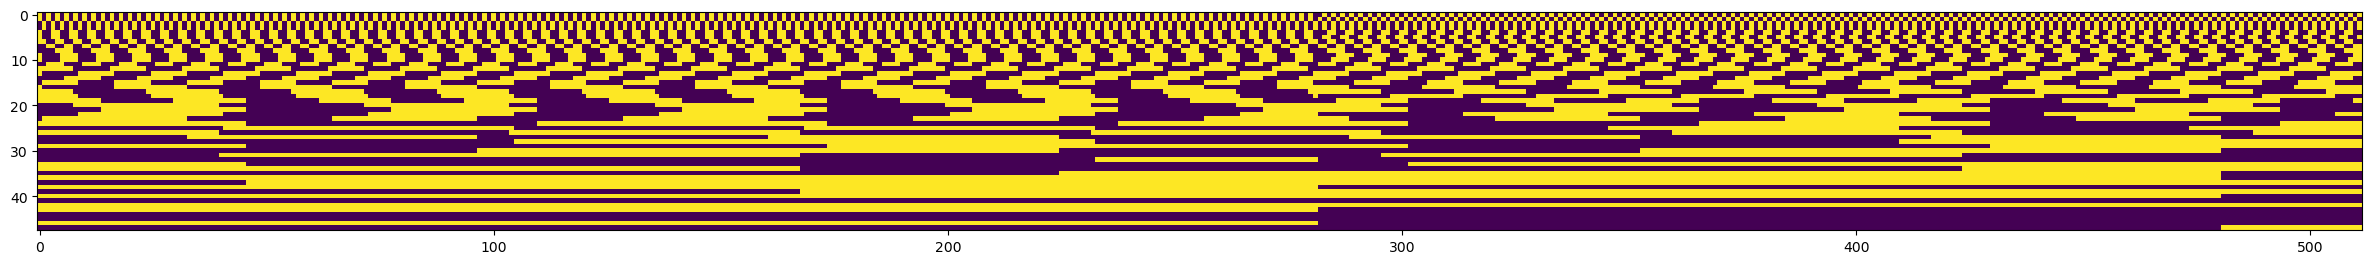

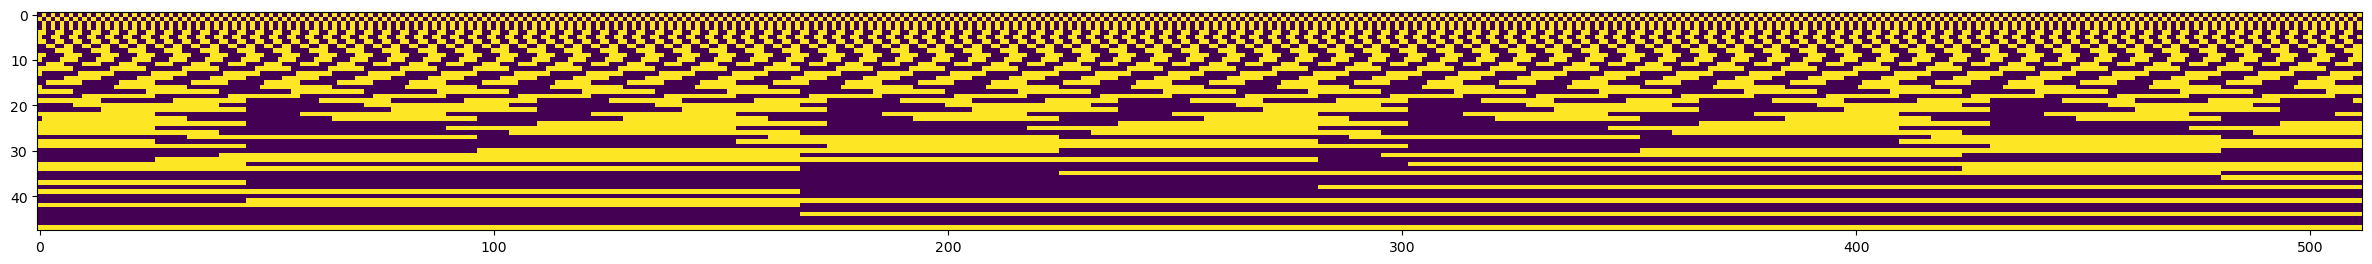

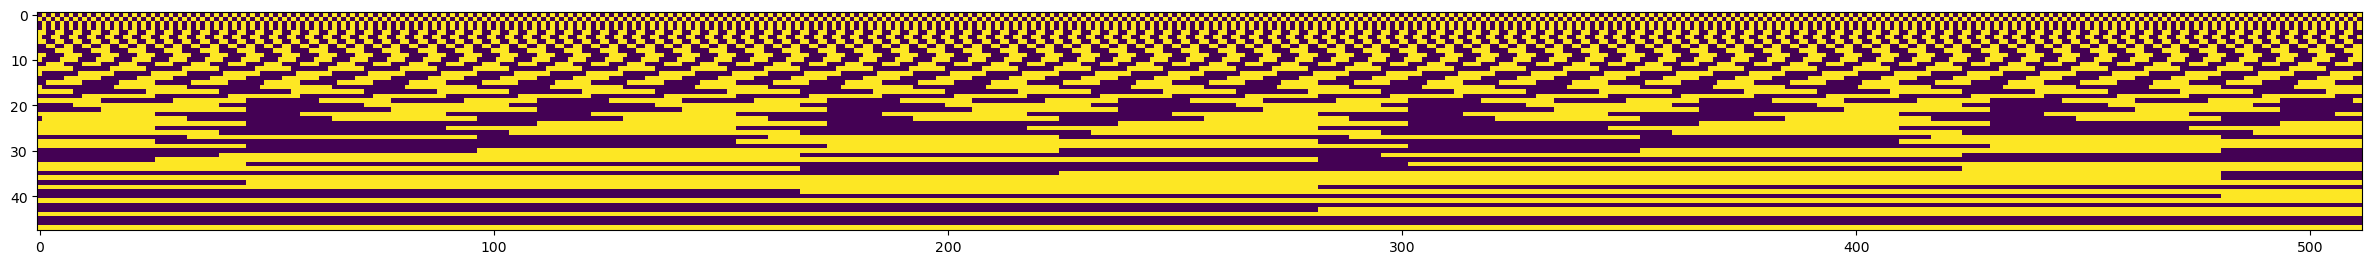

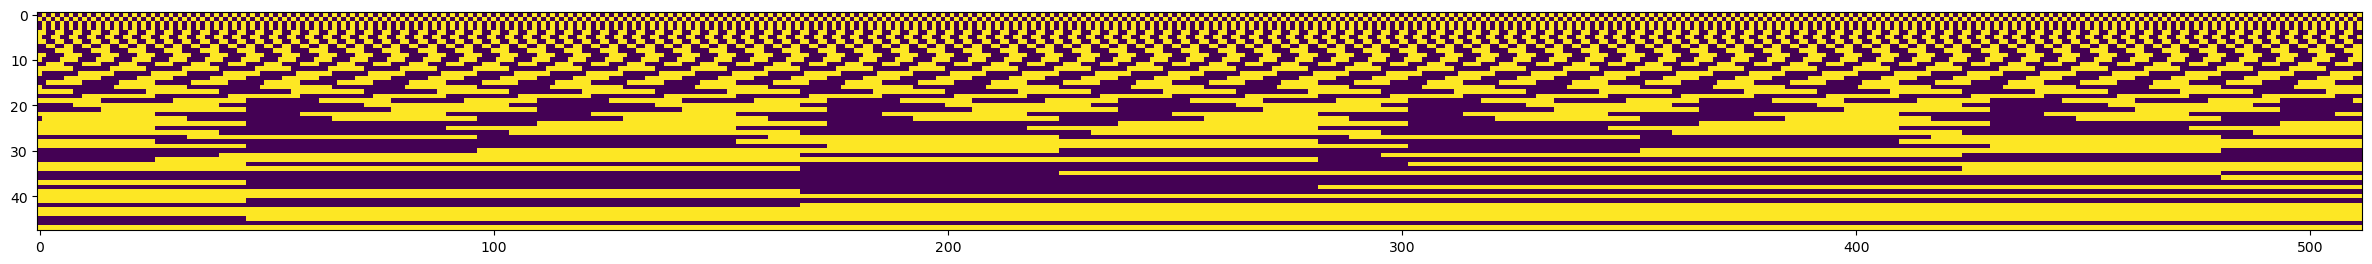

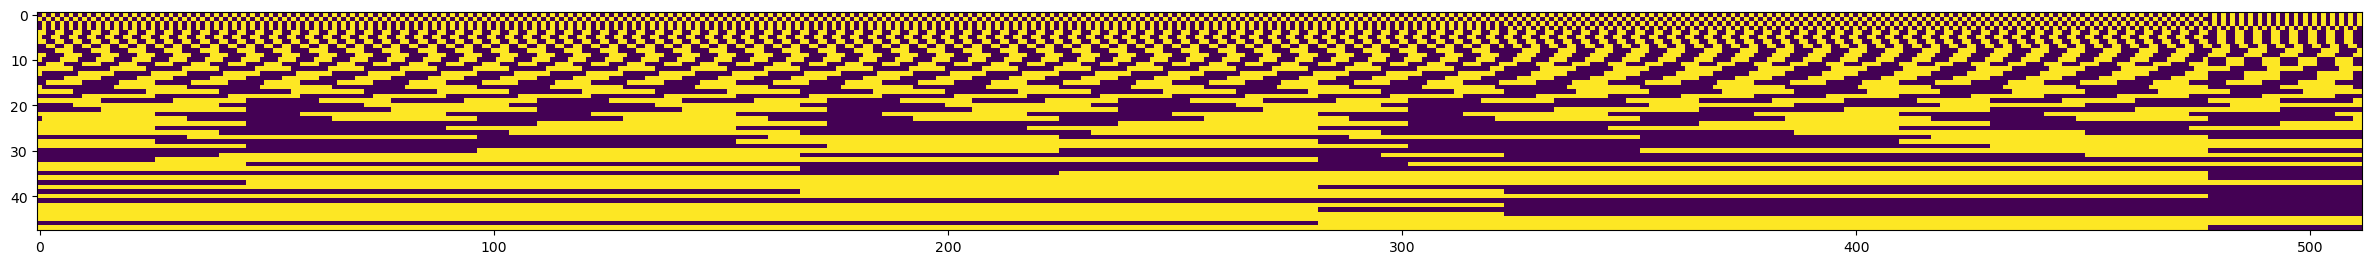

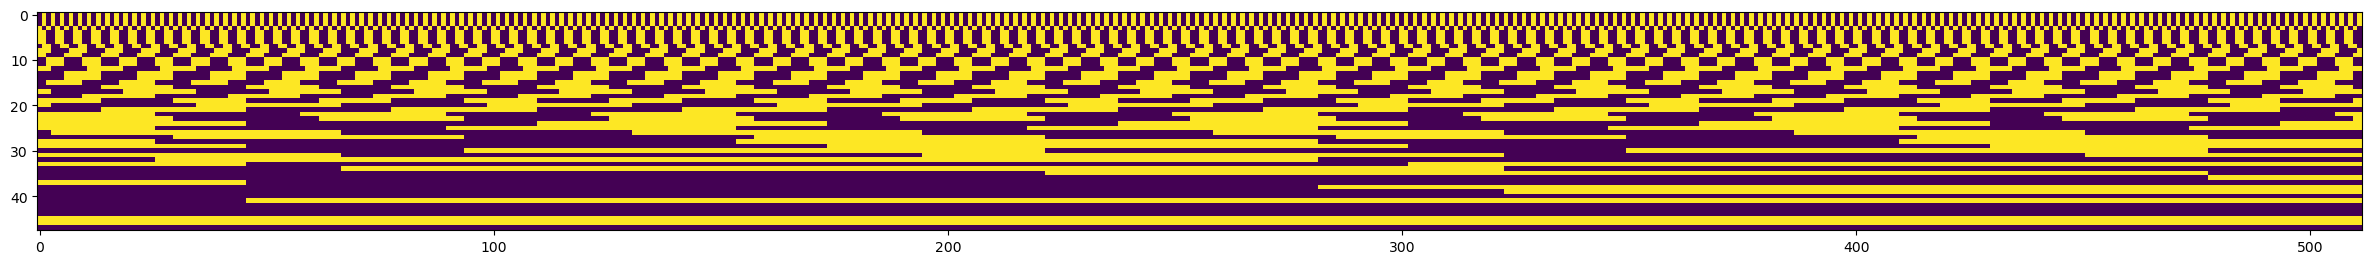

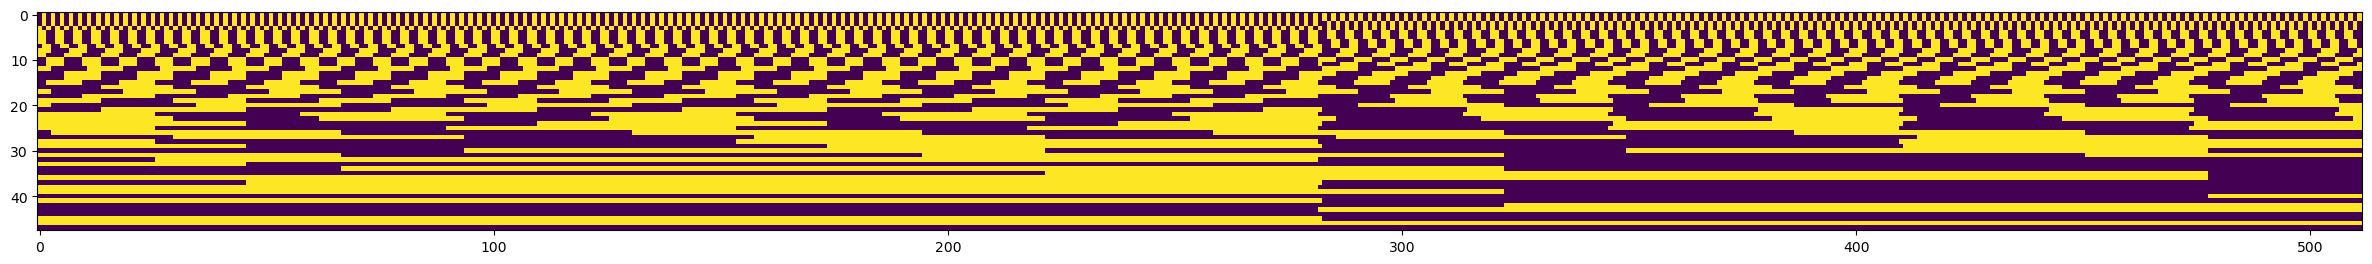

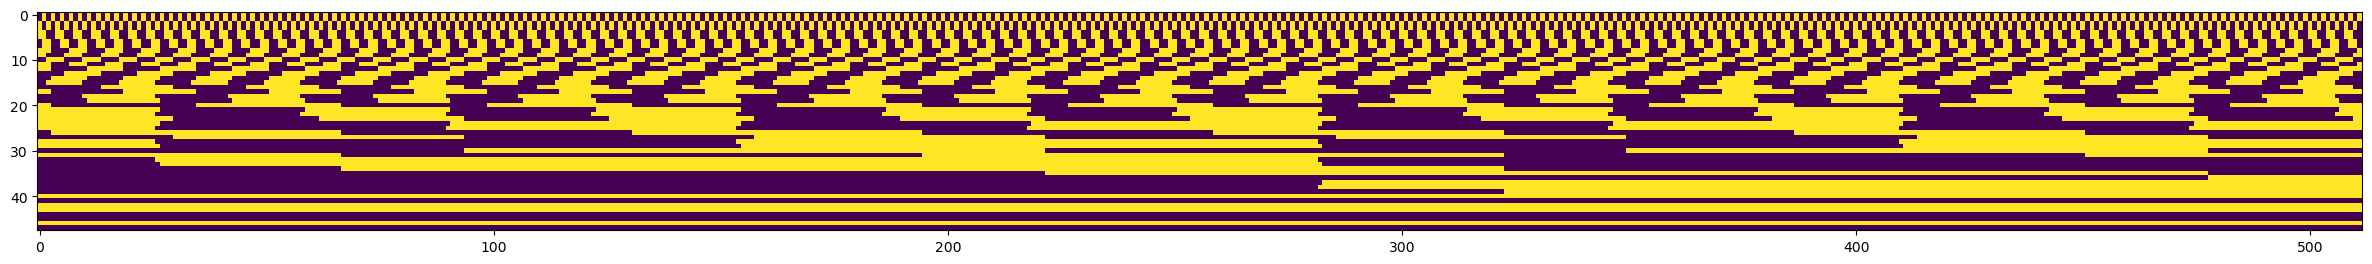

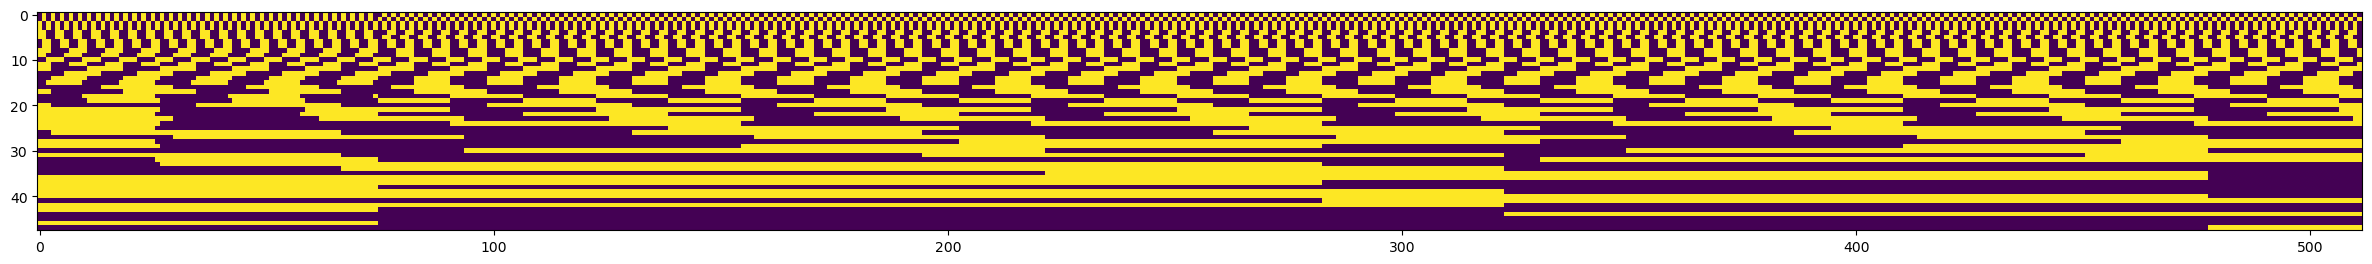

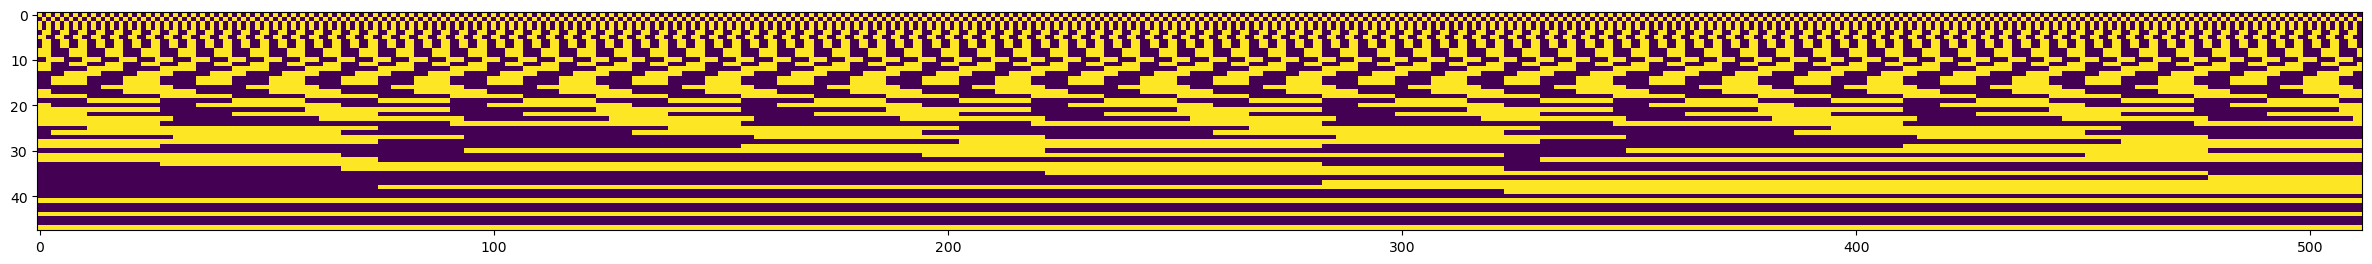

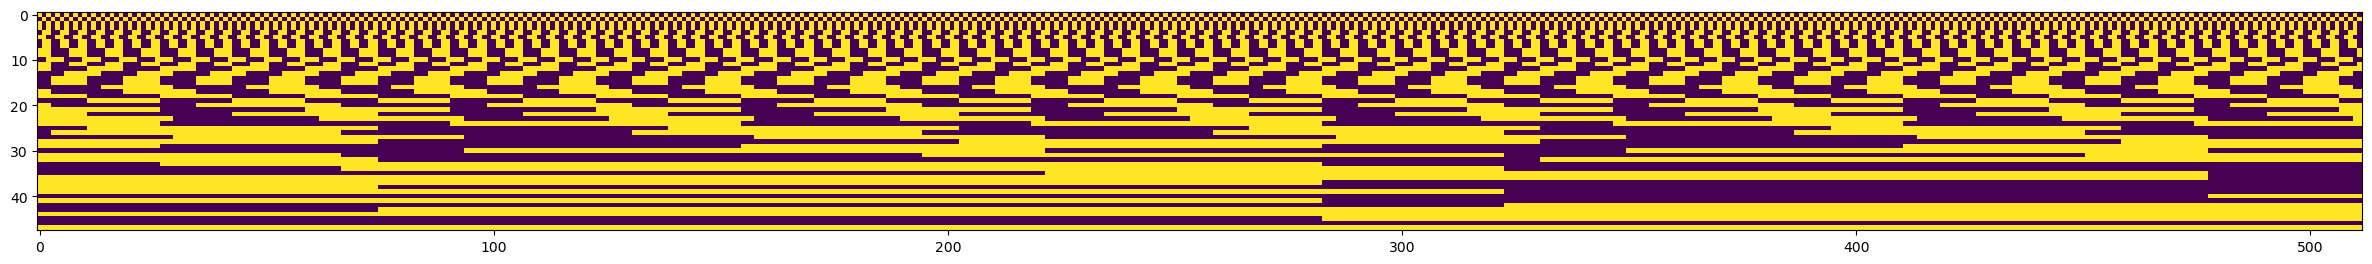

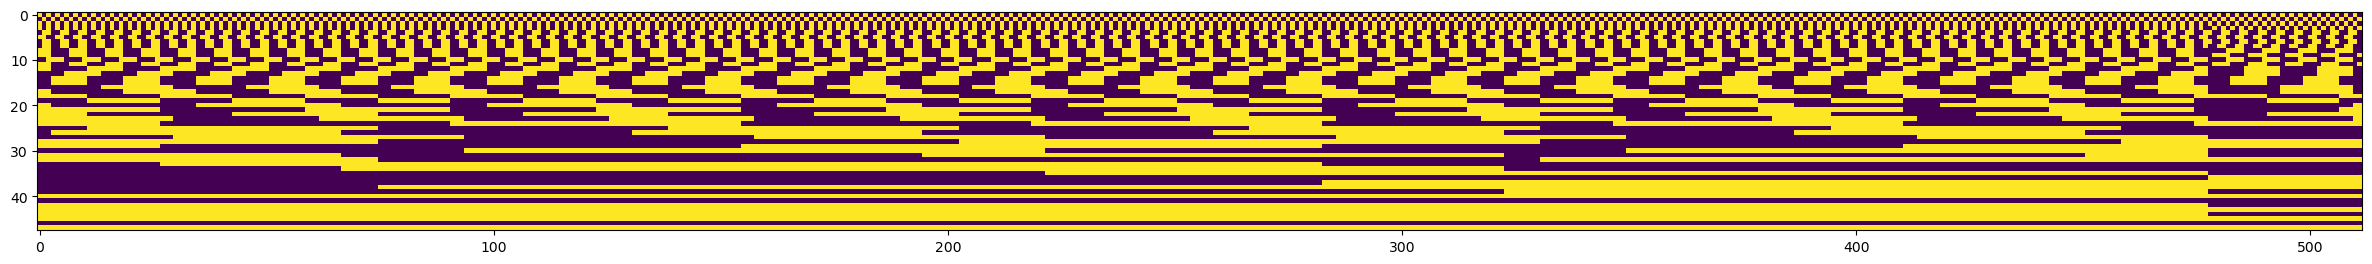

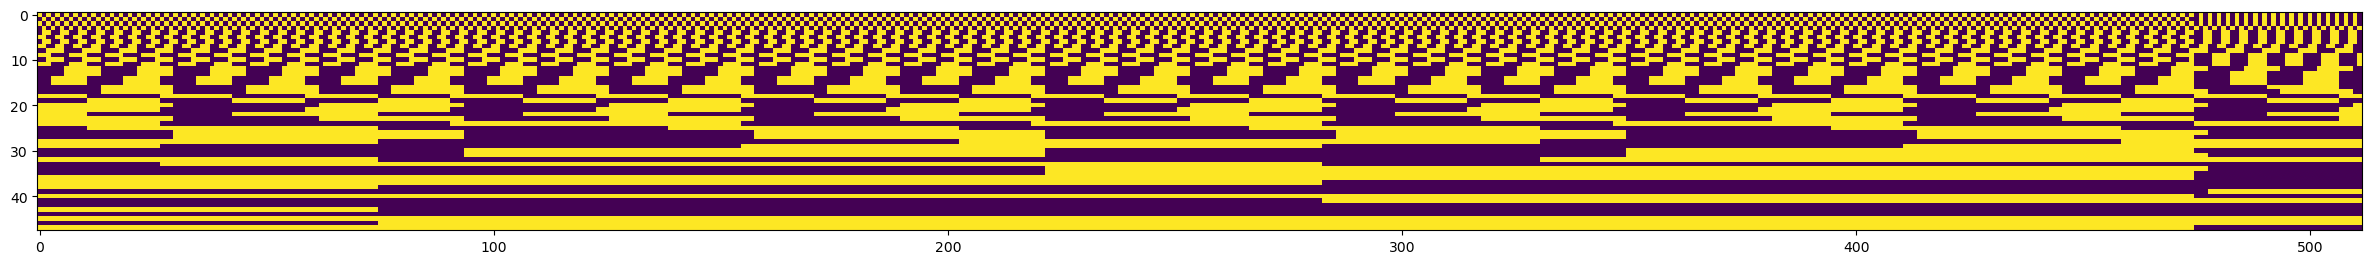

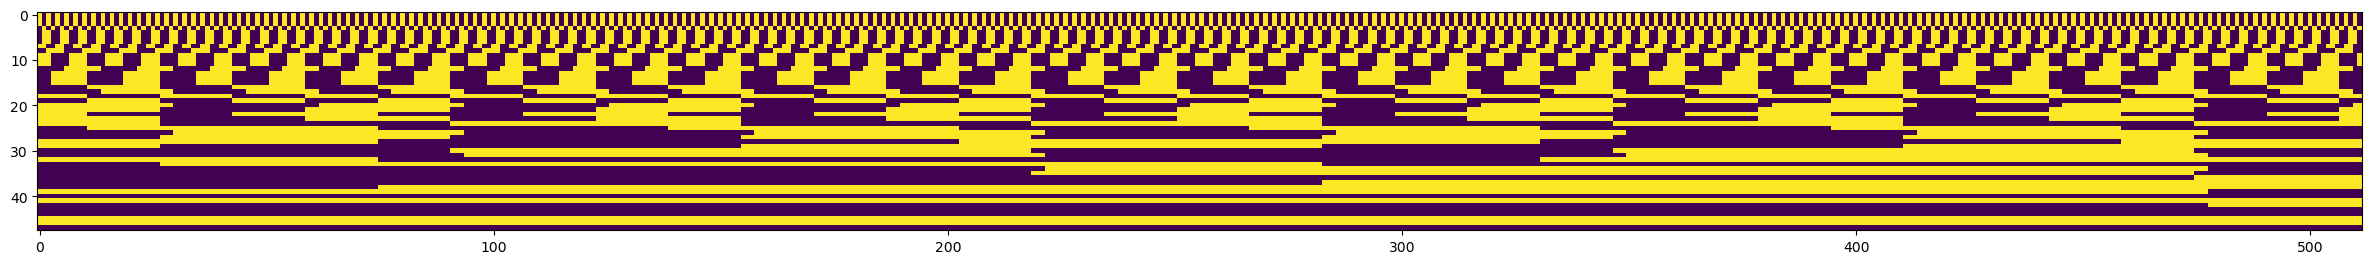

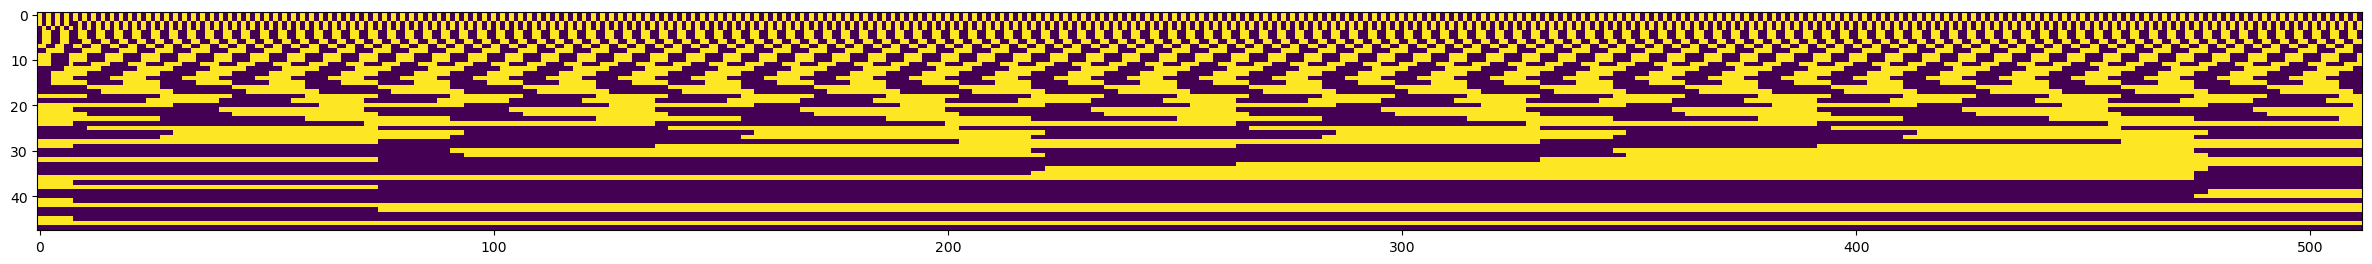

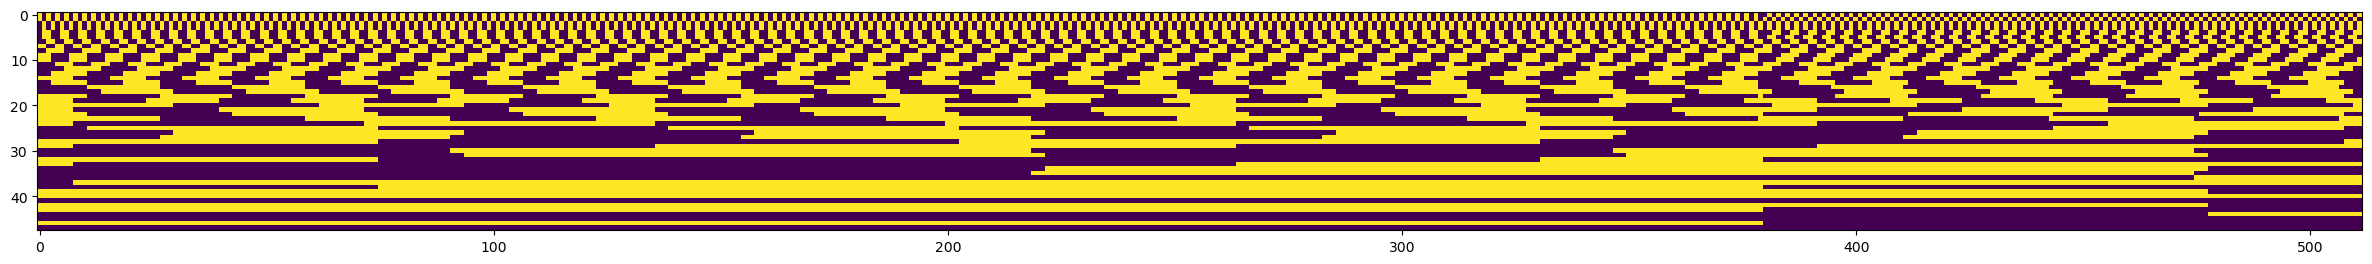

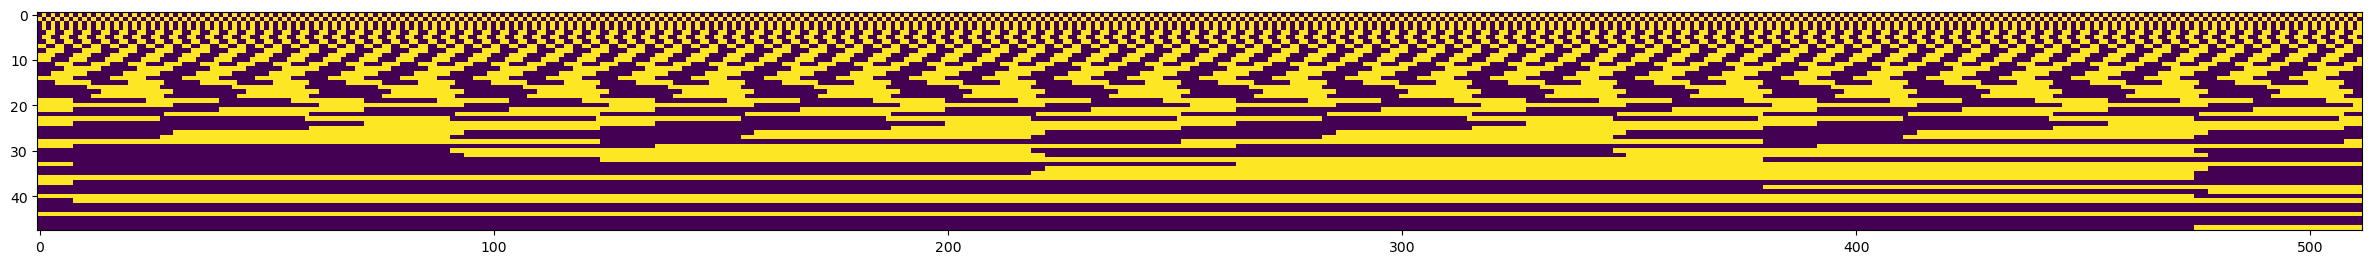

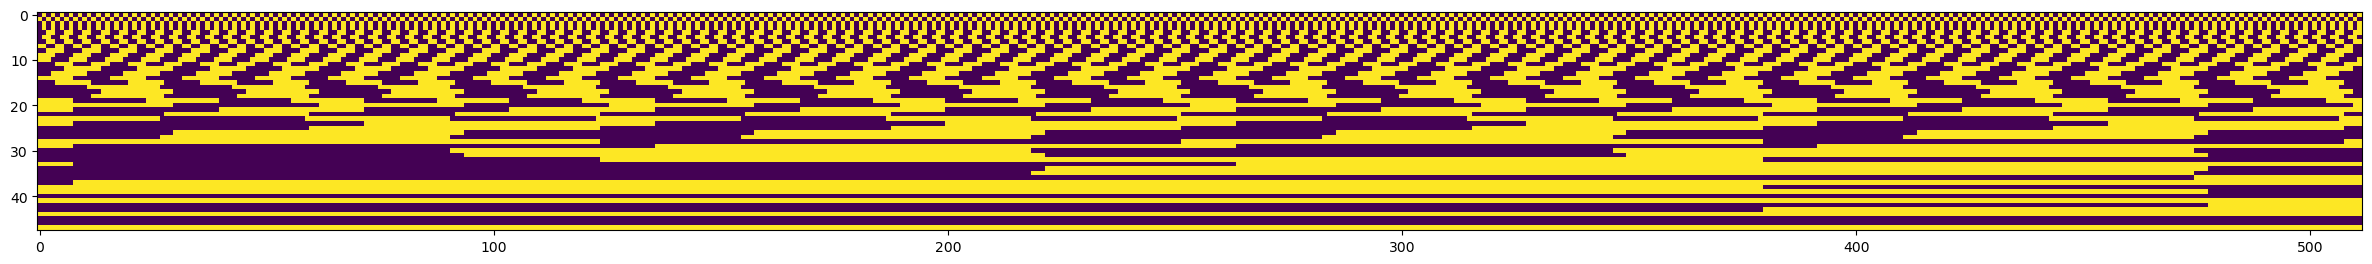

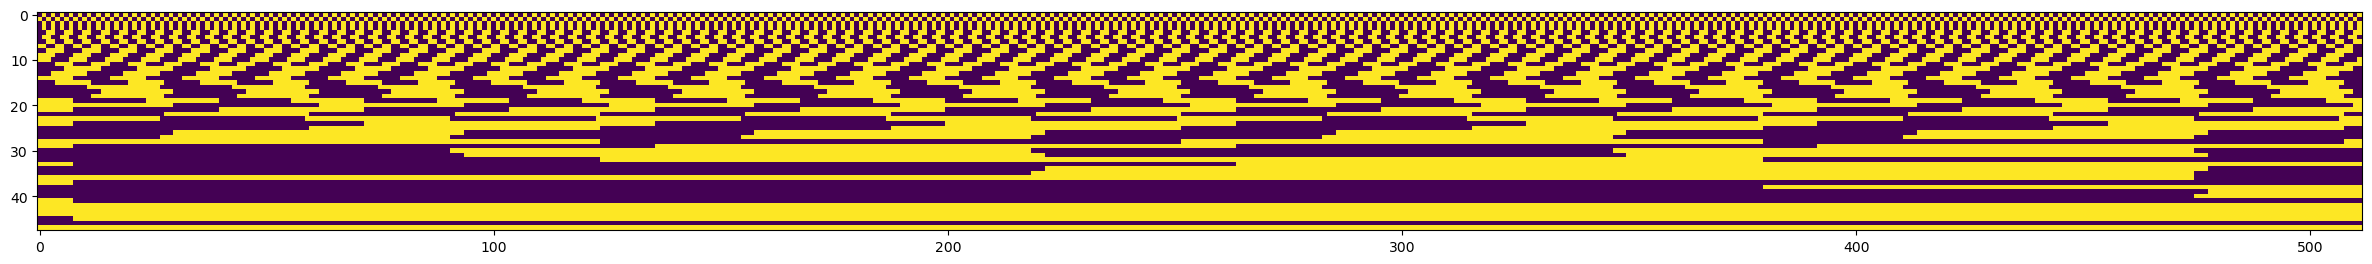

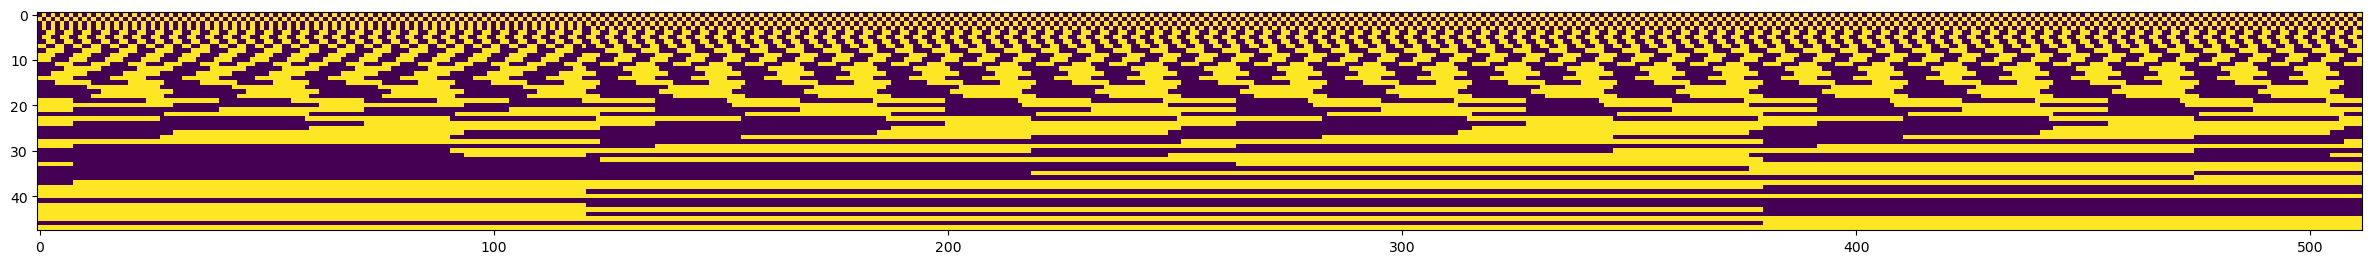

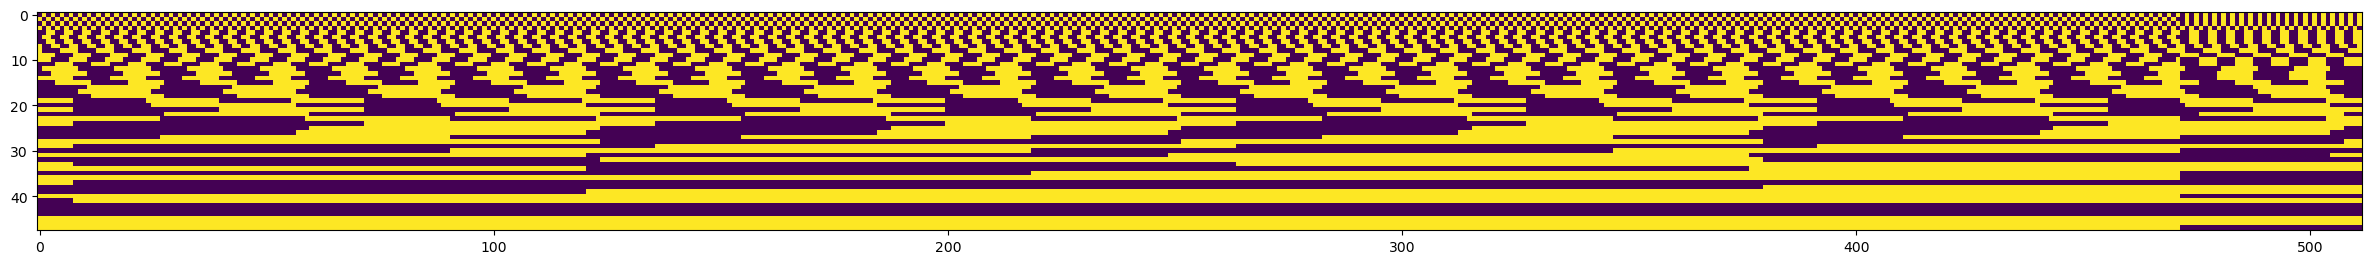

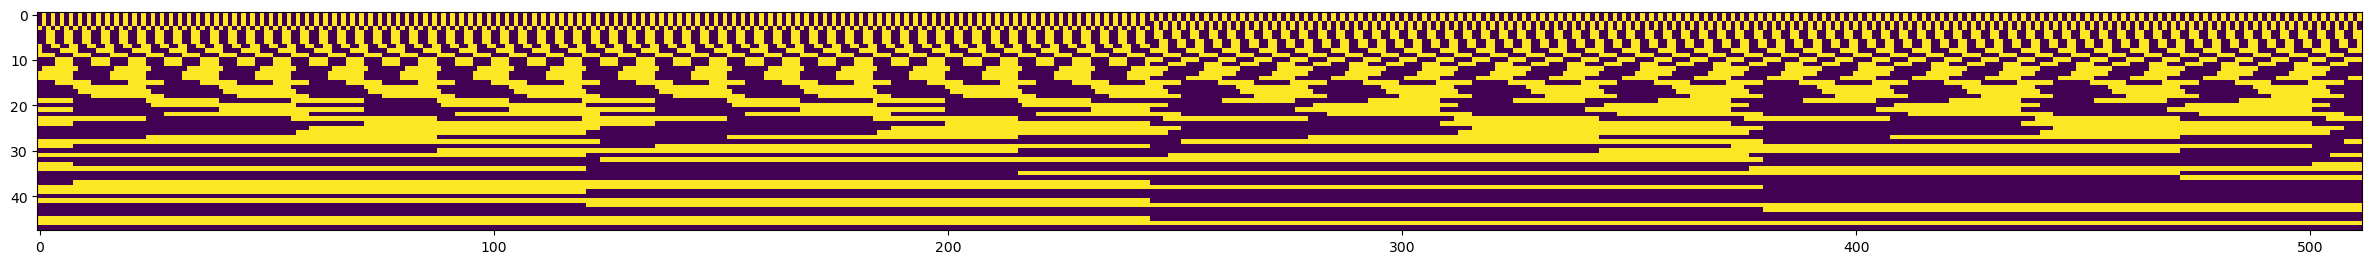

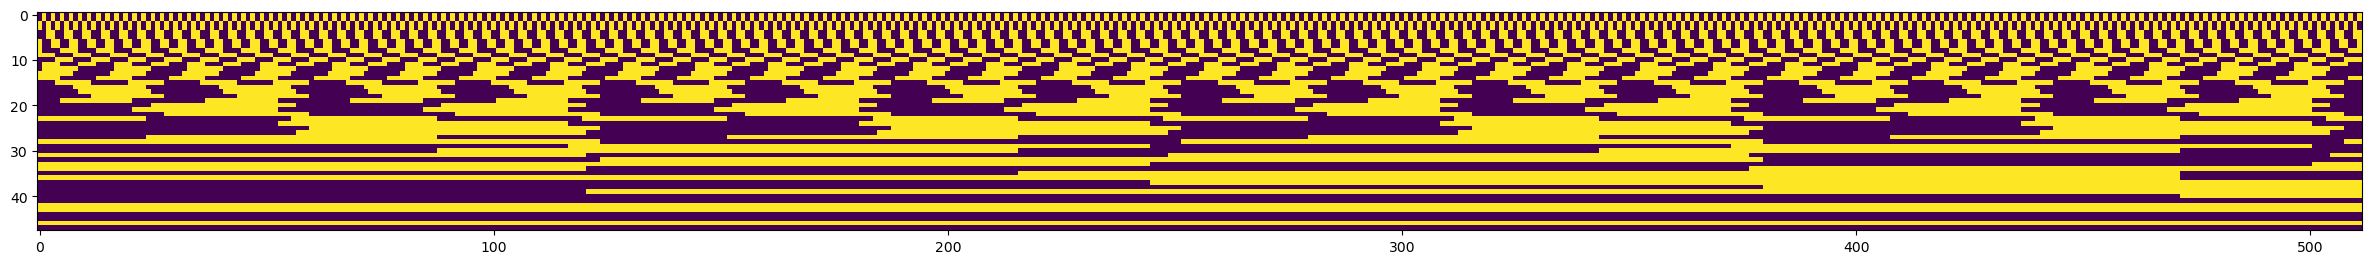

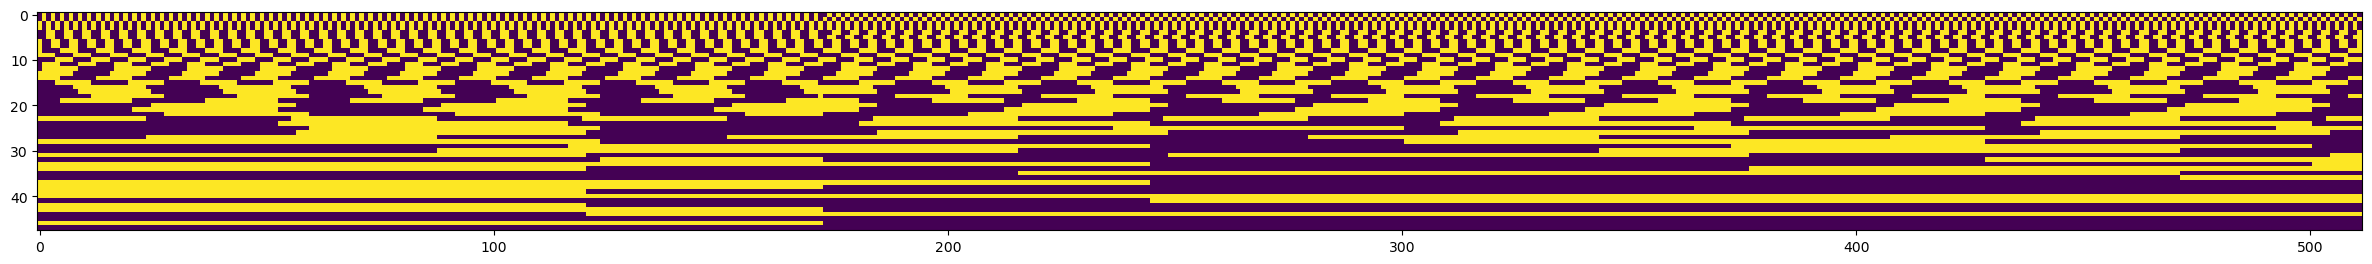

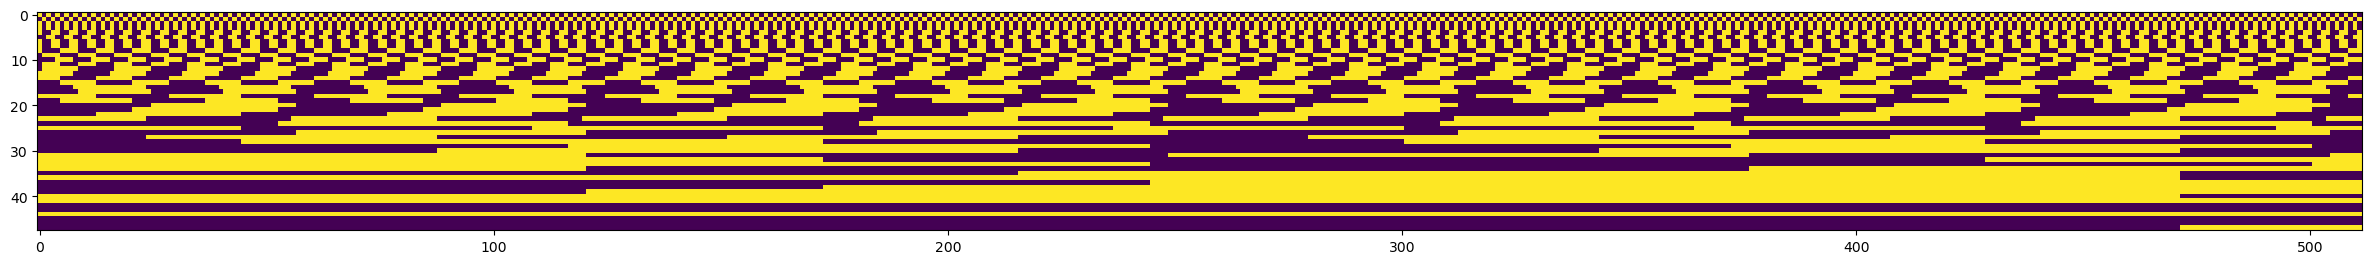

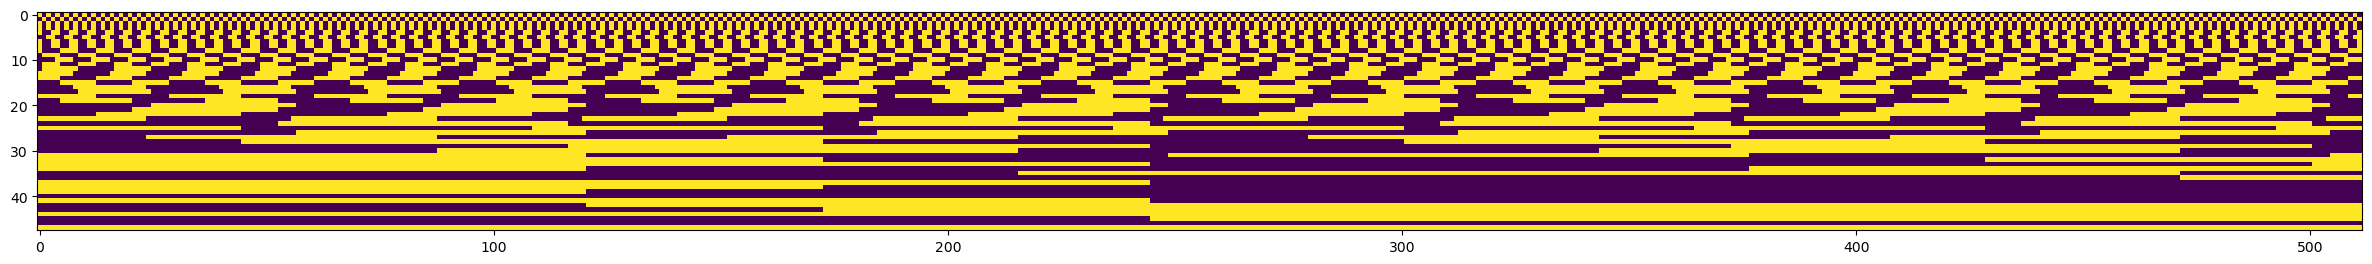

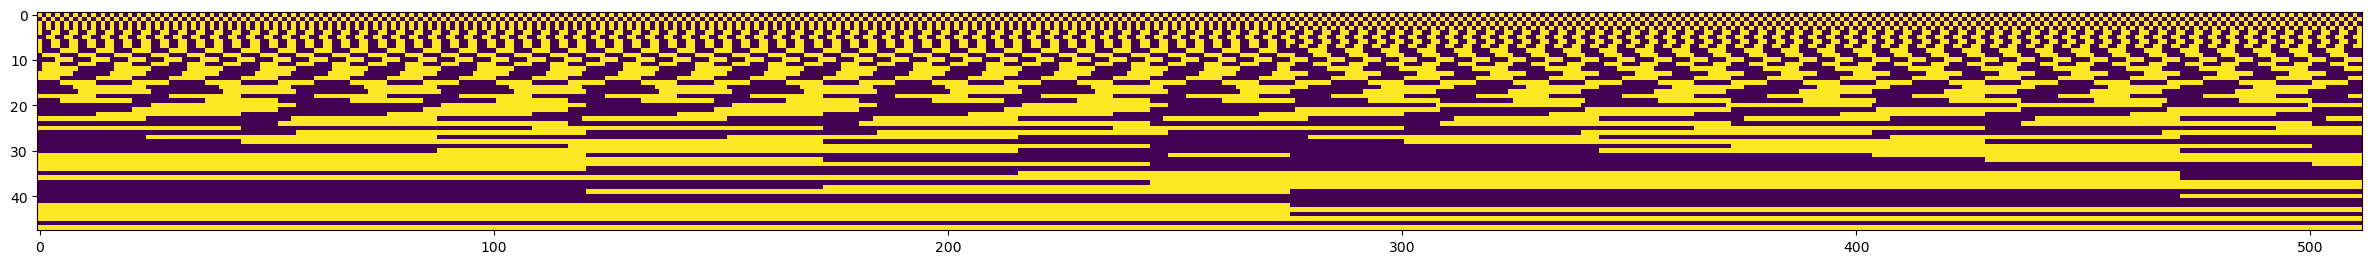

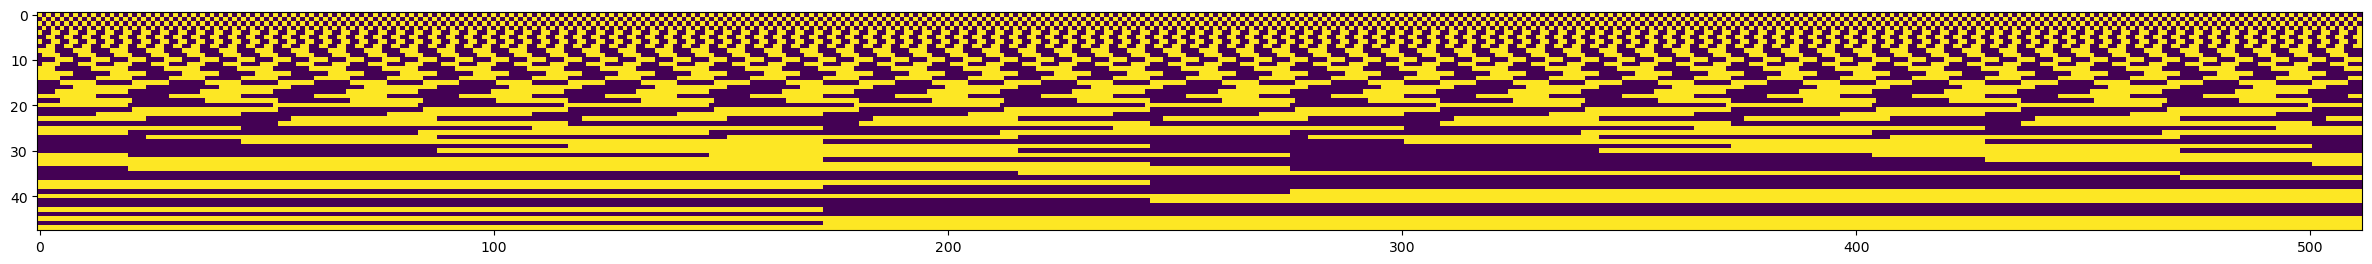

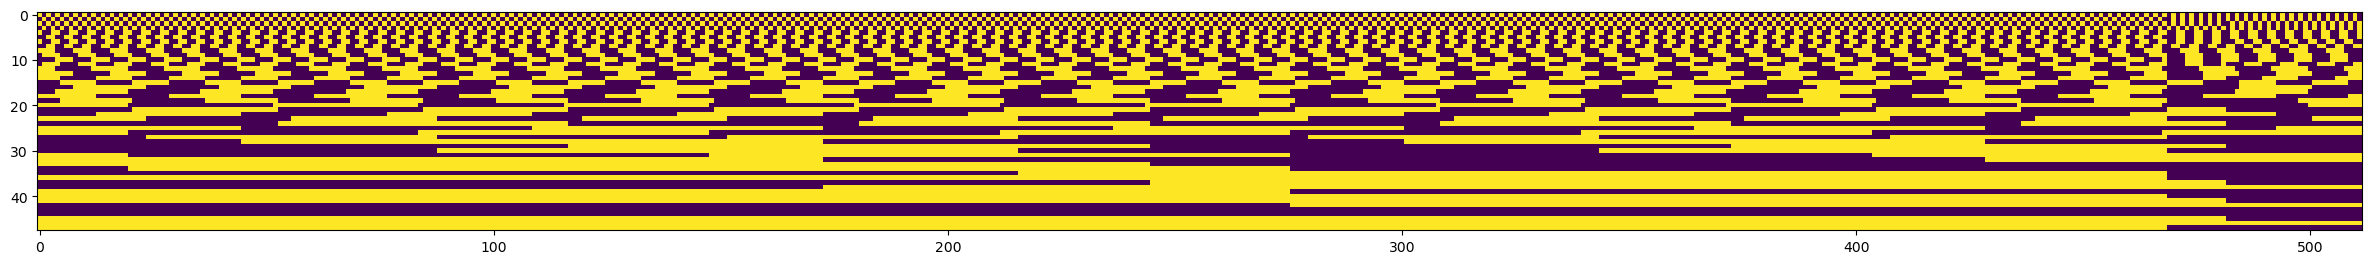

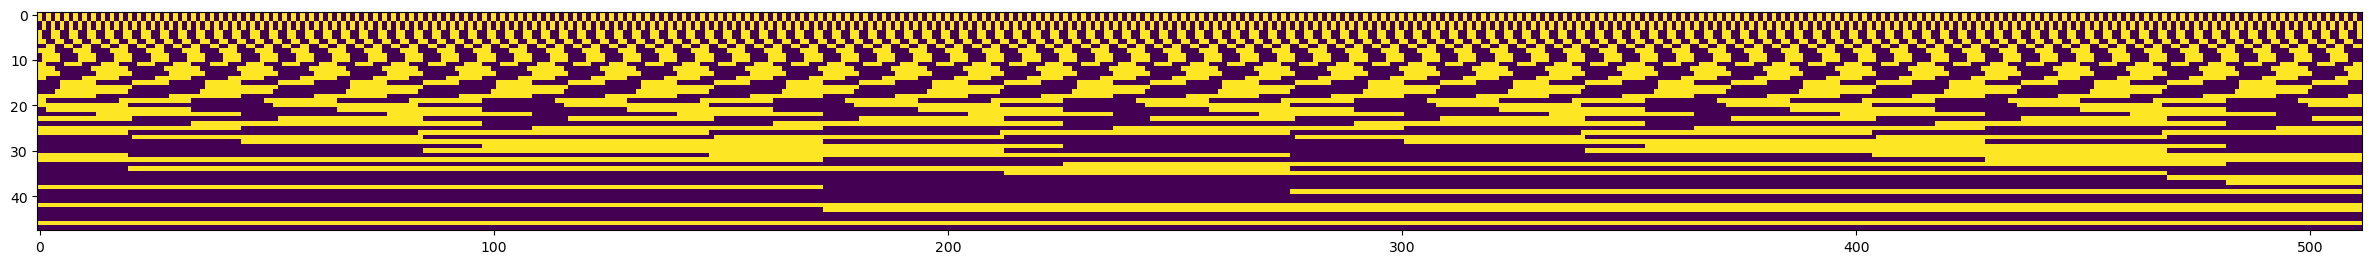

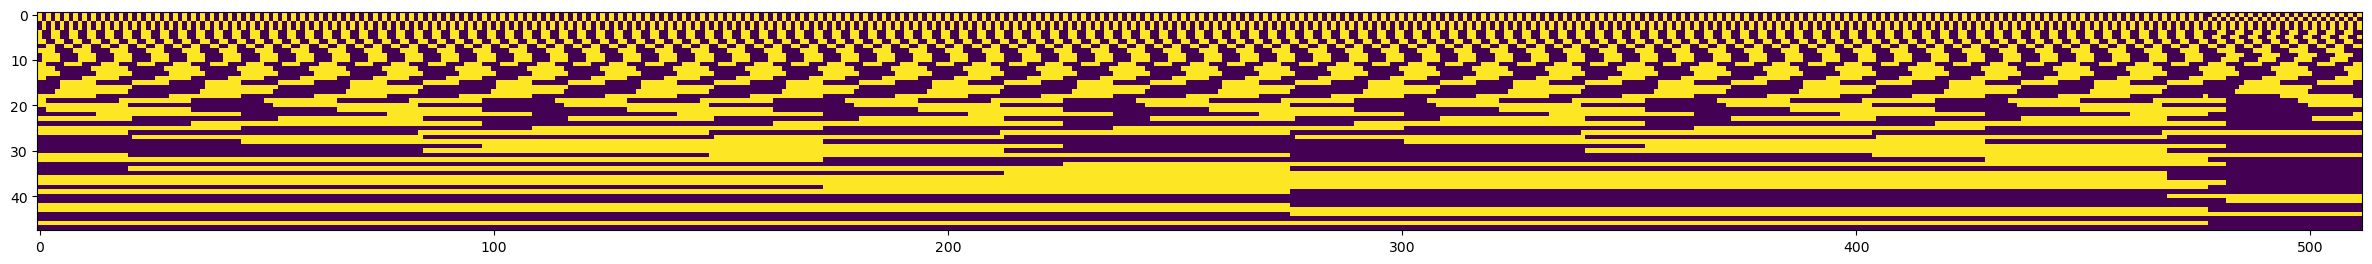

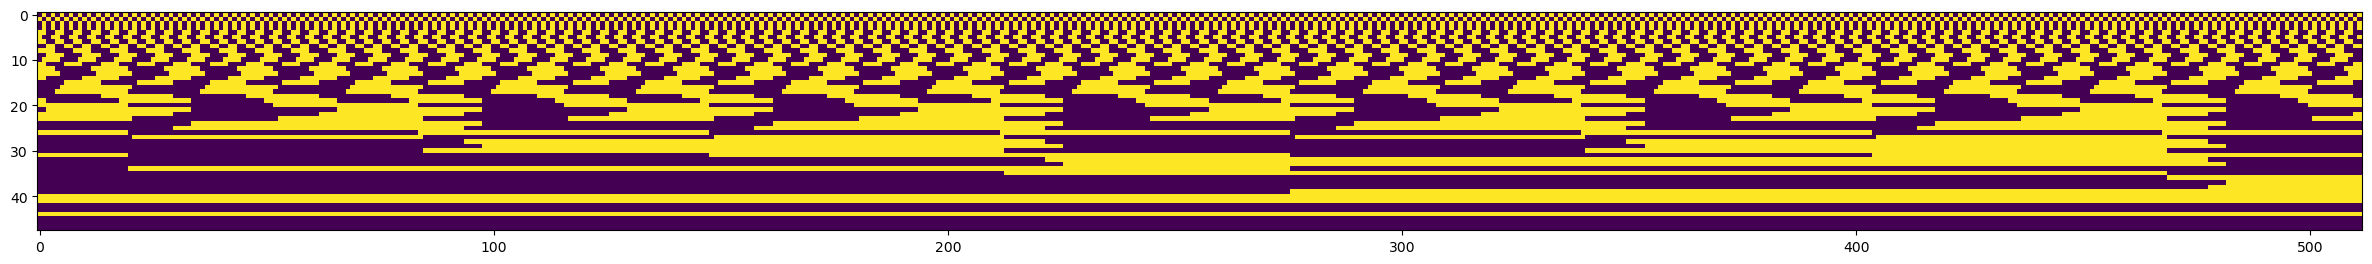

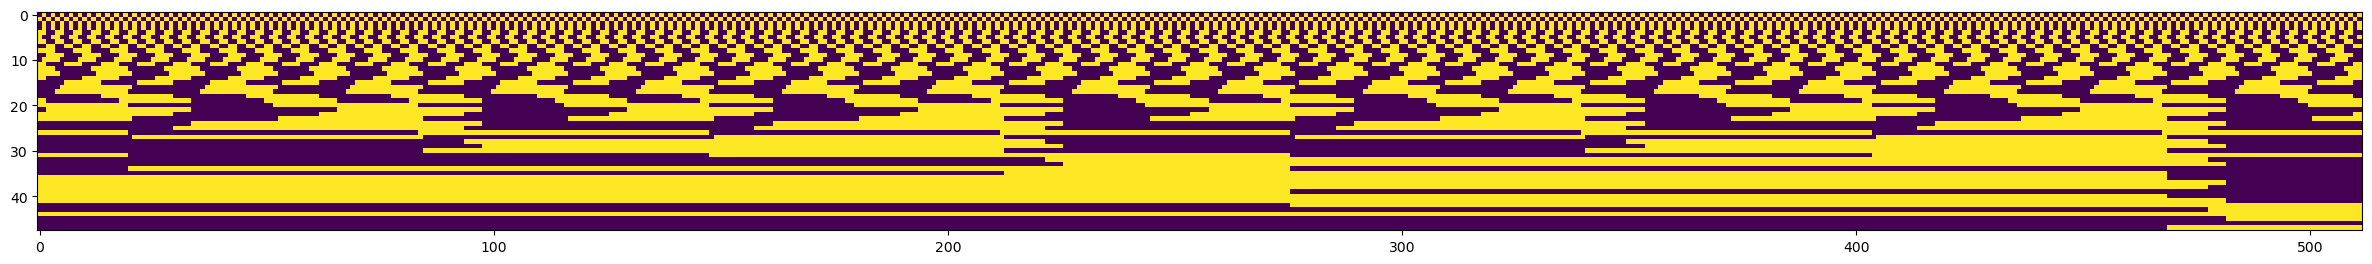

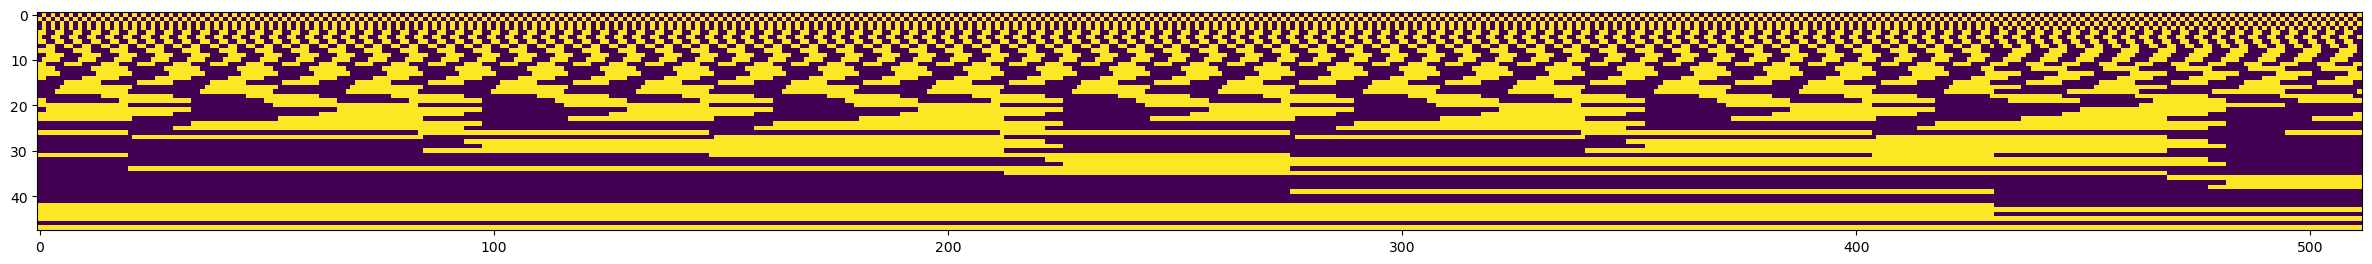

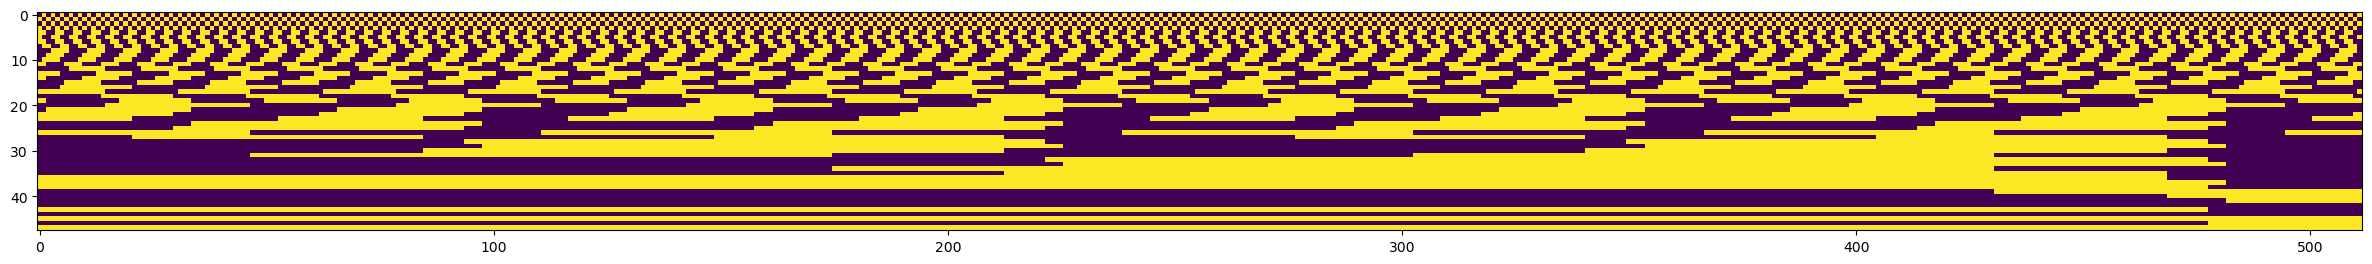

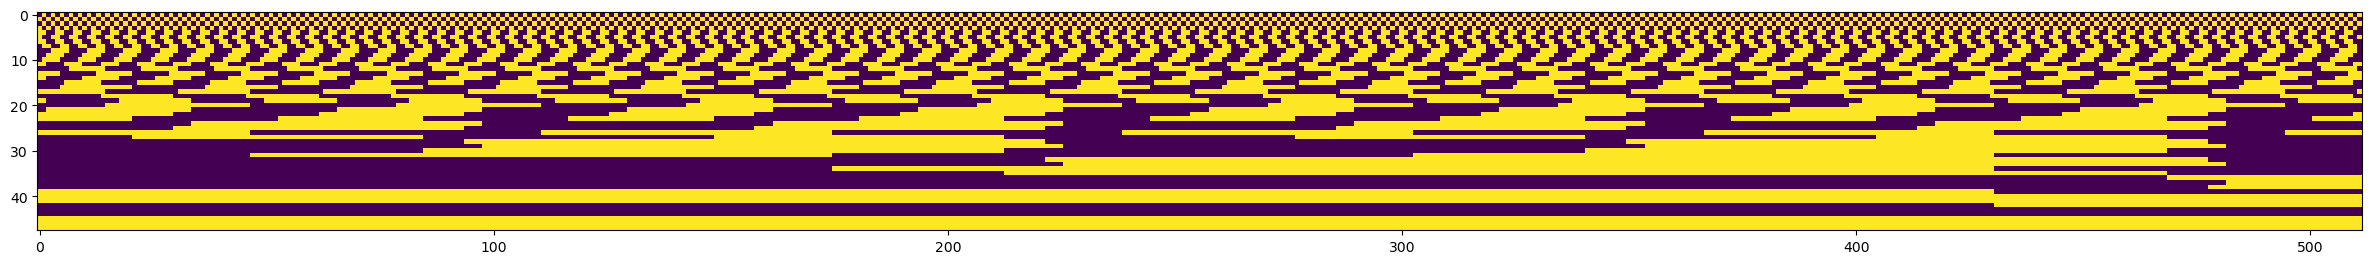

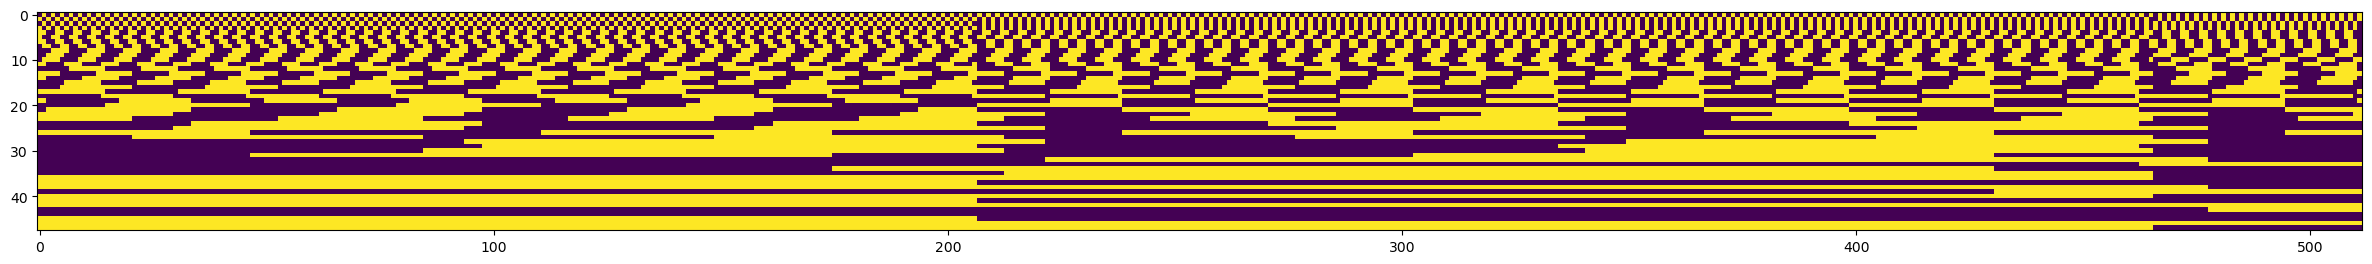

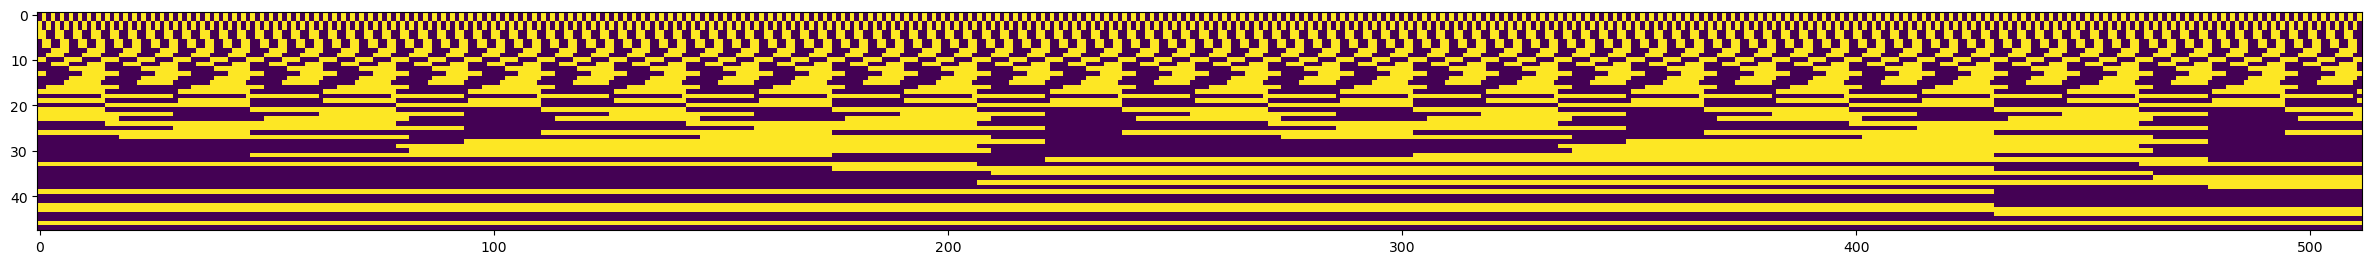

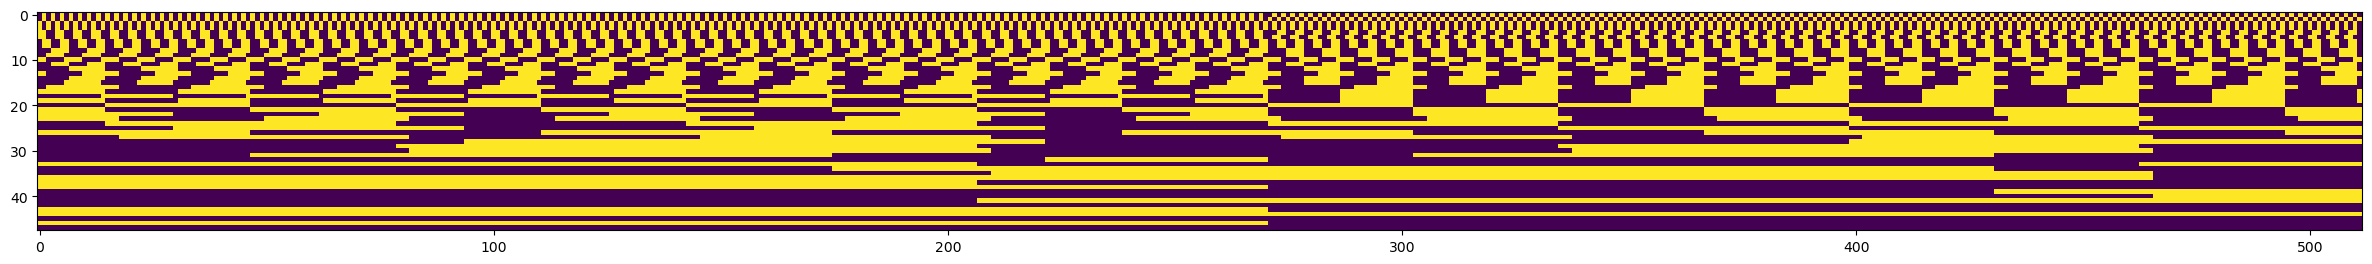

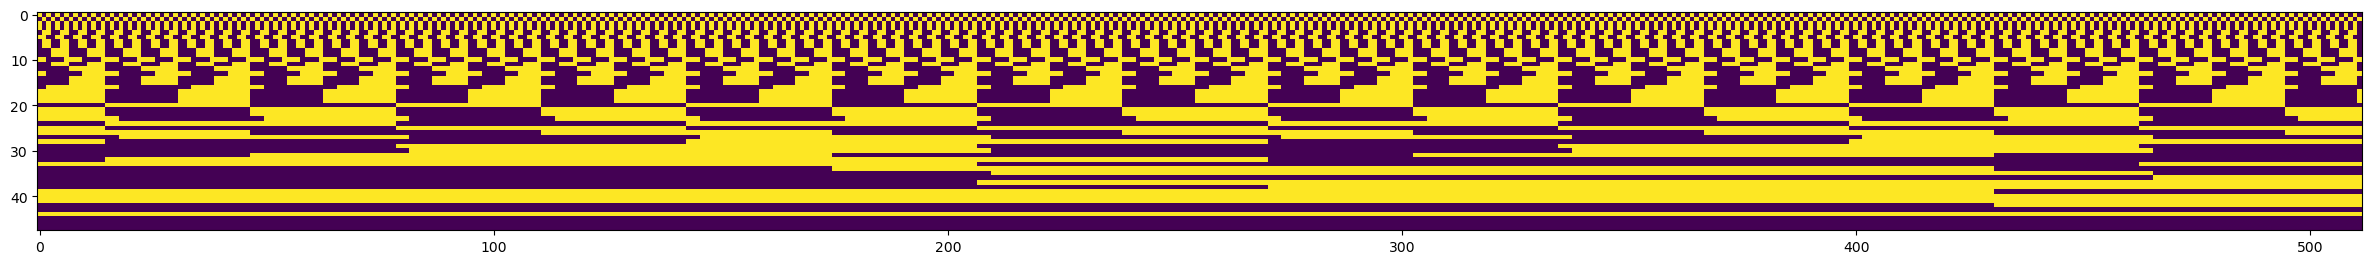

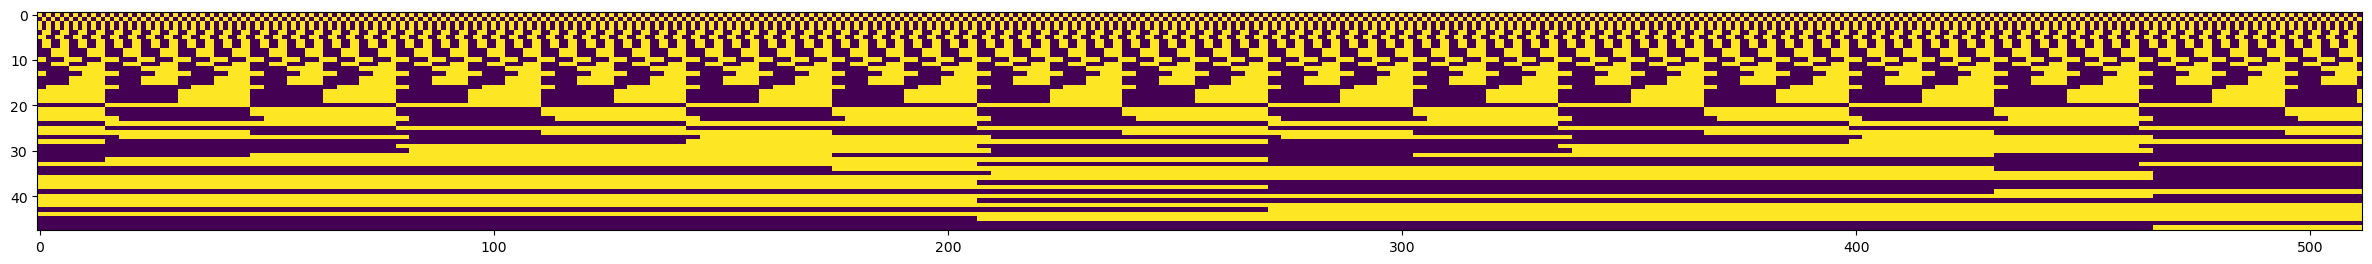

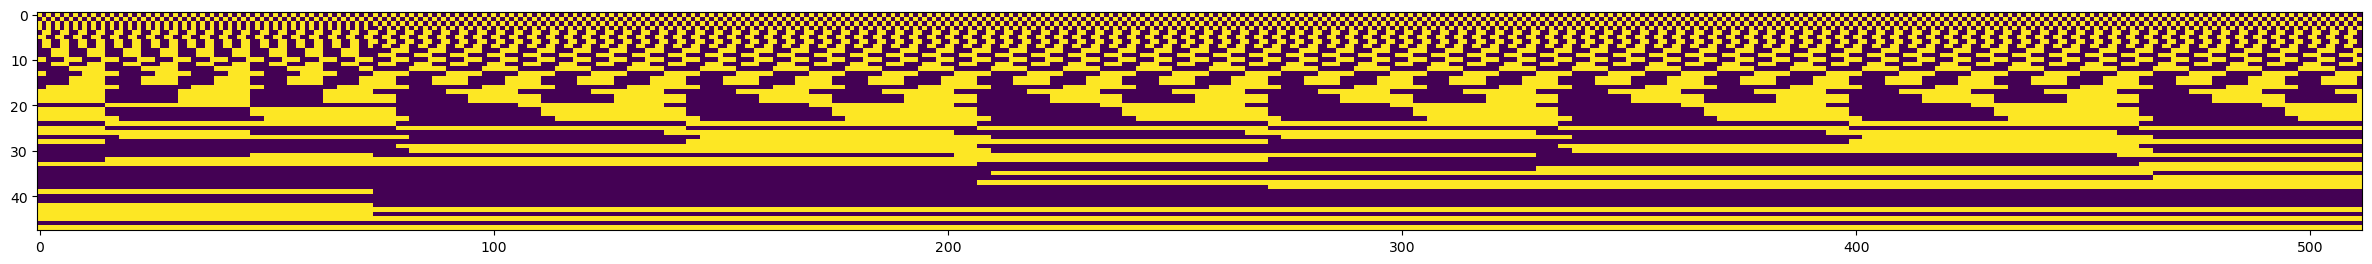

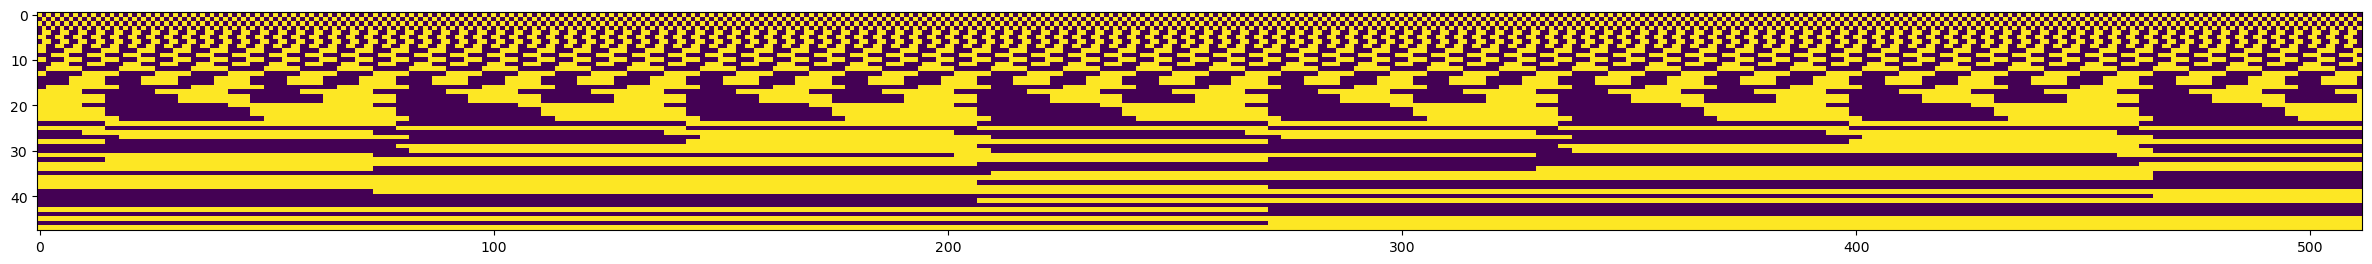

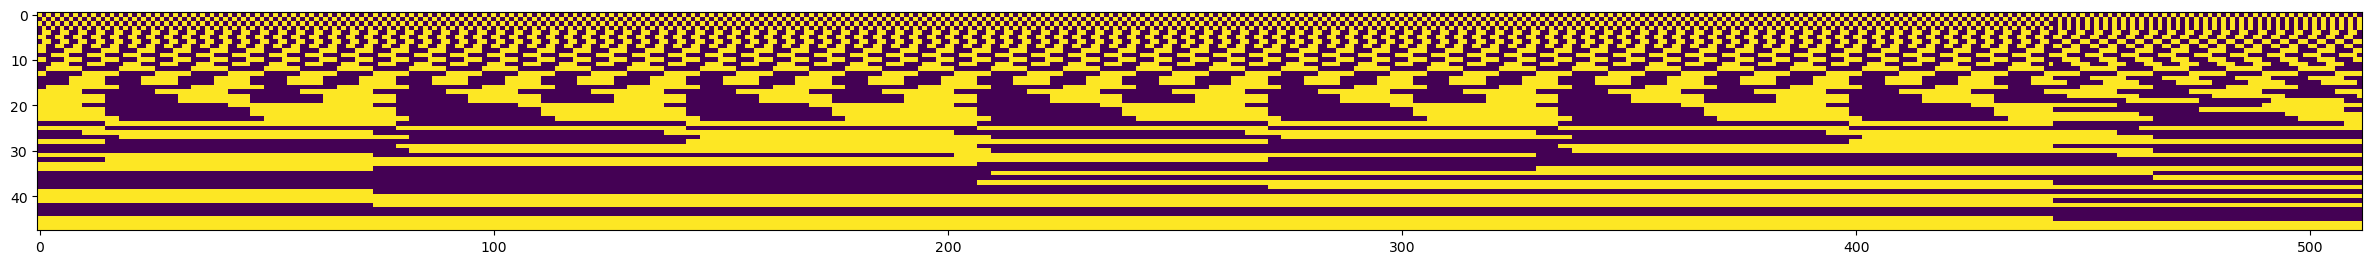

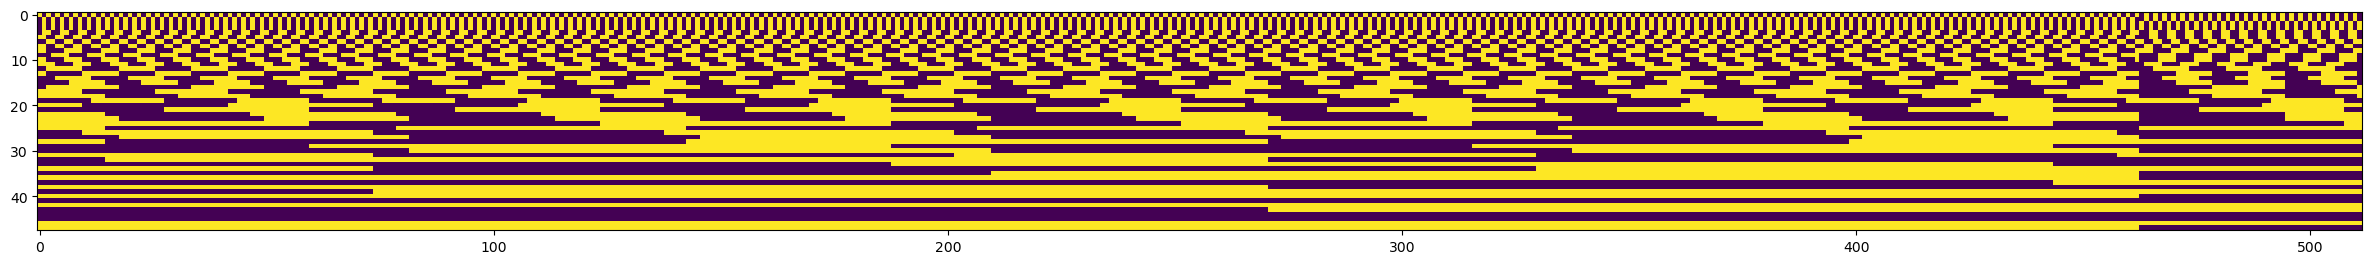

In [262]:
N = 512
for i in range(x.shape[1]//N):
    fig, ax = plt.subplots(1,1,figsize=(30,3))
    plt.imshow(x[order][:,i*N:(i+1)*N])
    plt.show()

In [31]:
dict(sample2)

{'broadcaster': ('cast', ['a']),
 'a': ('flip', ['inv', 'con']),
 'inv': ('conj', ['b']),
 'b': ('flip', ['con']),
 'con': ('conj', ['output'])}

In [15]:
def solve_a(data):
    pass

In [2]:
def solve_b(data):
    pass